%% [markdown]<br>
# Hotel Value Prediction - Exploratory Data Analysis<br>
This notebook performs comprehensive EDA on the hotel value dataset

%%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

Set style for better-looking plots

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

%%<br>
Reading train data file

In [3]:
train_df = pd.read_csv("train.csv")
print("Train data loaded successfully!")
print(f"Shape: {train_df.shape}")

Train data loaded successfully!
Shape: (1200, 81)


%%<br>
Display first few rows

In [4]:
train_df.head()

Id  PropertyClass ZoningCategory  RoadAccessLength  LandArea RoadType  \
0  775             20             RL             110.0     14226     Pave   
1  673             20             RL               NaN     11250     Pave   
2  234             20             RL              75.0     10650     Pave   
3  427             80             RL               NaN     12800     Pave   
4  197             20             RL              79.0      9416     Pave   

  ServiceLaneType PlotShape LandElevation UtilityAccess  ... SwimmingPoolArea  \
0             NaN       Reg           Lvl        AllPub  ...                0   
1             NaN       IR1           Lvl        AllPub  ...                0   
2             NaN       Reg           Lvl        AllPub  ...                0   
3             NaN       Reg           Low        AllPub  ...                0   
4             NaN       Reg           Lvl        AllPub  ...                0   

  PoolQuality BoundaryFence ExtraFacility ExtraFacilityValue MonthSold  \
0         NaN           NaN           NaN                  0         7   
1         NaN           NaN           NaN                  0         6   
2         NaN         MnPrv           NaN                  0         2   
3         NaN           NaN           NaN                  0         8   
4         NaN           NaN           NaN                  0         9   

  YearSold  DealType  DealCondition  HotelValue  
0     2007       New        Partial    395000.0  
1     2006        WD         Normal    165000.0  
2     2010        WD         Normal    128200.0  
3     2009        WD         Normal    275000.0  
4     2007       New        Partial    311872.0  

[5 rows x 81 columns]

%%<br>
Basic information about the dataset

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1200 non-null   int64  
 1   PropertyClass            1200 non-null   int64  
 2   ZoningCategory           1200 non-null   object 
 3   RoadAccessLength         977 non-null    float64
 4   LandArea                 1200 non-null   int64  
 5   RoadType                 1200 non-null   object 
 6   ServiceLaneType          75 non-null     object 
 7   PlotShape                1200 non-null   object 
 8   LandElevation            1200 non-null   object 
 9   UtilityAccess            1200 non-null   object 
 10  PlotConfiguration        1200 non-null   object 
 11  LandSlope                1200 non-null   object 
 12  District                 1200 non-null   object 
 13  NearbyTransport1         1200 non-null   object 
 14  NearbyTransport2        

%%<br>
Check for null values

In [6]:
print("Missing Values Summary:")
print("="*50)
missing_summary = train_df.isnull().sum()
missing_pct = (train_df.isnull().sum() / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_summary,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))

Missing Values Summary:
                         Missing_Count  Percentage
PoolQuality                       1194   99.500000
ExtraFacility                     1154   96.166667
ServiceLaneType                   1125   93.750000
BoundaryFence                      963   80.250000
FacadeType                         702   58.500000
LoungeQuality                      560   46.666667
RoadAccessLength                   223   18.583333
ParkingType                         65    5.416667
ParkingConstructionYear             65    5.416667
ParkingFinish                       65    5.416667
ParkingQuality                      65    5.416667
ParkingCondition                    65    5.416667
BasementExposure                    30    2.500000
BasementFacilityType1               29    2.416667
BasementFacilityType2               29    2.416667
BasementCondition                   29    2.416667
BasementHeight                      29    2.416667
FacadeArea                           7    0.583333
Electri

%%<br>
Check for duplicates

In [7]:
duplicates = train_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    train_df.drop_duplicates(inplace=True)
    print(f"Duplicates removed. New shape: {train_df.shape}")

Number of duplicate rows: 0


%%<br>
Statistical summary of numerical features

In [8]:
print("Statistical Summary of Numerical Features:")
print("="*80)
print(train_df.describe().T)

Statistical Summary of Numerical Features:
                          count           mean           std      min  \
Id                       1200.0     733.330000    425.247866      1.0   
PropertyClass            1200.0      57.008333     42.675433     20.0   
RoadAccessLength          977.0      70.228250     24.886507     21.0   
LandArea                 1200.0   10662.048333  10641.843875   1300.0   
OverallQuality           1200.0       6.123333      1.371626      1.0   
OverallCondition         1200.0       5.582500      1.113954      1.0   
ConstructionYear         1200.0    1971.314167     30.592407   1872.0   
RenovationYear           1200.0    1985.038333     20.704930   1950.0   
FacadeArea               1193.0     103.448449    172.339311      0.0   
BasementFacilitySF1      1200.0     447.328333    460.469328      0.0   
BasementFacilitySF2      1200.0      44.735000    157.529408      0.0   
BasementUnfinishedSF     1200.0     570.500833    447.966814      0.0   
Basement

%%<br>
Missing data visualization

Missing Data Visualization:


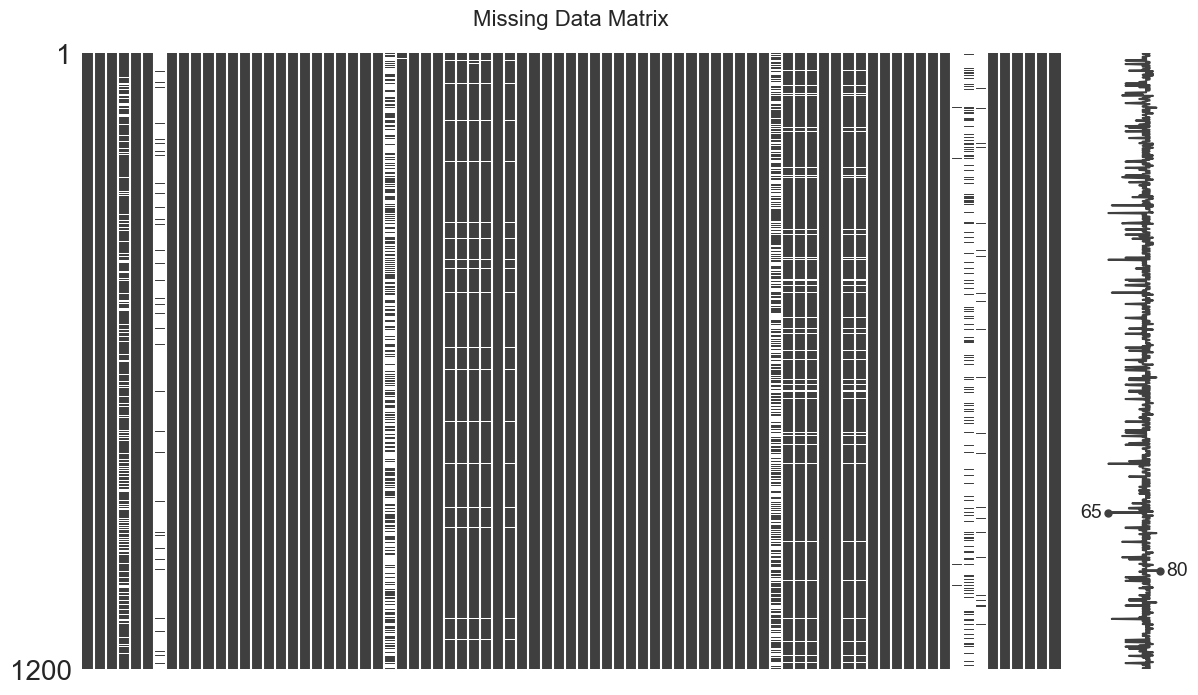

In [9]:
print("Missing Data Visualization:")
msno.matrix(train_df, figsize=(14, 8))
plt.title('Missing Data Matrix', fontsize=16, pad=20)
plt.show()

%%<br>
Identify numerical and categorical columns

In [10]:
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()

Remove ID column from analysis if present

In [11]:
if 'hotel_id' in num_cols:
    num_cols.remove('hotel_id')
if 'hotel_id' in train_df.columns:
    print(f"ID column found: hotel_id")

In [12]:
print(f"\nNumerical columns ({len(num_cols)}): {num_cols}")
print(f"\nCategorical columns ({len(cat_cols)}): {cat_cols}")


Numerical columns (38): ['Id', 'PropertyClass', 'RoadAccessLength', 'LandArea', 'OverallQuality', 'OverallCondition', 'ConstructionYear', 'RenovationYear', 'FacadeArea', 'BasementFacilitySF1', 'BasementFacilitySF2', 'BasementUnfinishedSF', 'BasementTotalSF', 'GroundFloorArea', 'UpperFloorArea', 'LowQualityArea', 'UsableArea', 'BasementFullBaths', 'BasementHalfBaths', 'FullBaths', 'HalfBaths', 'GuestRooms', 'Kitchens', 'TotalRooms', 'Lounges', 'ParkingConstructionYear', 'ParkingCapacity', 'ParkingArea', 'TerraceArea', 'OpenVerandaArea', 'EnclosedVerandaArea', 'SeasonalPorchArea', 'ScreenPorchArea', 'SwimmingPoolArea', 'ExtraFacilityValue', 'MonthSold', 'YearSold', 'HotelValue']

Categorical columns (43): ['ZoningCategory', 'RoadType', 'ServiceLaneType', 'PlotShape', 'LandElevation', 'UtilityAccess', 'PlotConfiguration', 'LandSlope', 'District', 'NearbyTransport1', 'NearbyTransport2', 'PropertyType', 'HotelStyle', 'RoofDesign', 'RoofMaterial', 'ExteriorPrimary', 'ExteriorSecondary', 'Fa

%% [markdown]<br>
## Distribution Analysis of Numerical Features

%%<br>
Distribution plots for numerical columns

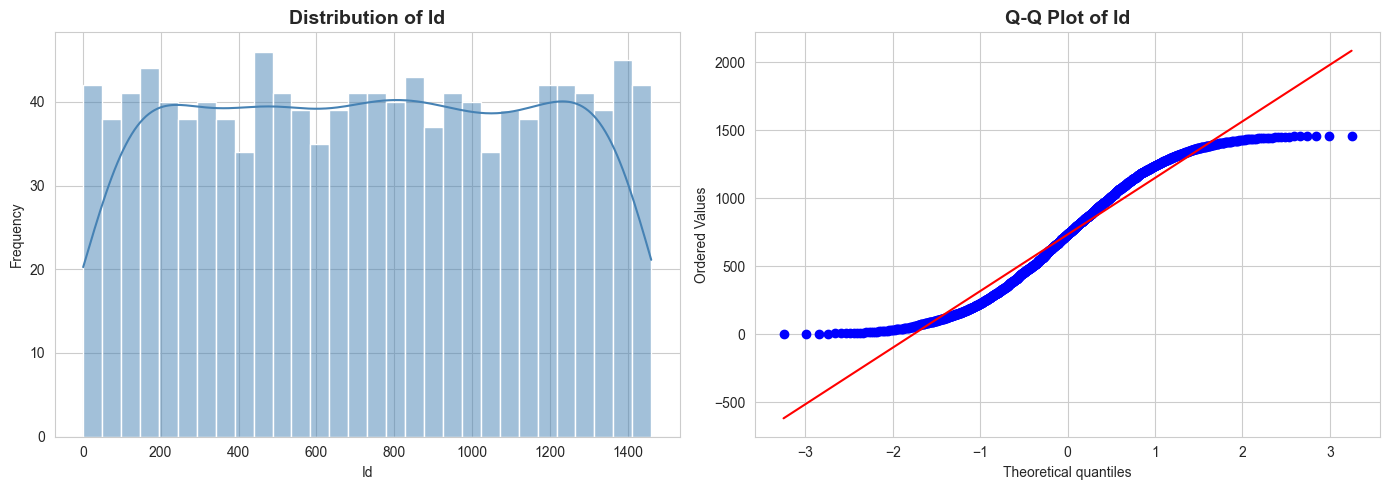

Id - Skewness: -0.003, Kurtosis: -1.213
------------------------------------------------------------


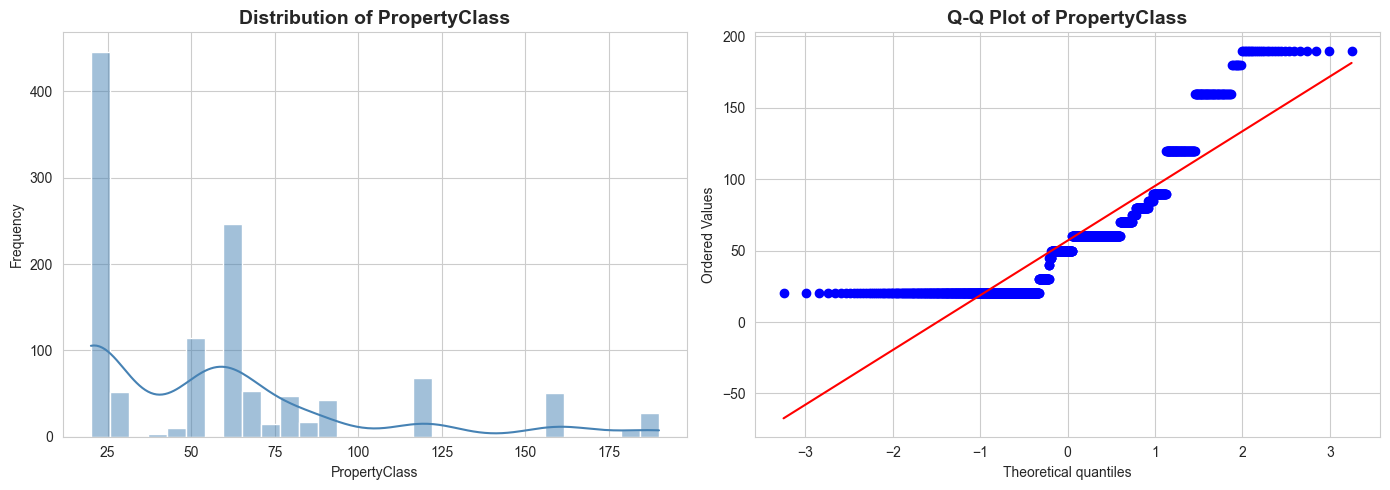

PropertyClass - Skewness: 1.423, Kurtosis: 1.627
------------------------------------------------------------


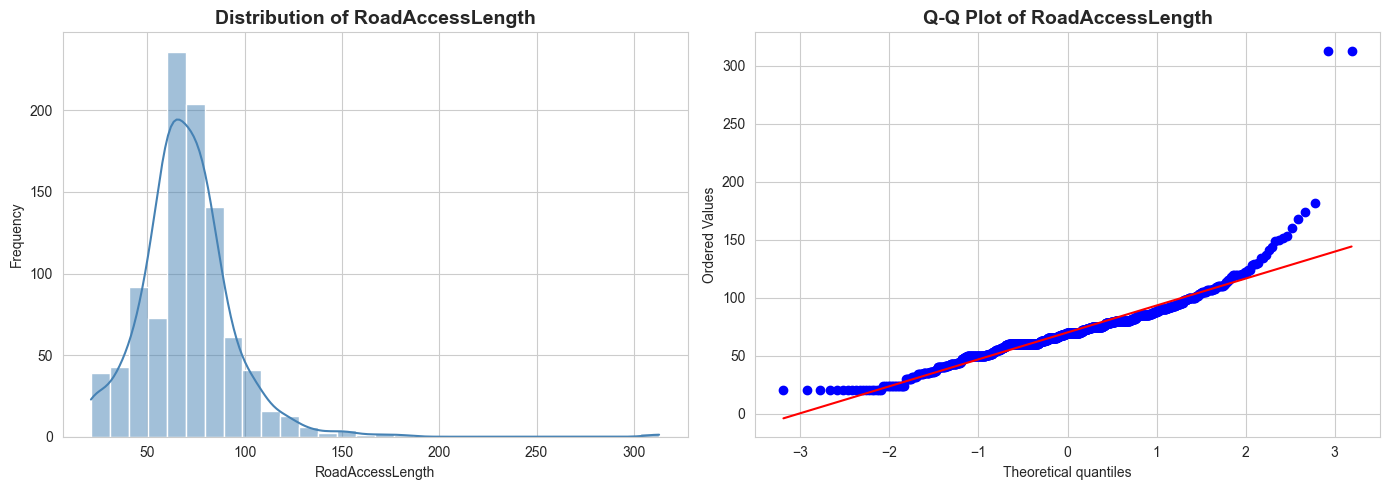

RoadAccessLength - Skewness: 2.354, Kurtosis: 19.008
------------------------------------------------------------


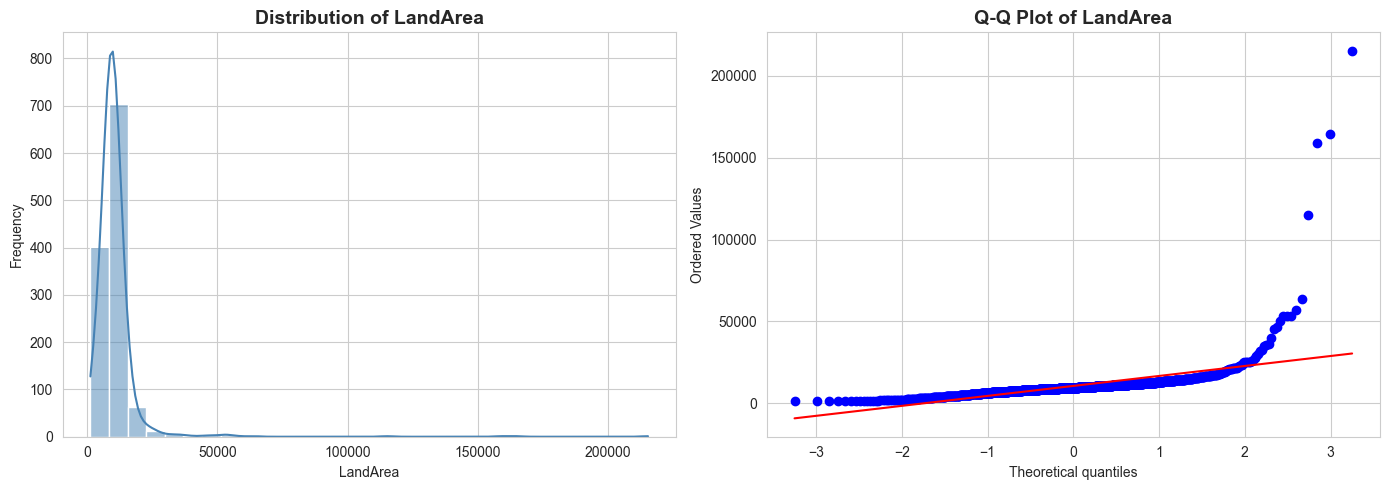

LandArea - Skewness: 12.036, Kurtosis: 189.772
------------------------------------------------------------


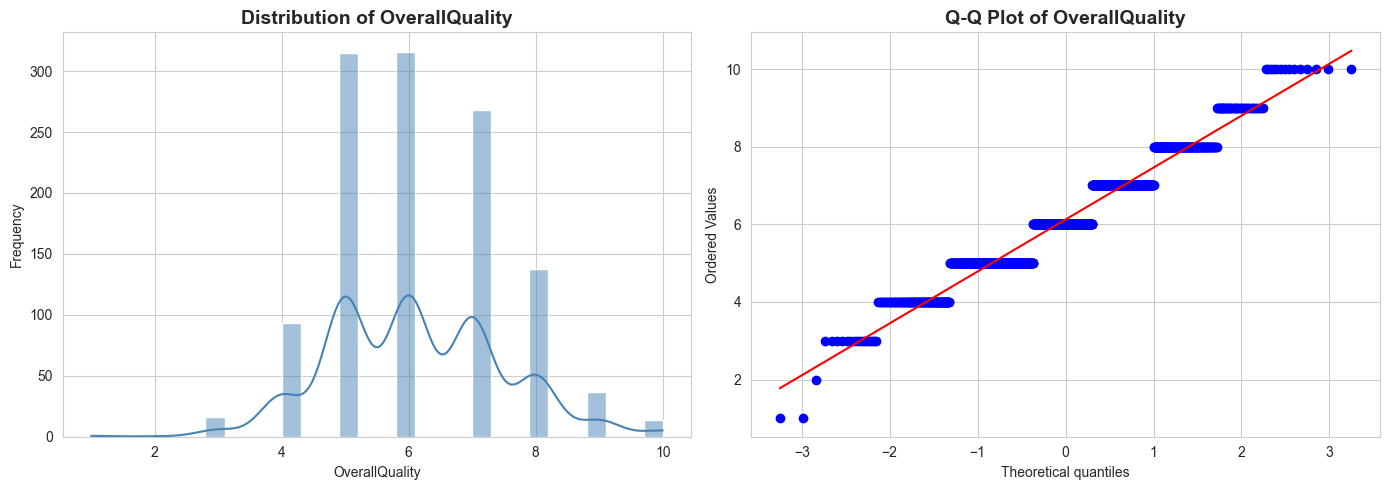

OverallQuality - Skewness: 0.202, Kurtosis: 0.106
------------------------------------------------------------


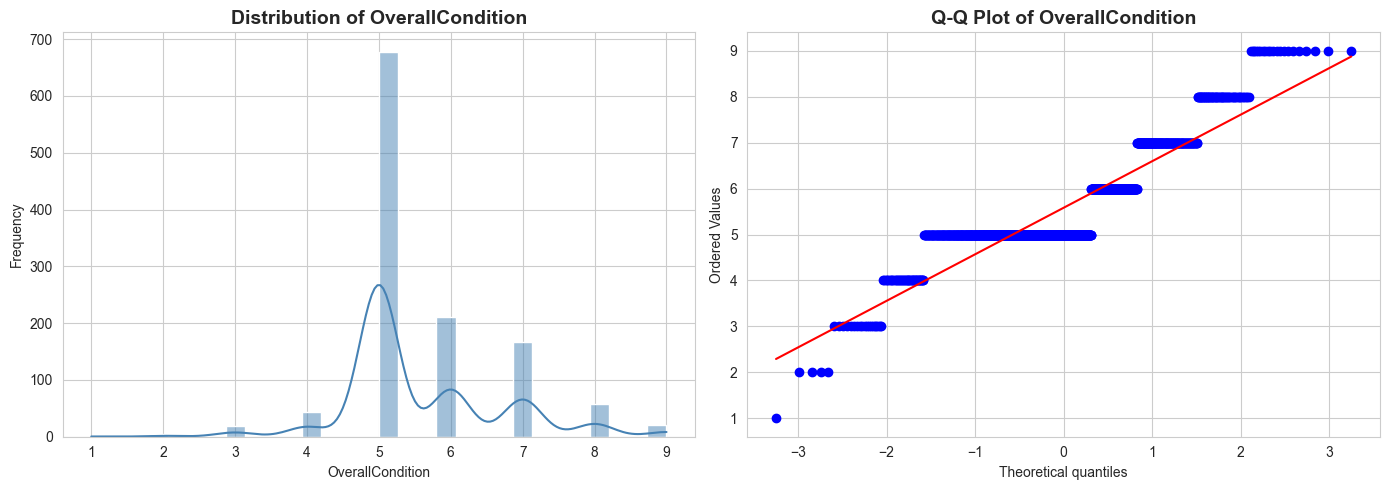

OverallCondition - Skewness: 0.735, Kurtosis: 1.231
------------------------------------------------------------


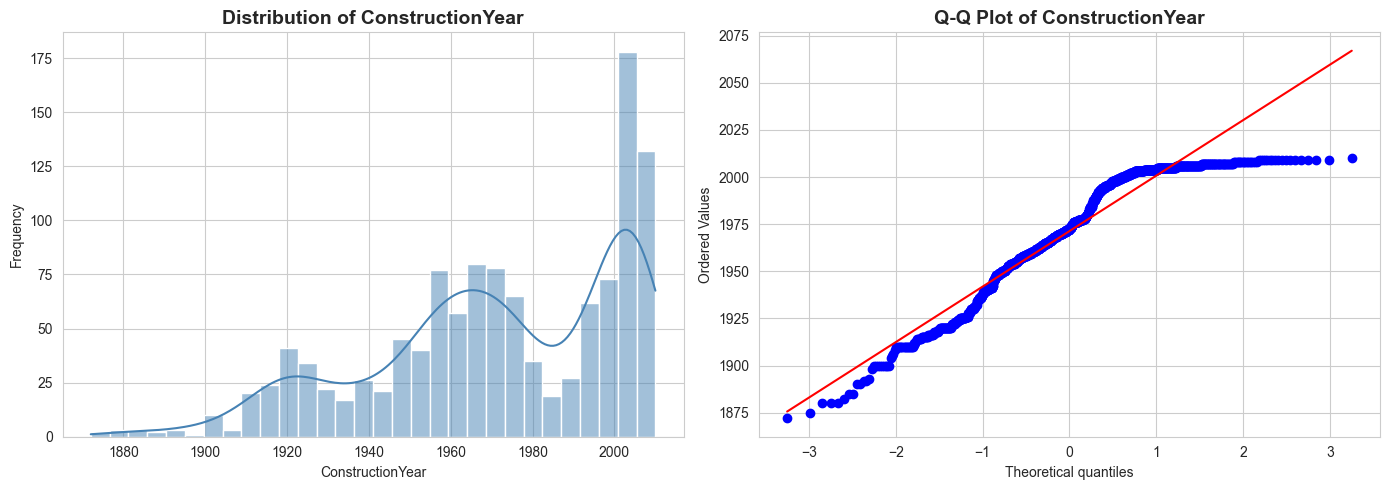

ConstructionYear - Skewness: -0.633, Kurtosis: -0.421
------------------------------------------------------------


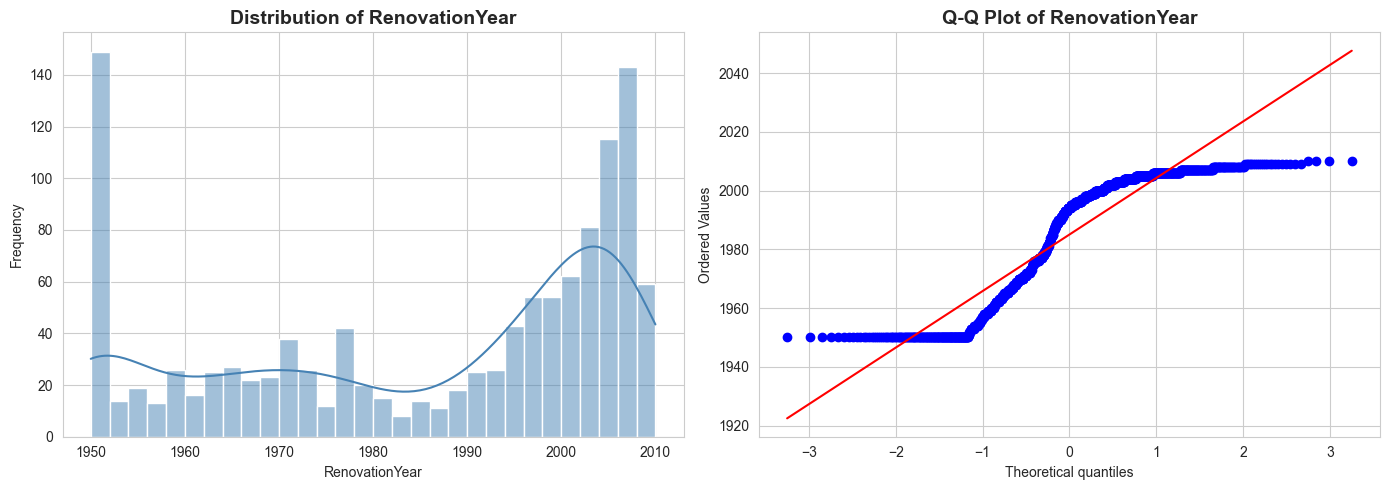

RenovationYear - Skewness: -0.517, Kurtosis: -1.270
------------------------------------------------------------


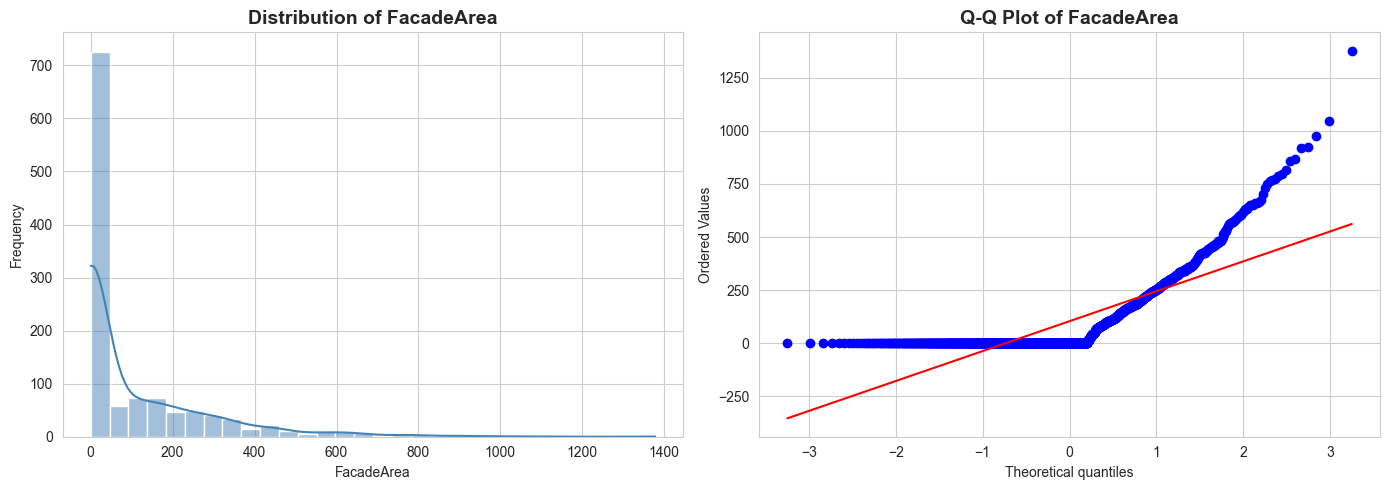

FacadeArea - Skewness: 2.277, Kurtosis: 6.631
------------------------------------------------------------


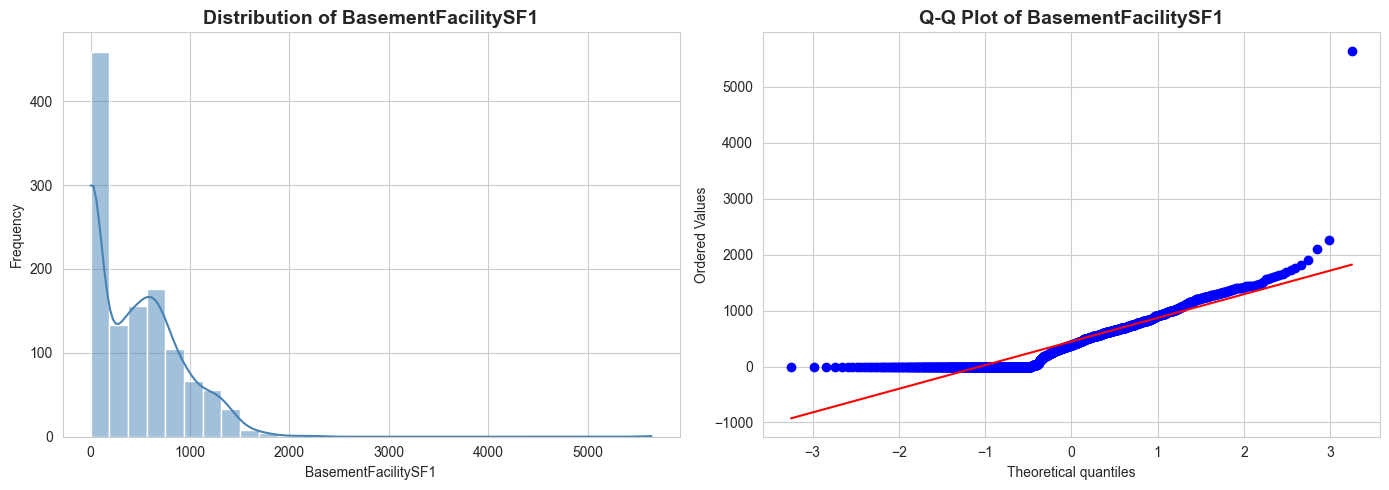

BasementFacilitySF1 - Skewness: 1.819, Kurtosis: 12.907
------------------------------------------------------------


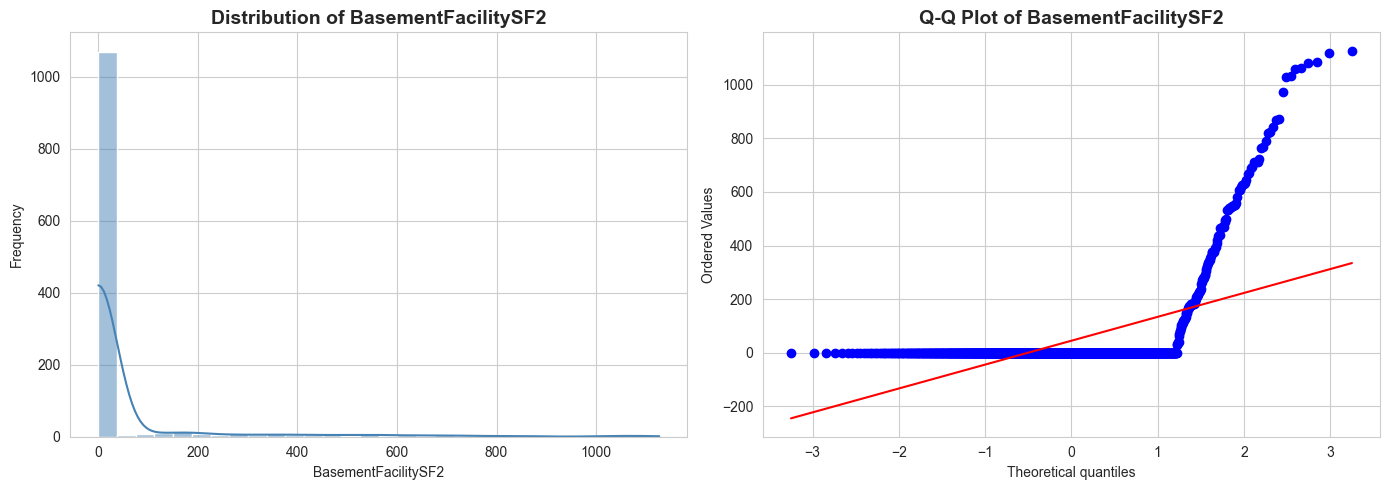

BasementFacilitySF2 - Skewness: 4.231, Kurtosis: 19.077
------------------------------------------------------------


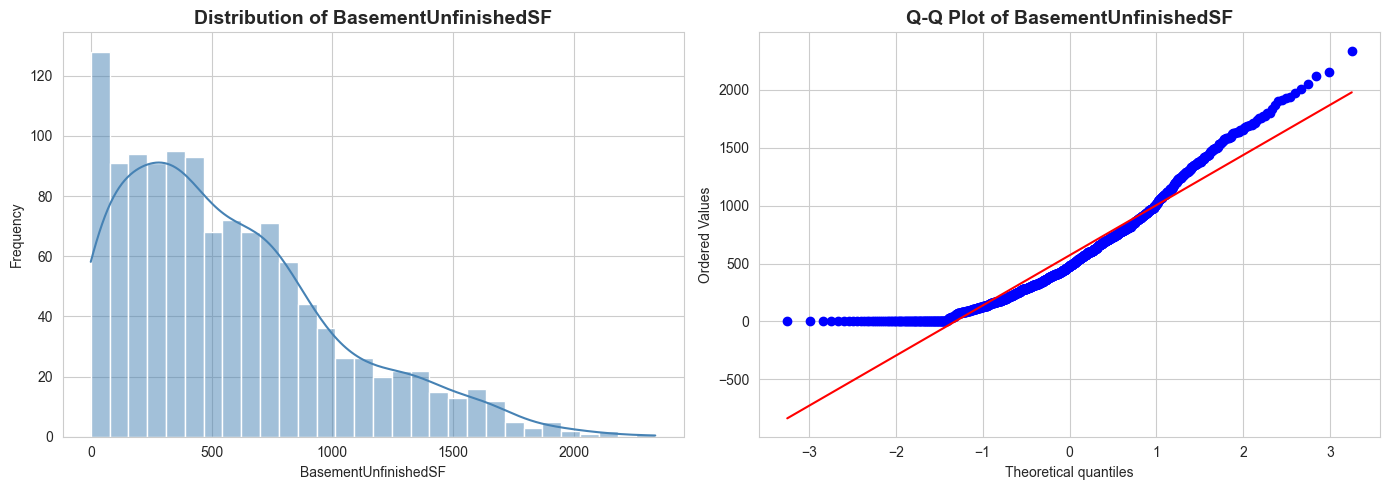

BasementUnfinishedSF - Skewness: 0.918, Kurtosis: 0.426
------------------------------------------------------------


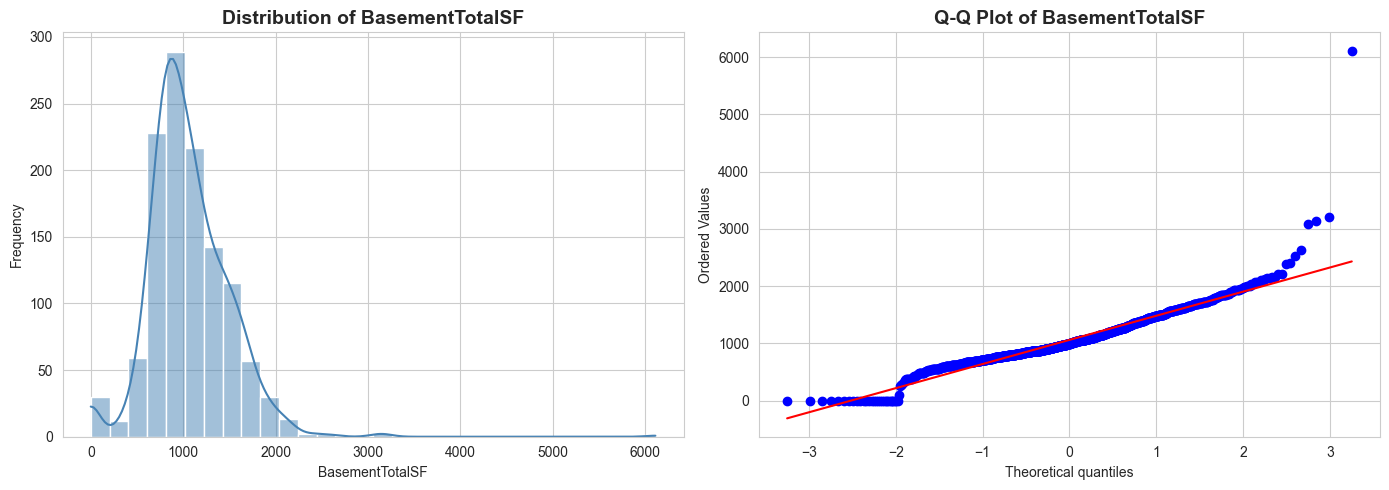

BasementTotalSF - Skewness: 1.678, Kurtosis: 15.161
------------------------------------------------------------


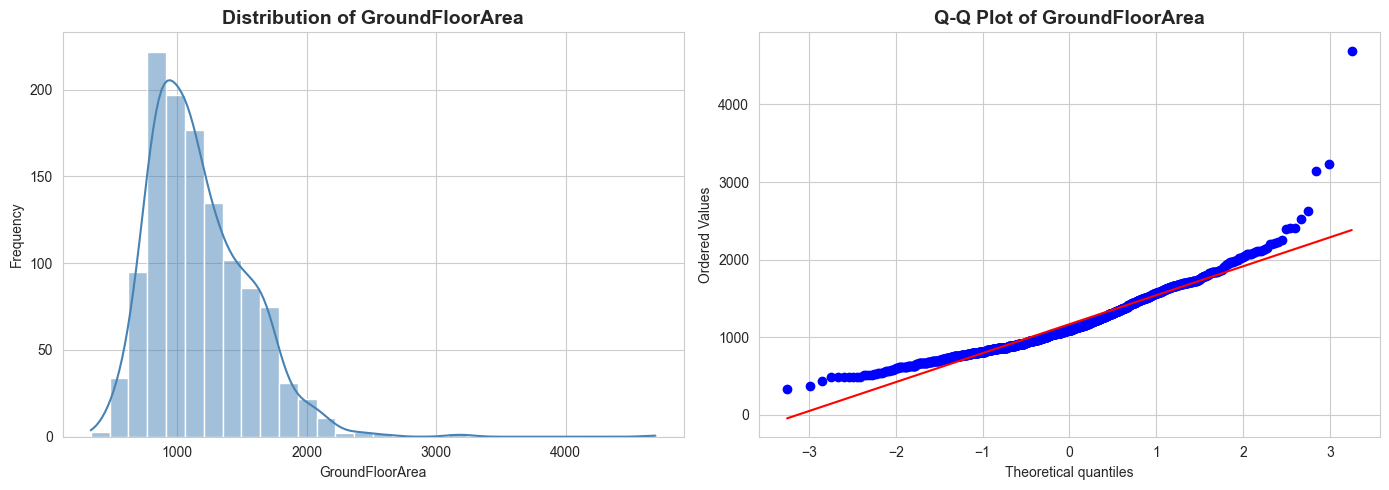

GroundFloorArea - Skewness: 1.398, Kurtosis: 6.468
------------------------------------------------------------


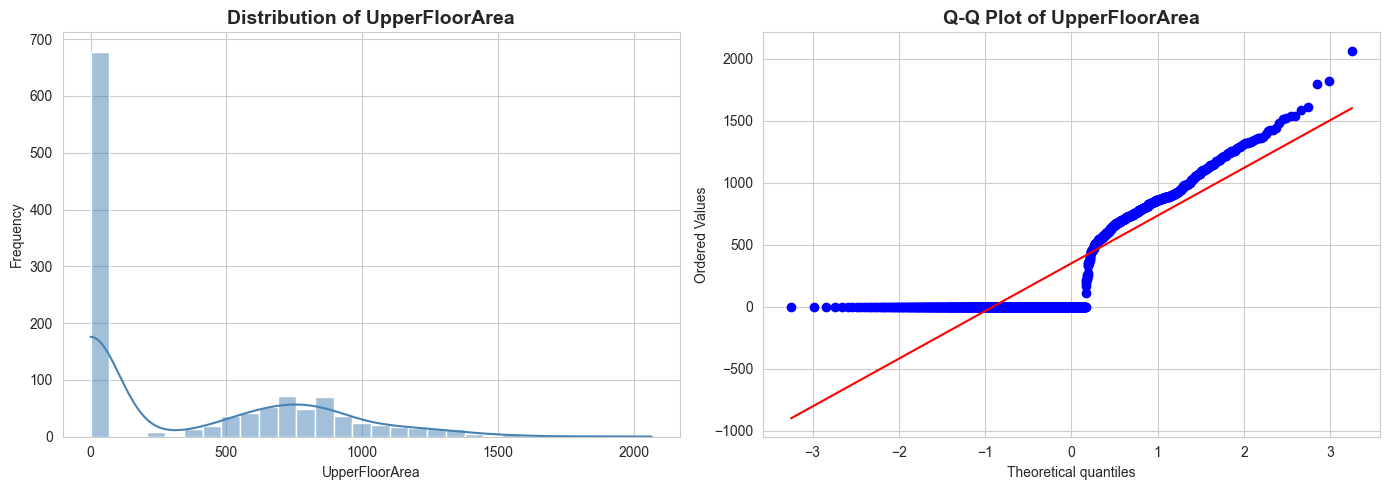

UpperFloorArea - Skewness: 0.805, Kurtosis: -0.566
------------------------------------------------------------


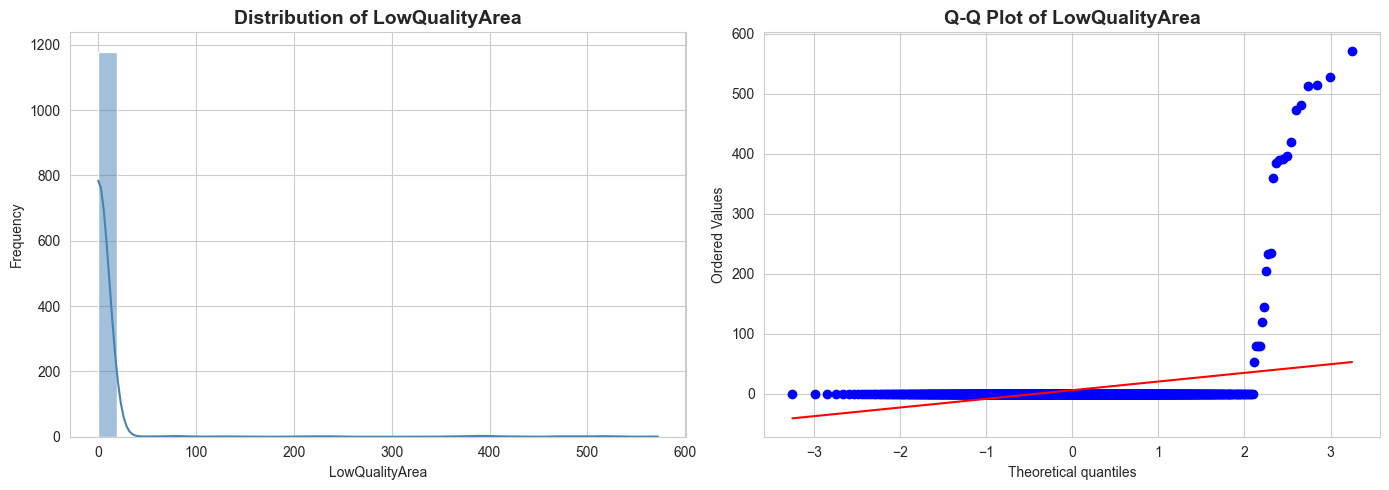

LowQualityArea - Skewness: 9.329, Kurtosis: 89.634
------------------------------------------------------------


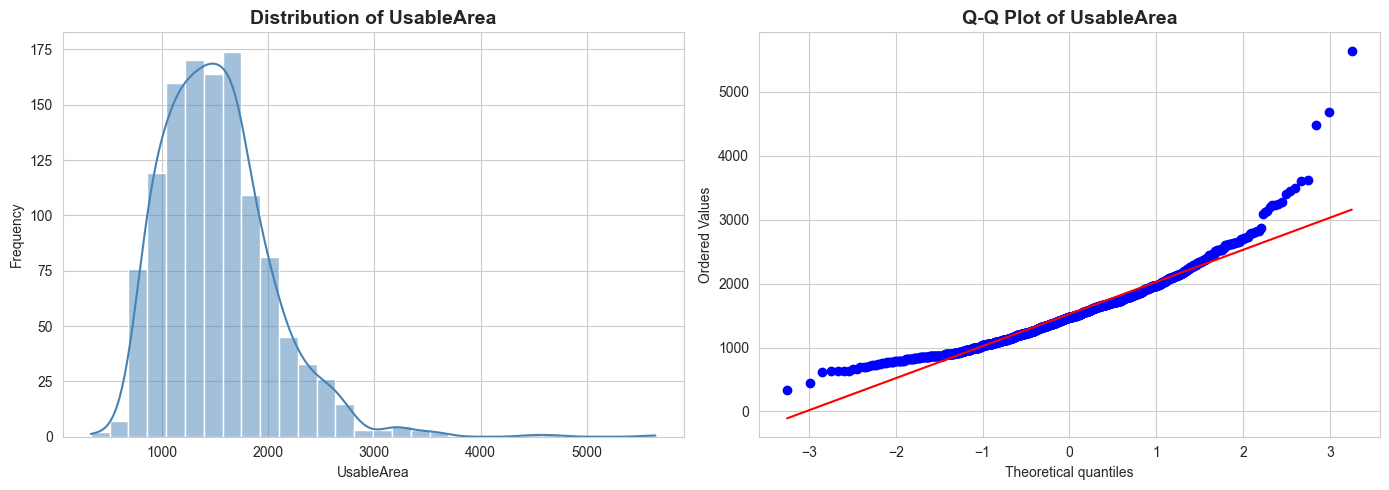

UsableArea - Skewness: 1.415, Kurtosis: 5.466
------------------------------------------------------------


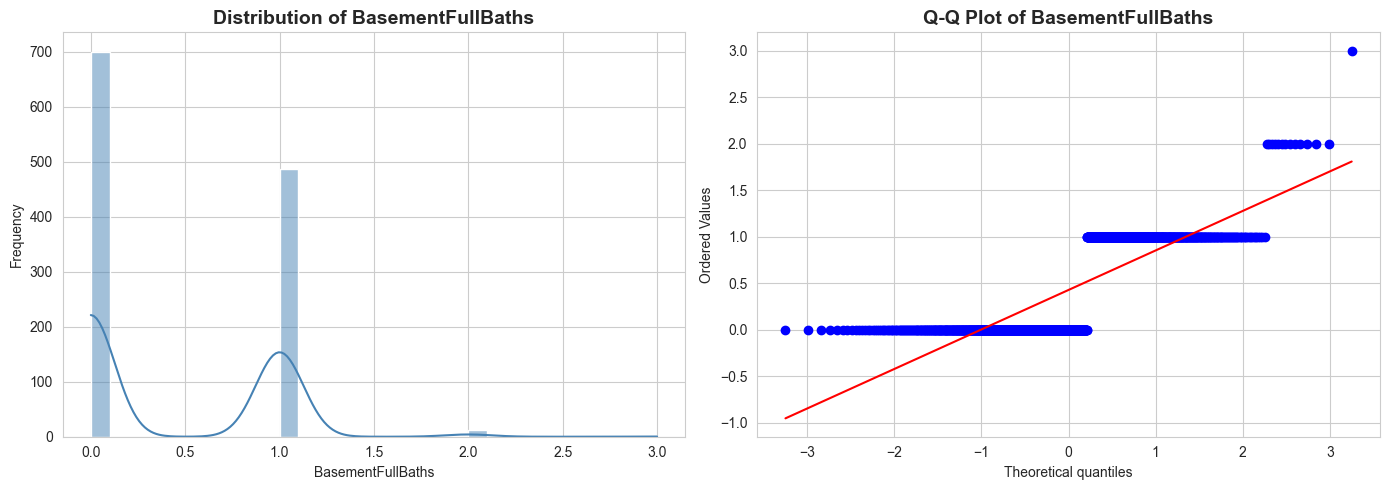

BasementFullBaths - Skewness: 0.604, Kurtosis: -0.760
------------------------------------------------------------


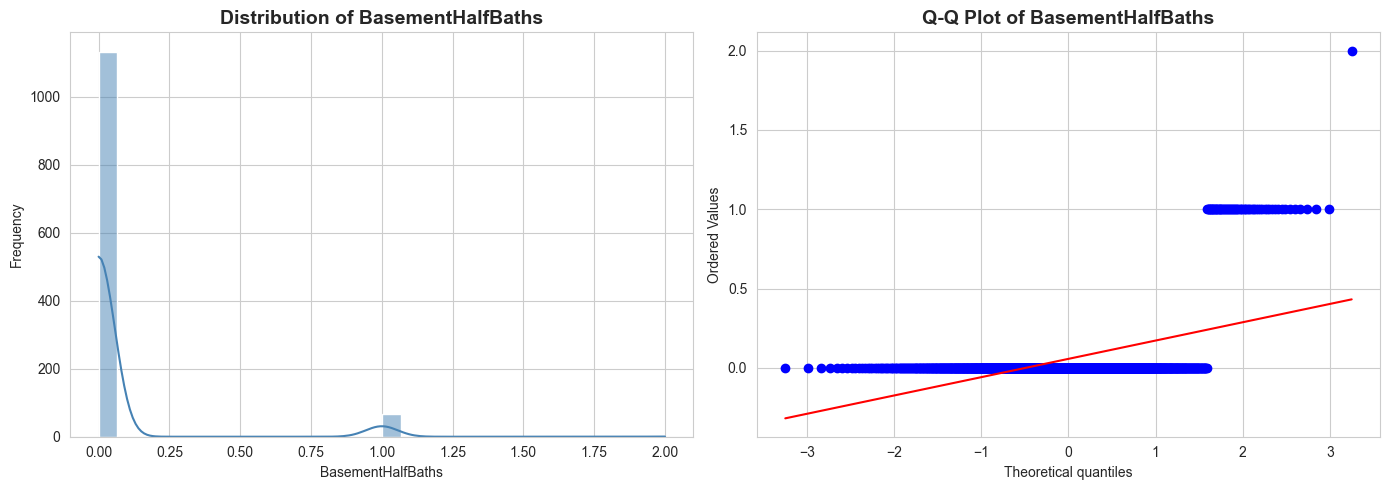

BasementHalfBaths - Skewness: 4.032, Kurtosis: 15.318
------------------------------------------------------------


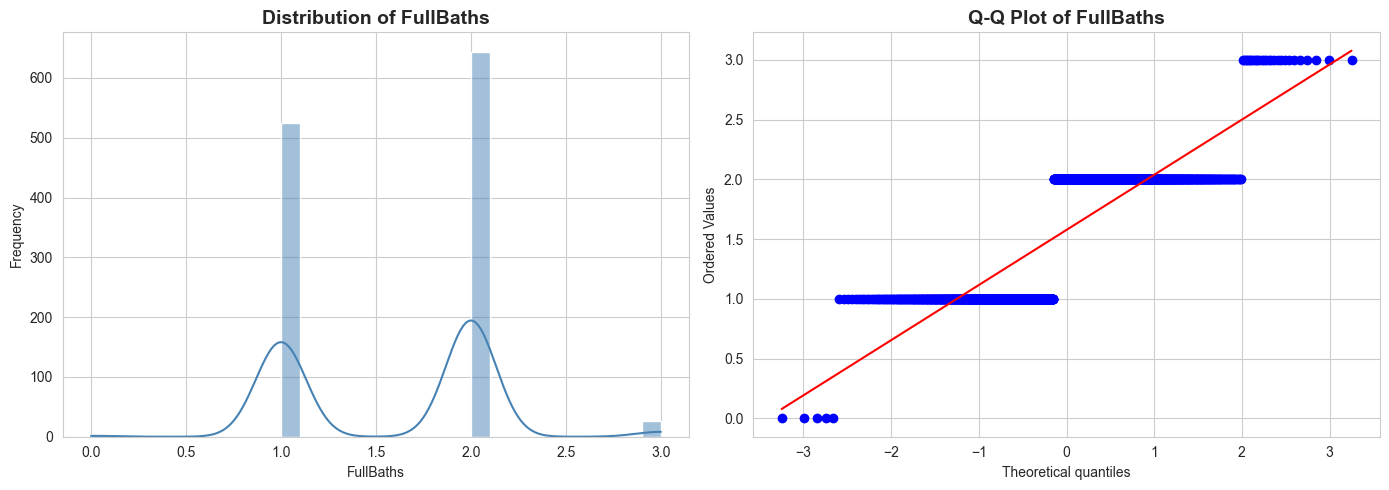

FullBaths - Skewness: 0.030, Kurtosis: -0.922
------------------------------------------------------------


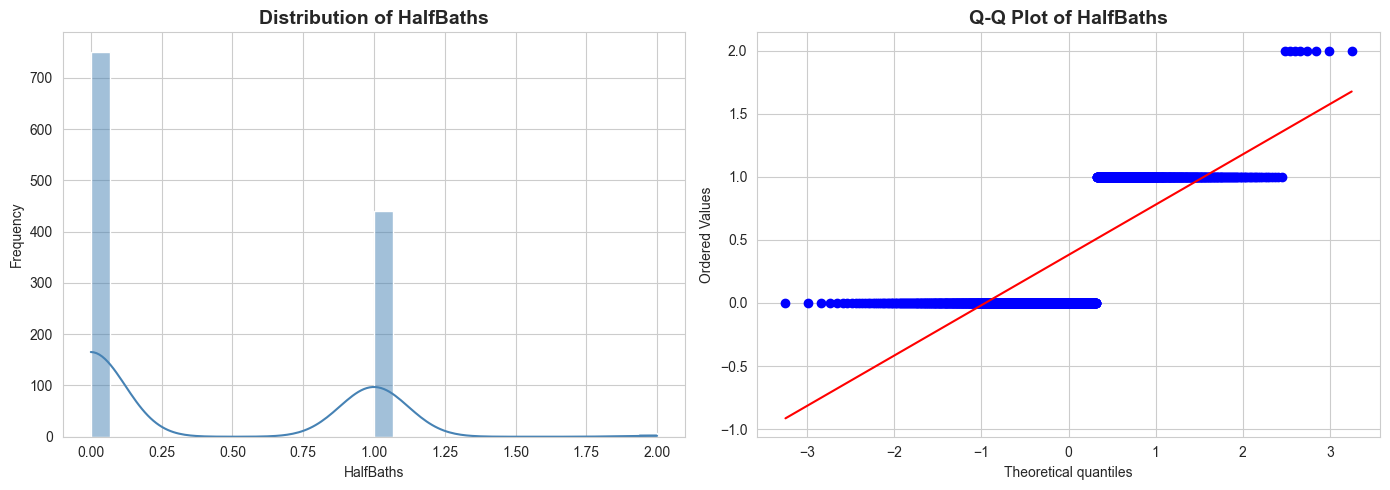

HalfBaths - Skewness: 0.652, Kurtosis: -1.179
------------------------------------------------------------


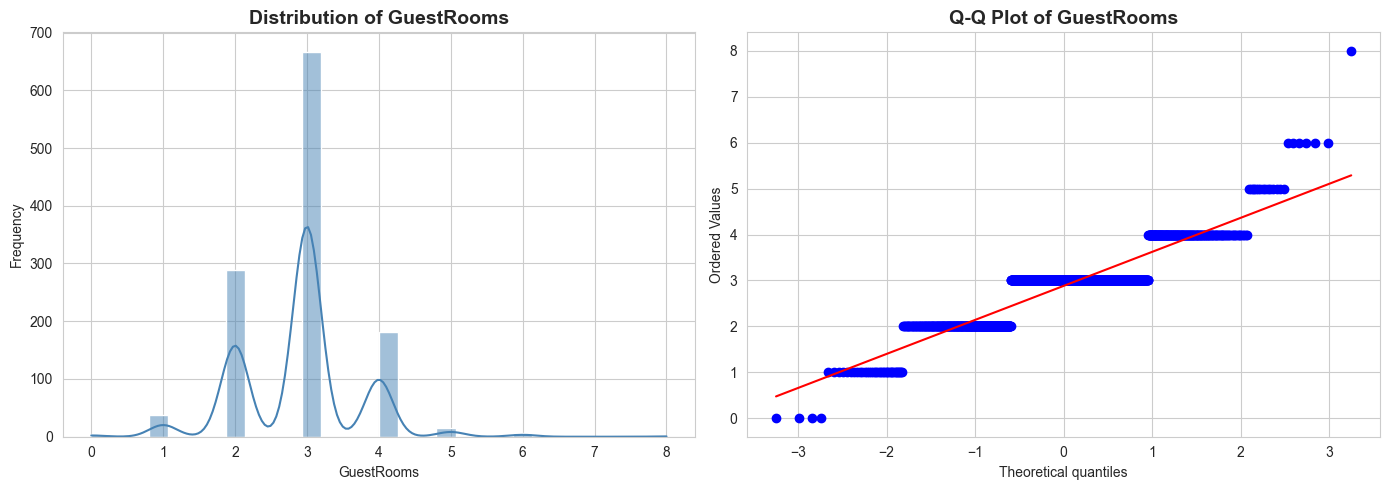

GuestRooms - Skewness: 0.274, Kurtosis: 2.495
------------------------------------------------------------


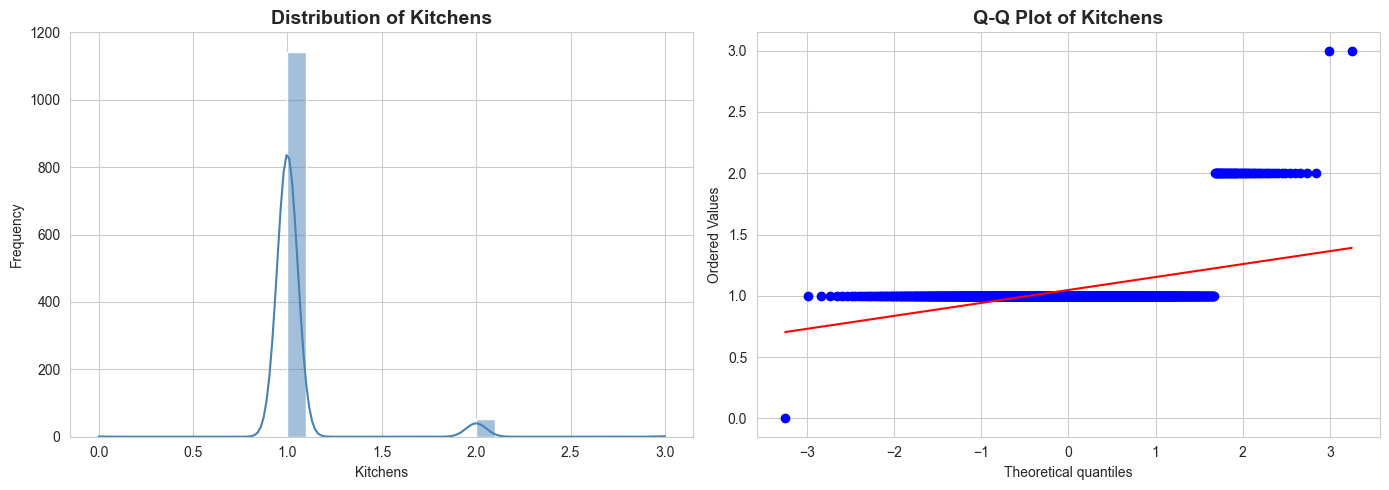

Kitchens - Skewness: 4.466, Kurtosis: 21.763
------------------------------------------------------------


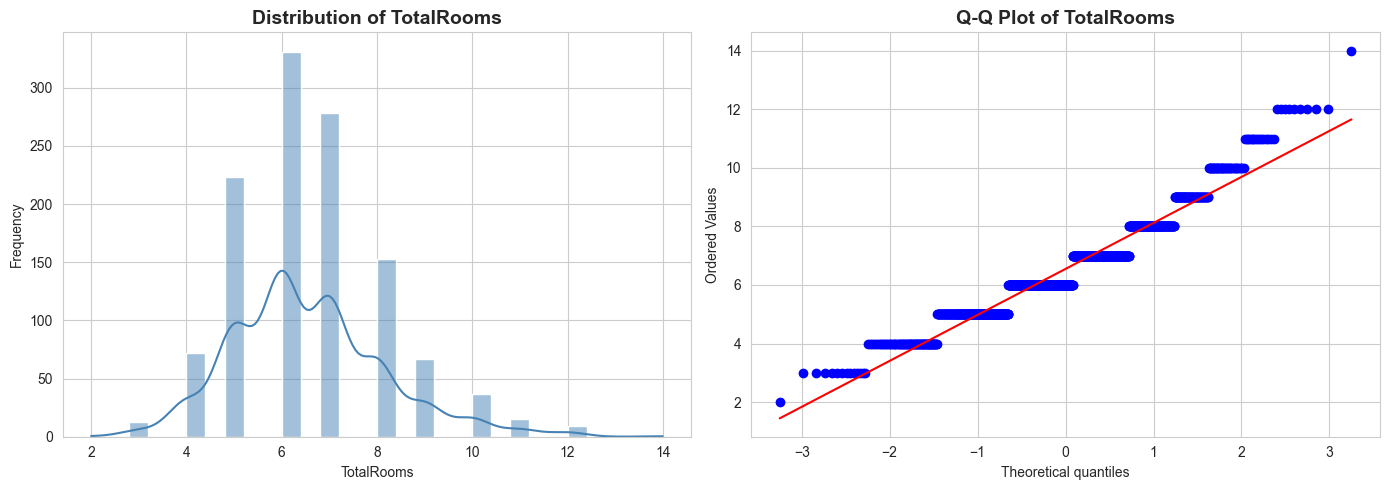

TotalRooms - Skewness: 0.680, Kurtosis: 0.943
------------------------------------------------------------


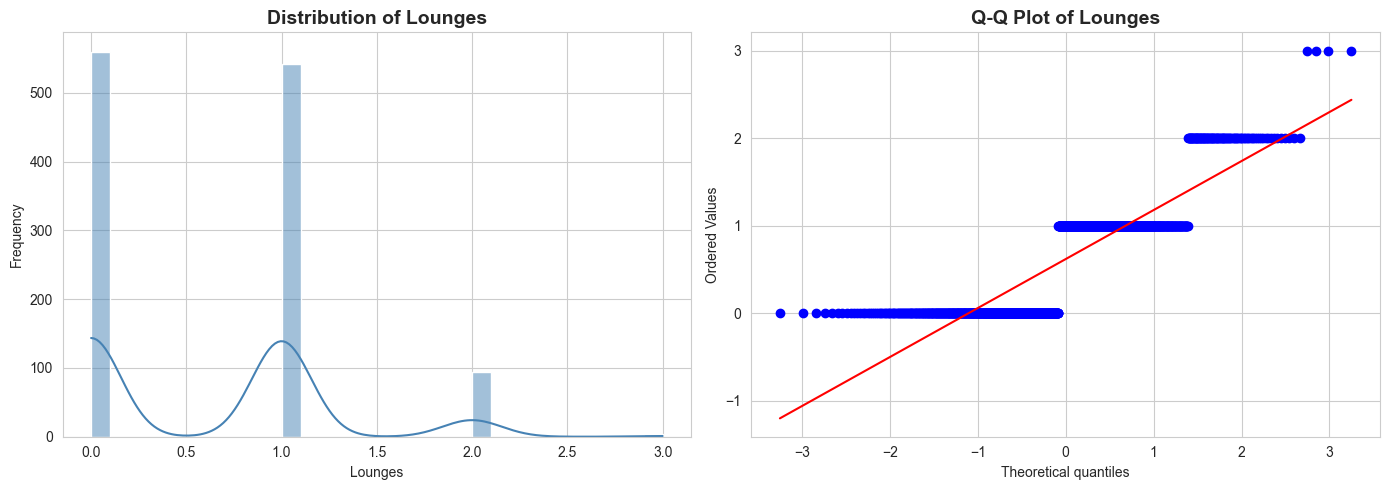

Lounges - Skewness: 0.629, Kurtosis: -0.233
------------------------------------------------------------


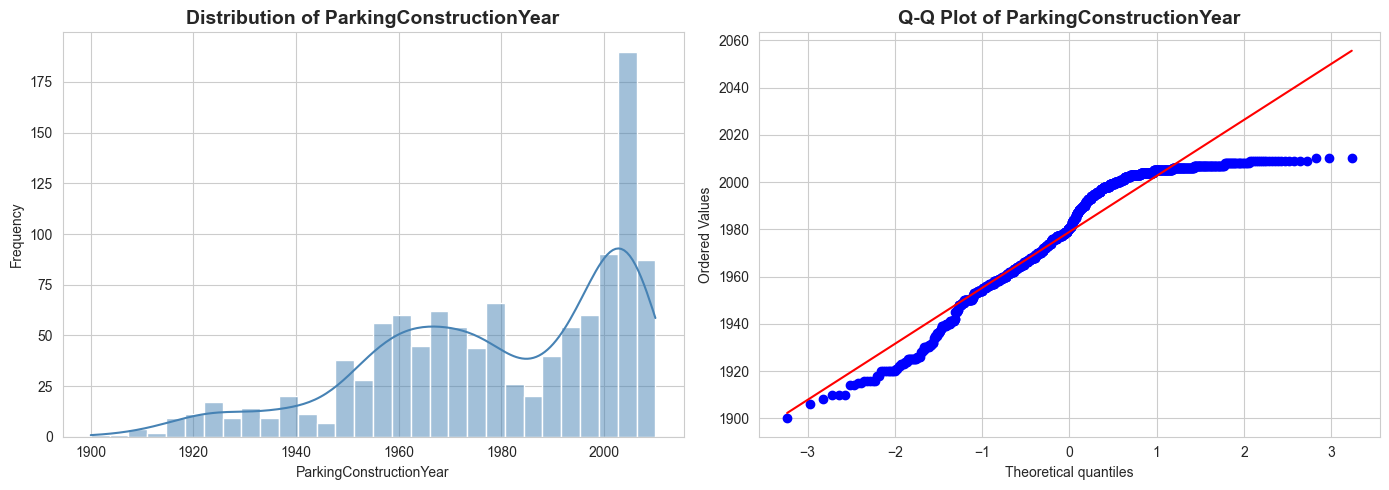

ParkingConstructionYear - Skewness: -0.681, Kurtosis: -0.351
------------------------------------------------------------


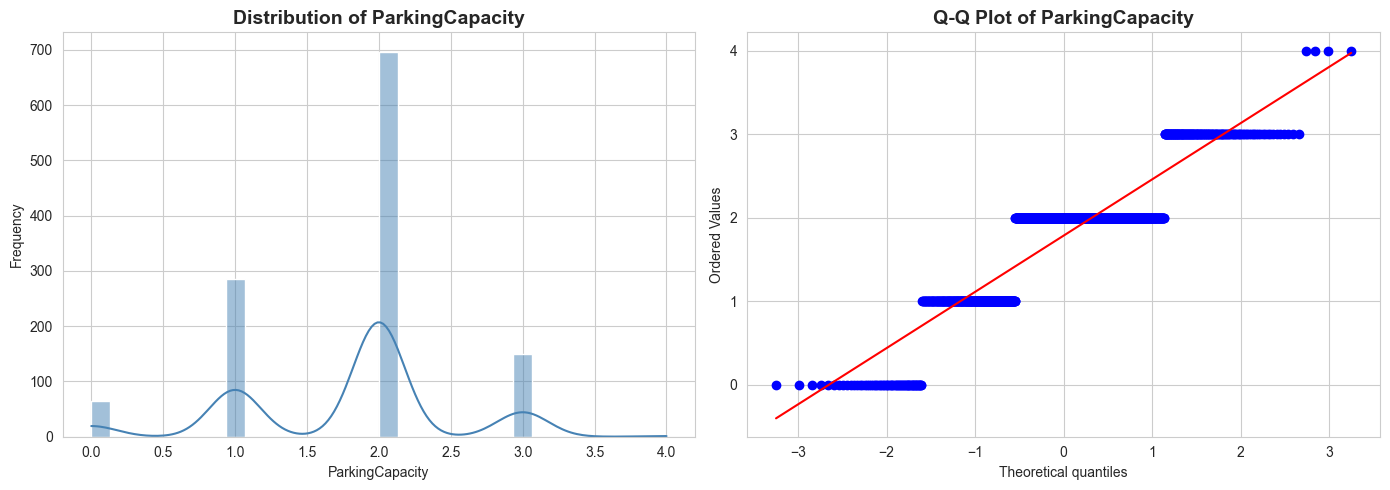

ParkingCapacity - Skewness: -0.393, Kurtosis: 0.341
------------------------------------------------------------


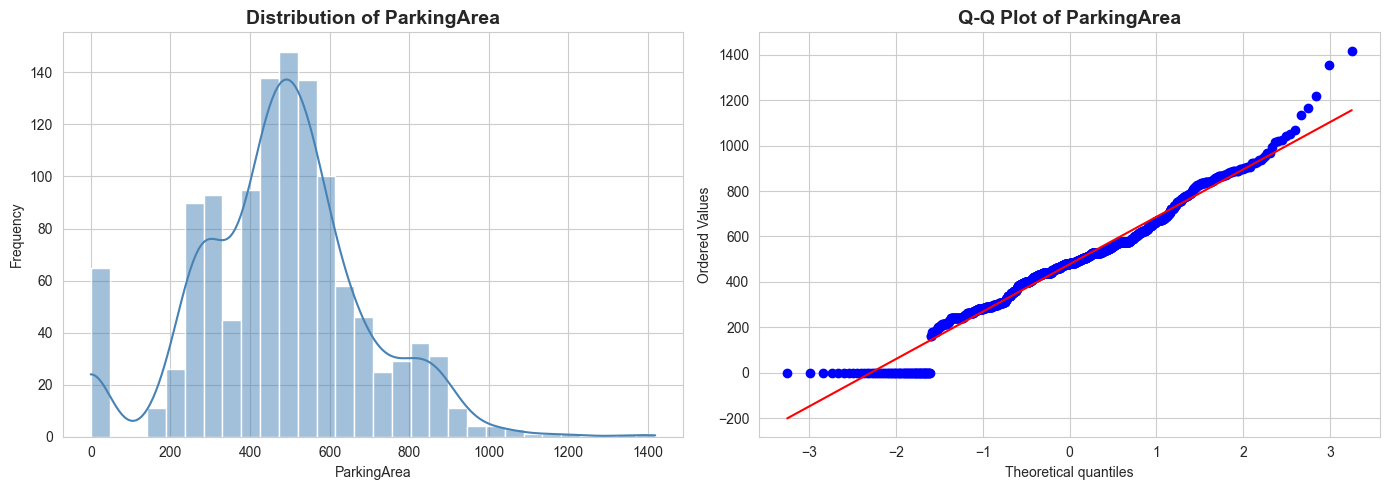

ParkingArea - Skewness: 0.105, Kurtosis: 0.853
------------------------------------------------------------


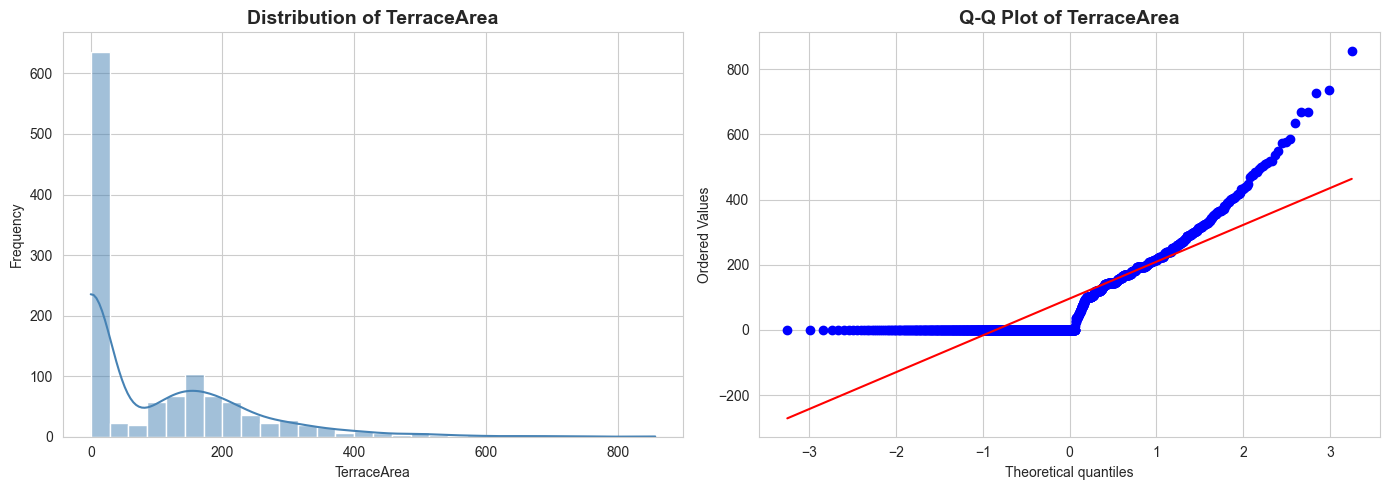

TerraceArea - Skewness: 1.574, Kurtosis: 3.075
------------------------------------------------------------


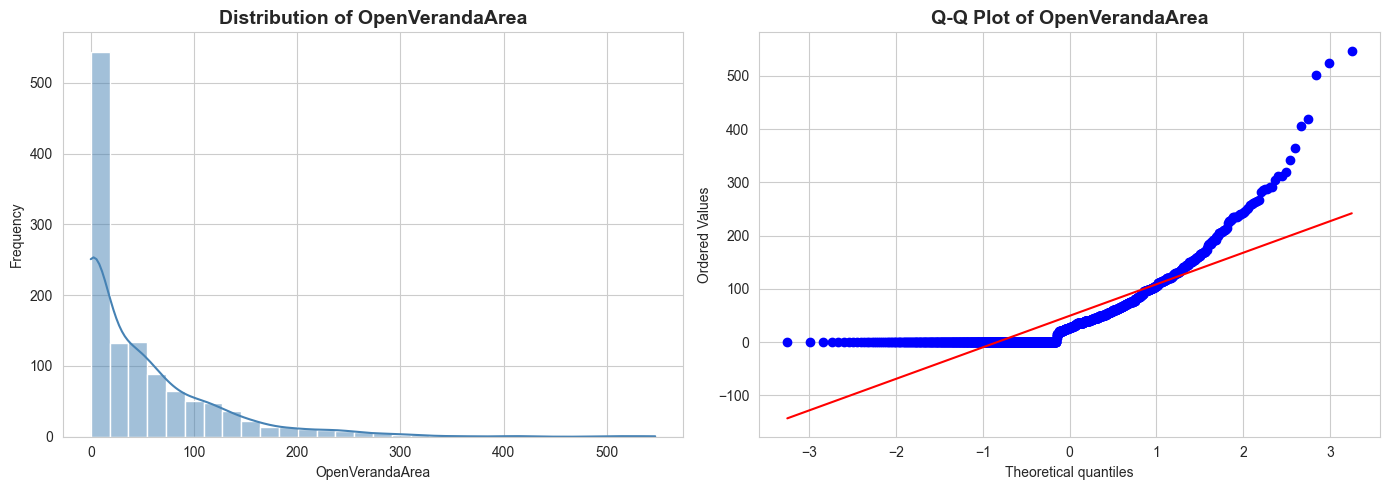

OpenVerandaArea - Skewness: 2.333, Kurtosis: 8.148
------------------------------------------------------------


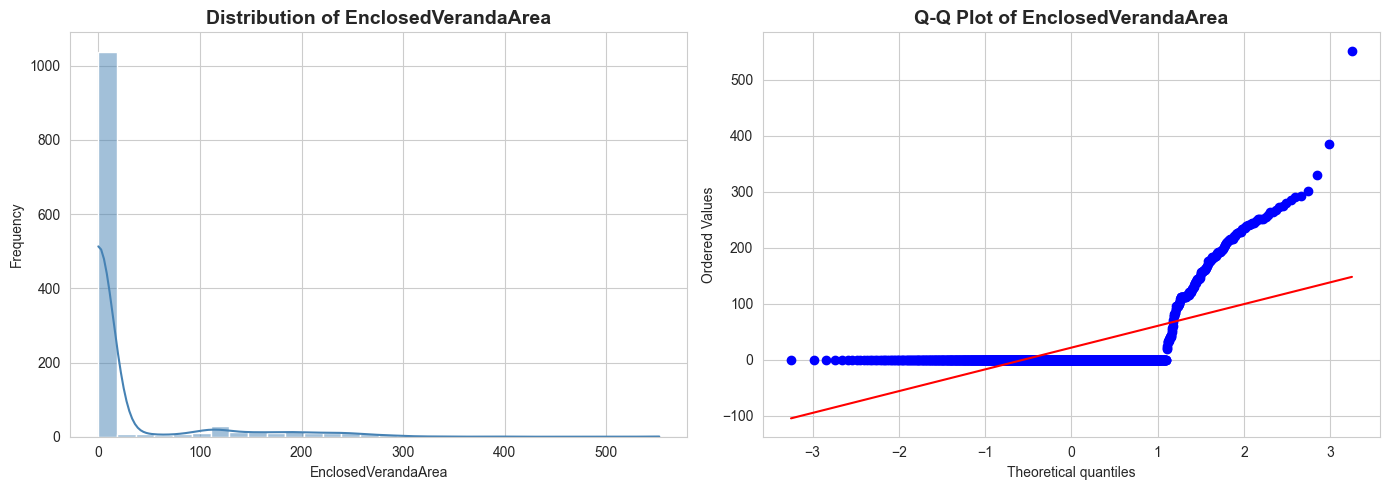

EnclosedVerandaArea - Skewness: 3.203, Kurtosis: 11.354
------------------------------------------------------------


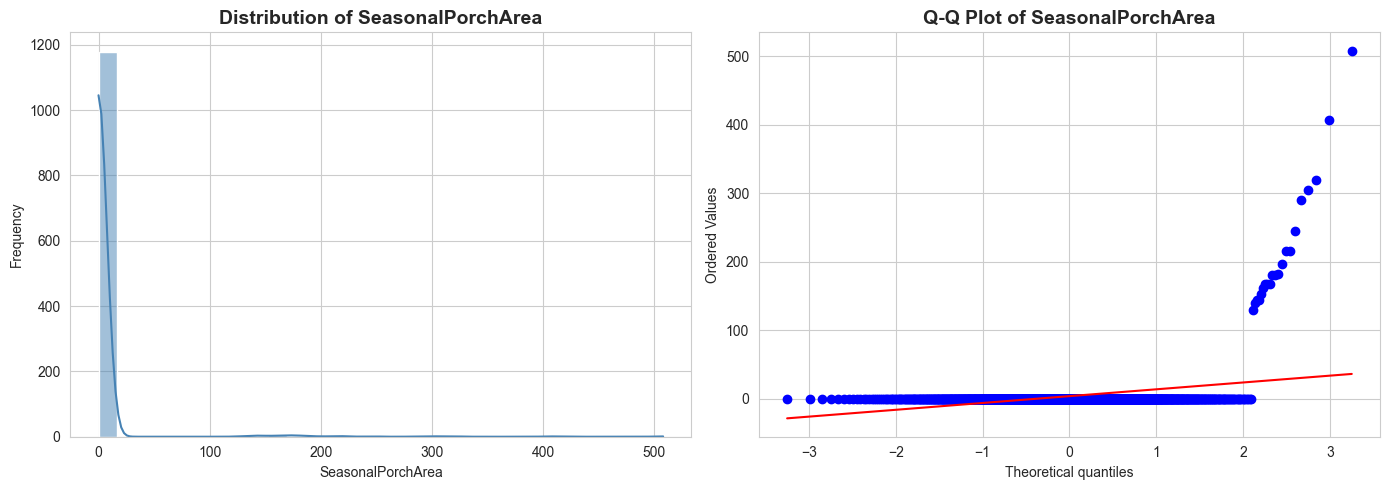

SeasonalPorchArea - Skewness: 9.739, Kurtosis: 110.112
------------------------------------------------------------


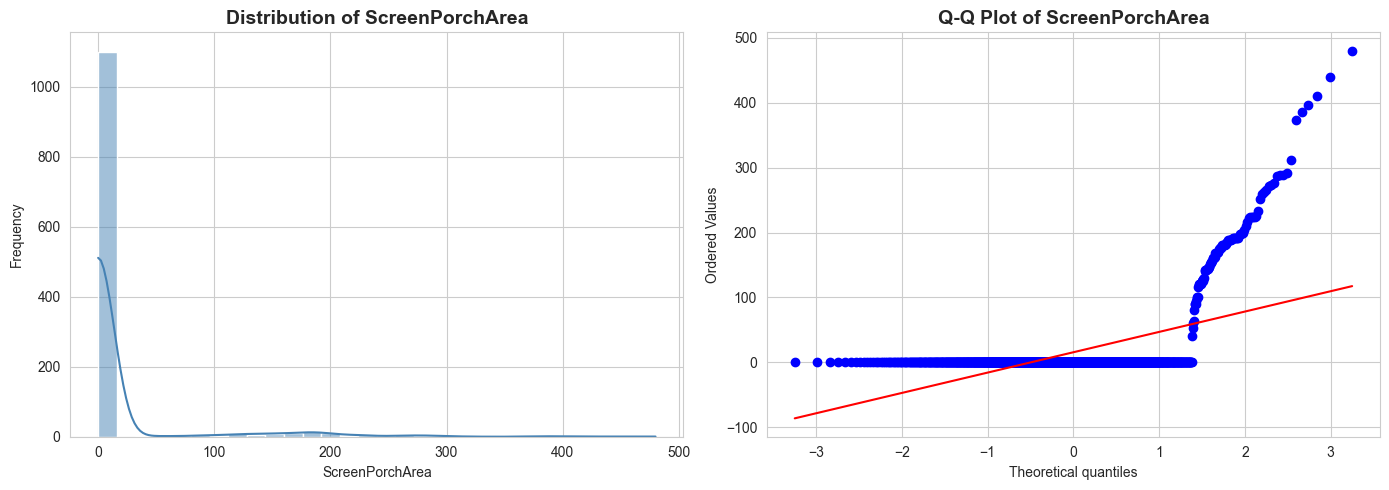

ScreenPorchArea - Skewness: 4.116, Kurtosis: 18.644
------------------------------------------------------------


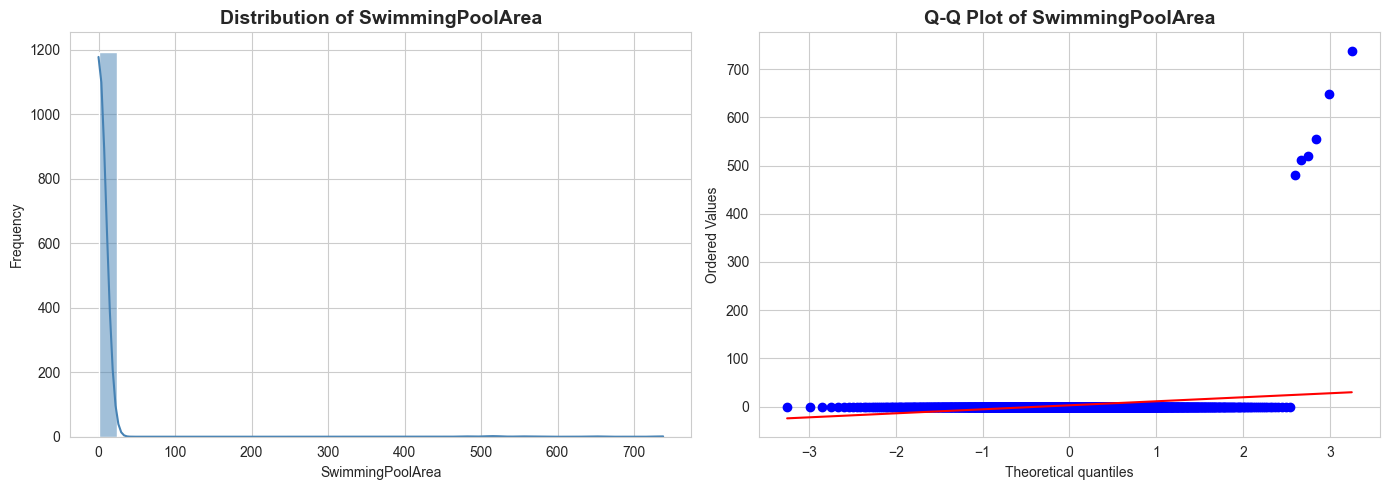

SwimmingPoolArea - Skewness: 14.594, Kurtosis: 216.942
------------------------------------------------------------


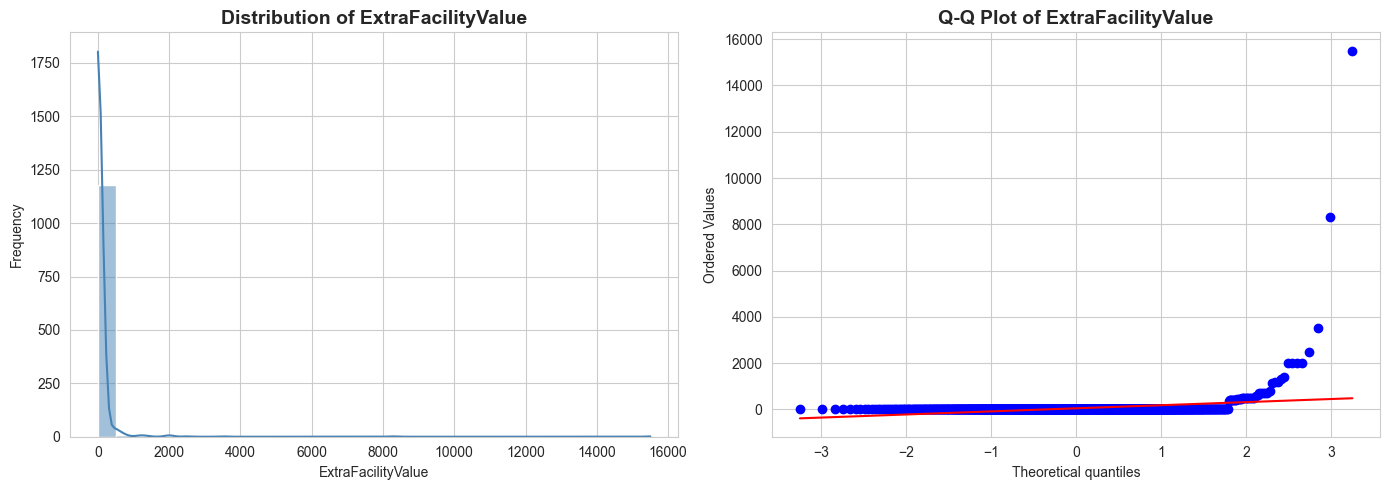

ExtraFacilityValue - Skewness: 22.353, Kurtosis: 581.845
------------------------------------------------------------


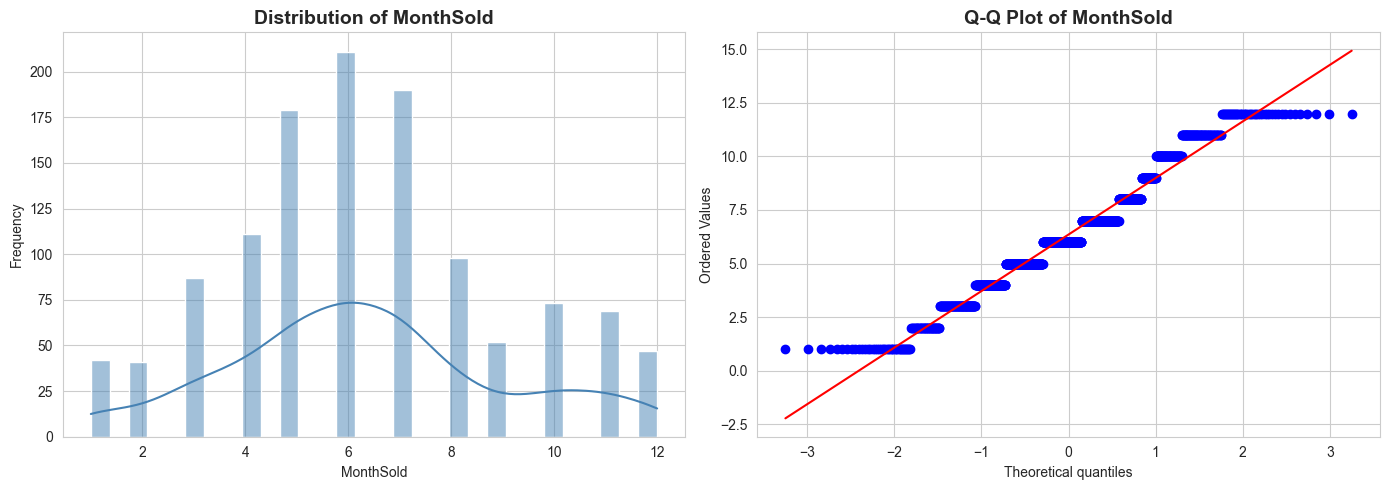

MonthSold - Skewness: 0.233, Kurtosis: -0.392
------------------------------------------------------------


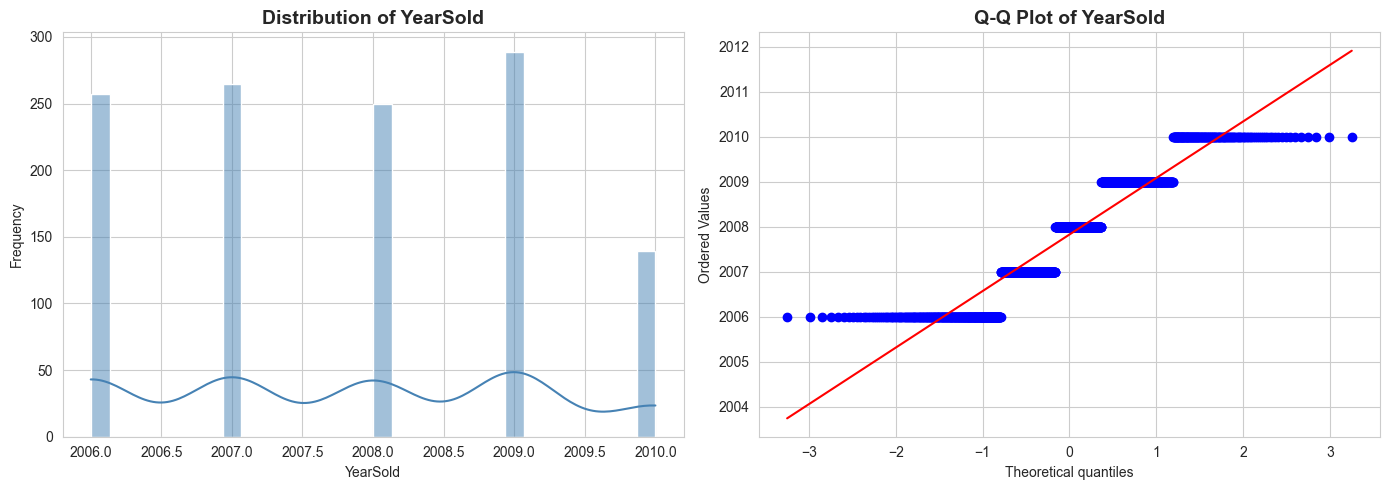

YearSold - Skewness: 0.072, Kurtosis: -1.195
------------------------------------------------------------


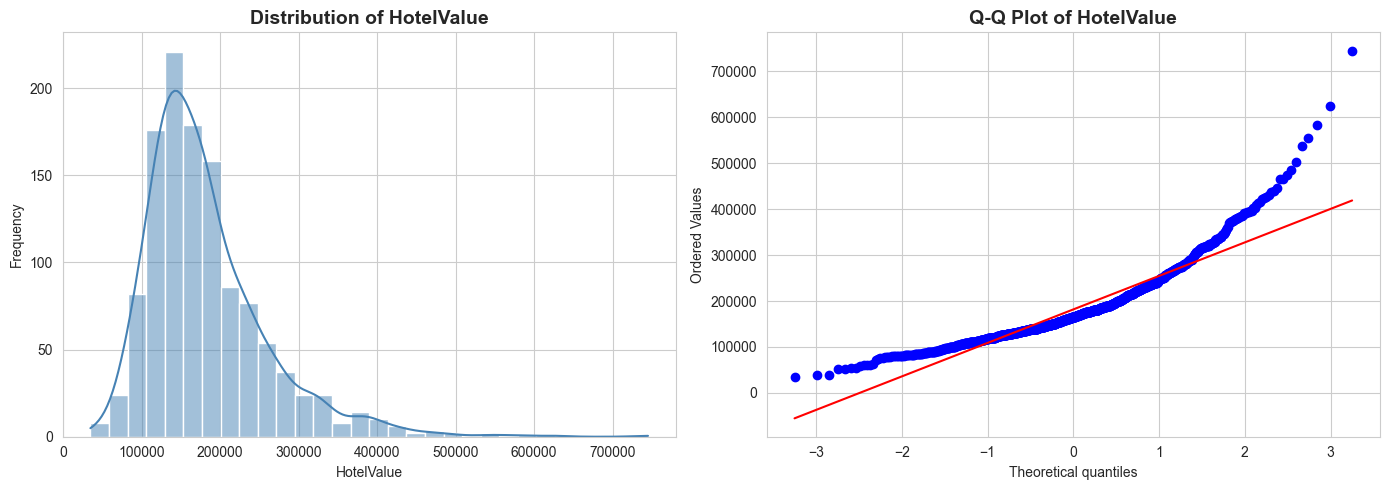

HotelValue - Skewness: 1.726, Kurtosis: 5.293
------------------------------------------------------------


In [13]:
for col in num_cols:
    plt.figure(figsize=(14, 5))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[col].dropna(), kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Q-Q plot for normality check
    plt.subplot(1, 2, 2)
    stats.probplot(train_df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print skewness and kurtosis
    skewness = train_df[col].skew()
    kurtosis_val = train_df[col].kurtosis()
    print(f"{col} - Skewness: {skewness:.3f}, Kurtosis: {kurtosis_val:.3f}")
    print("-" * 60)

%% [markdown]<br>
## Outlier Detection

%%<br>
Boxplots for outlier detection

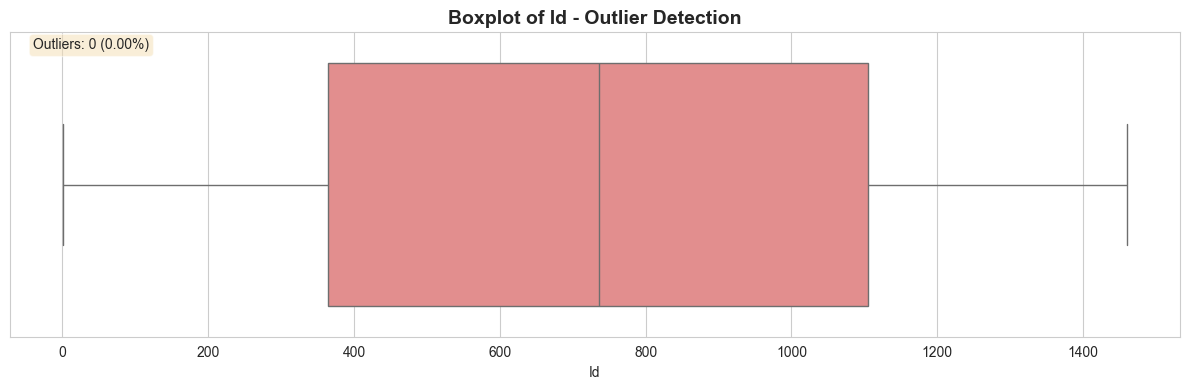

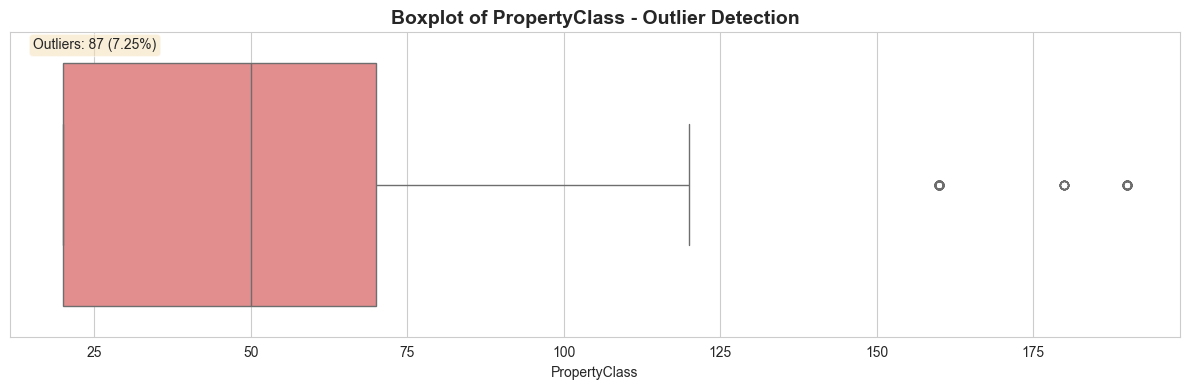

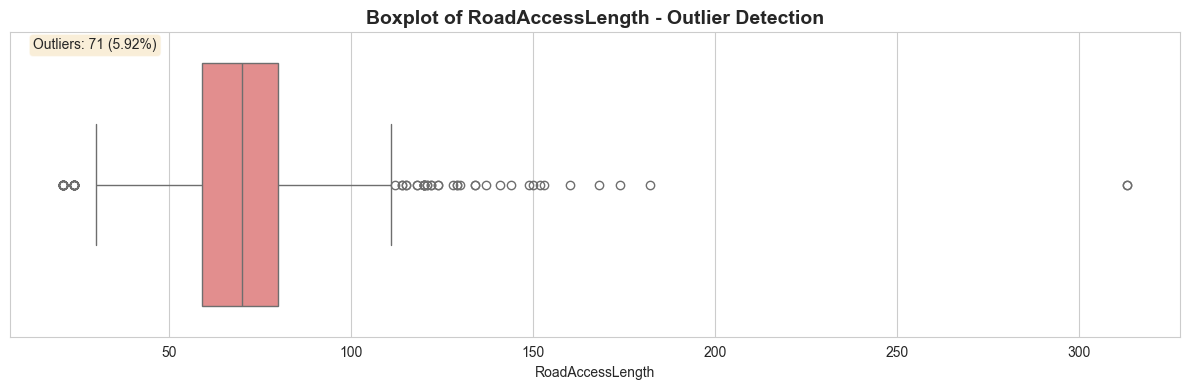

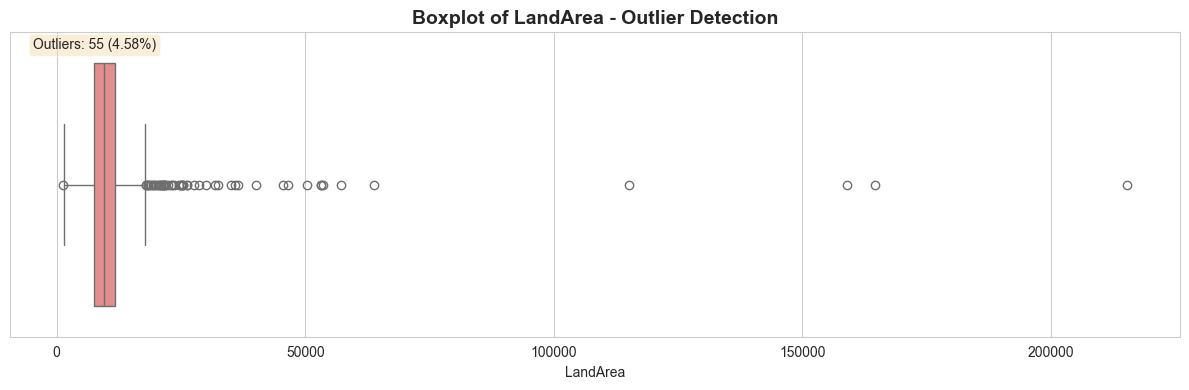

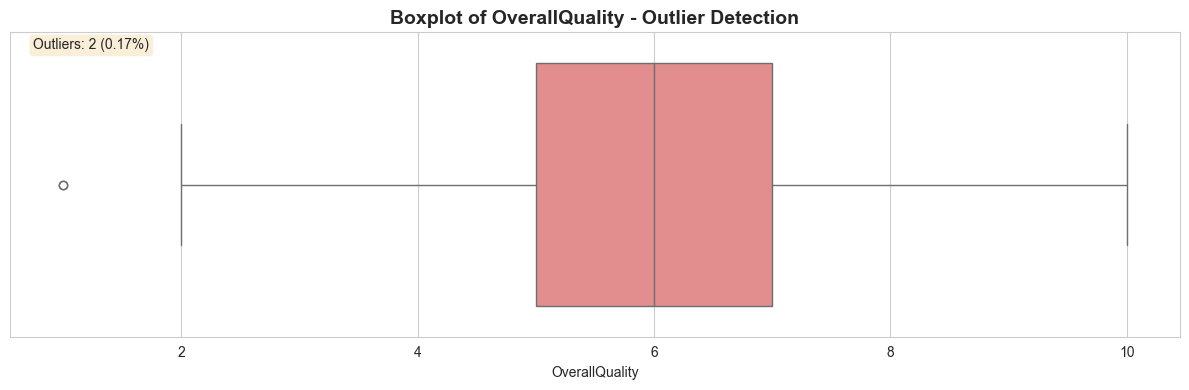

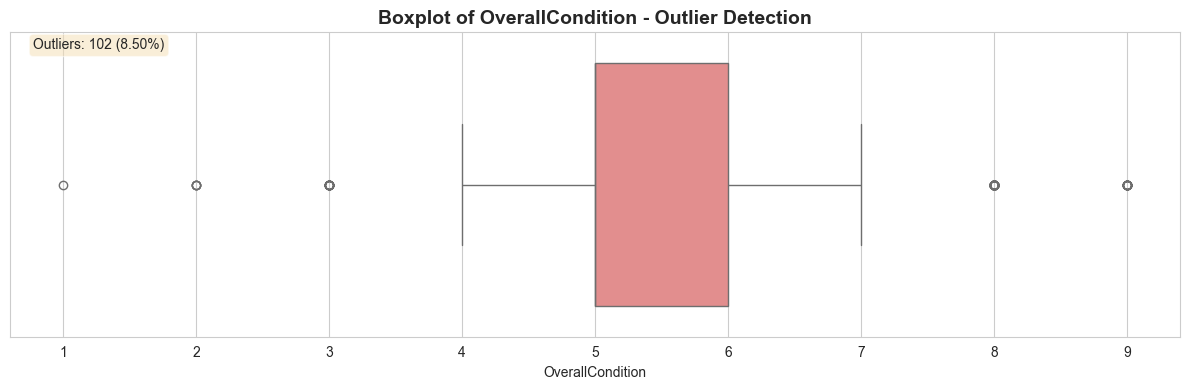

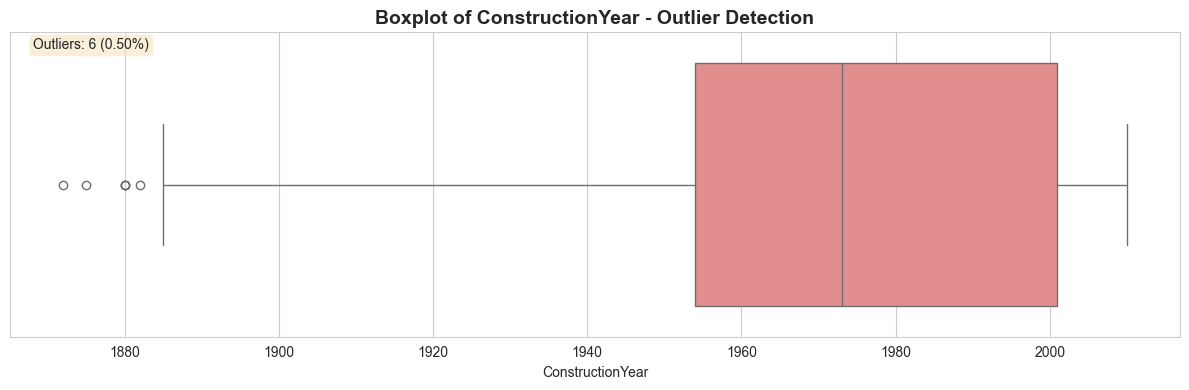

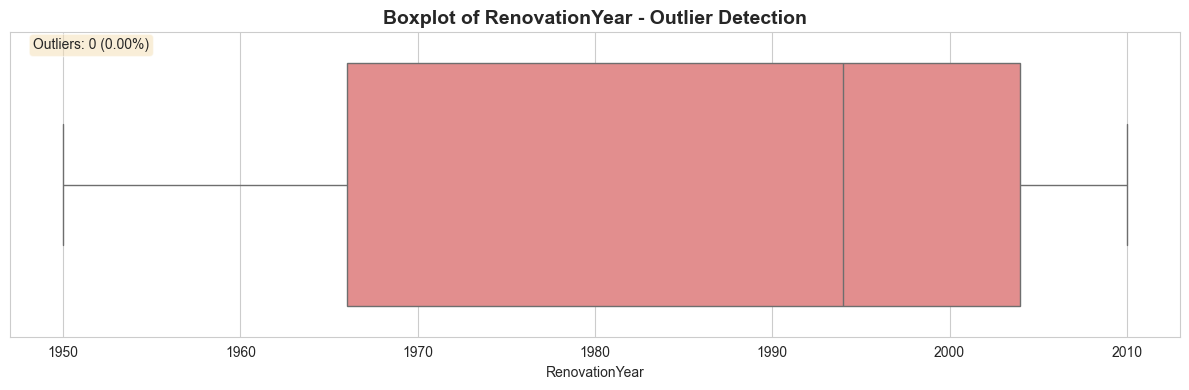

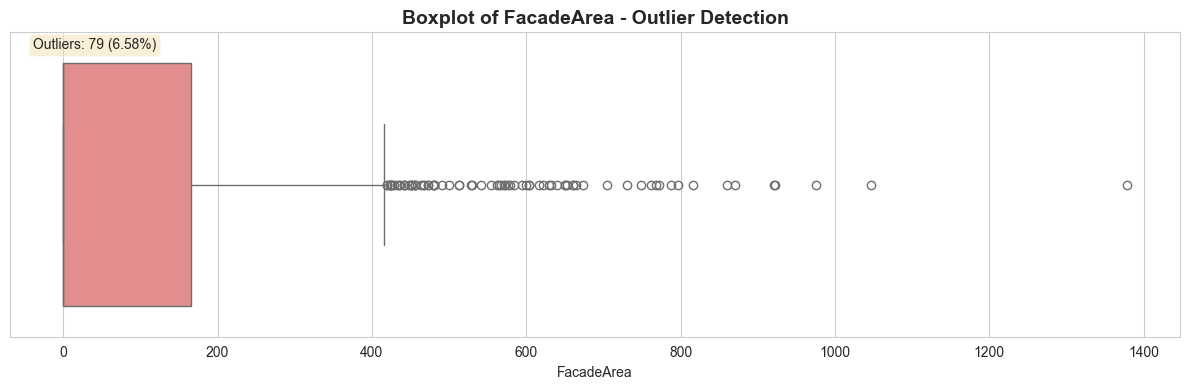

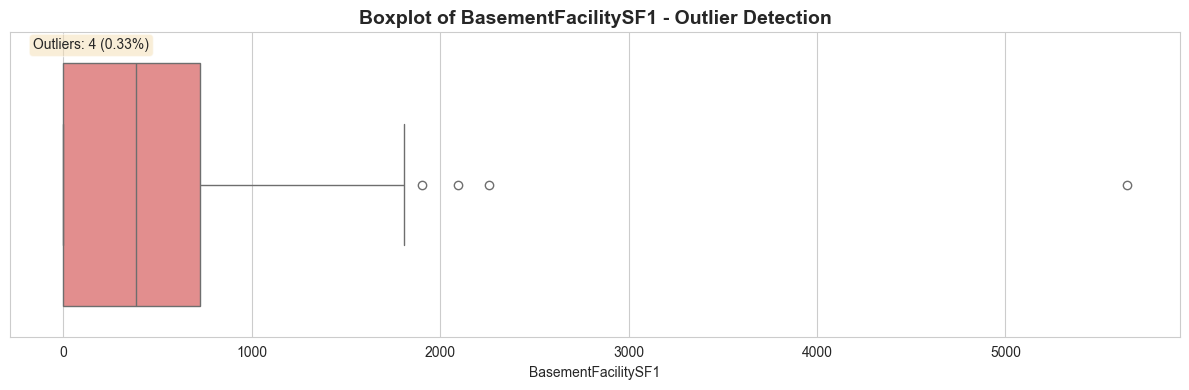

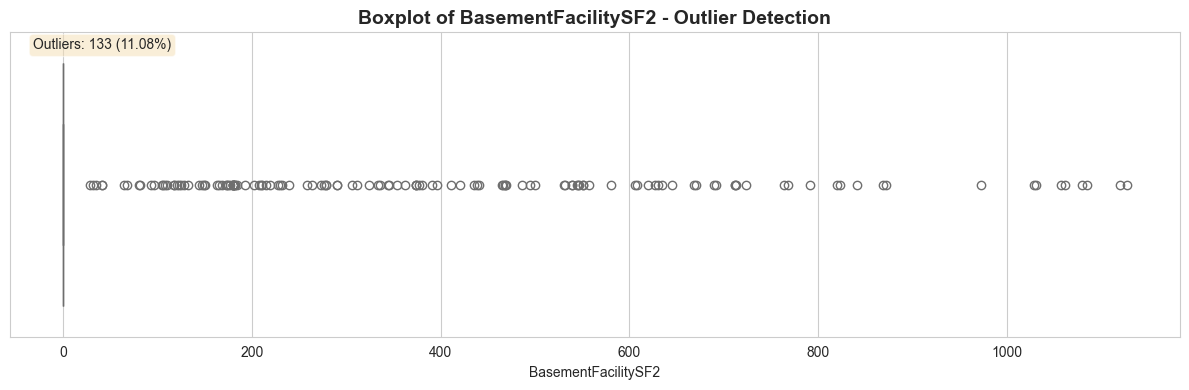

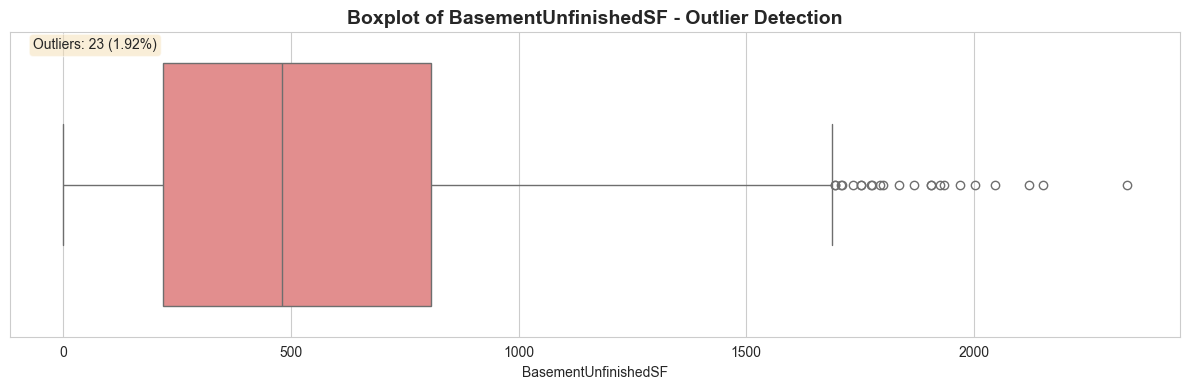

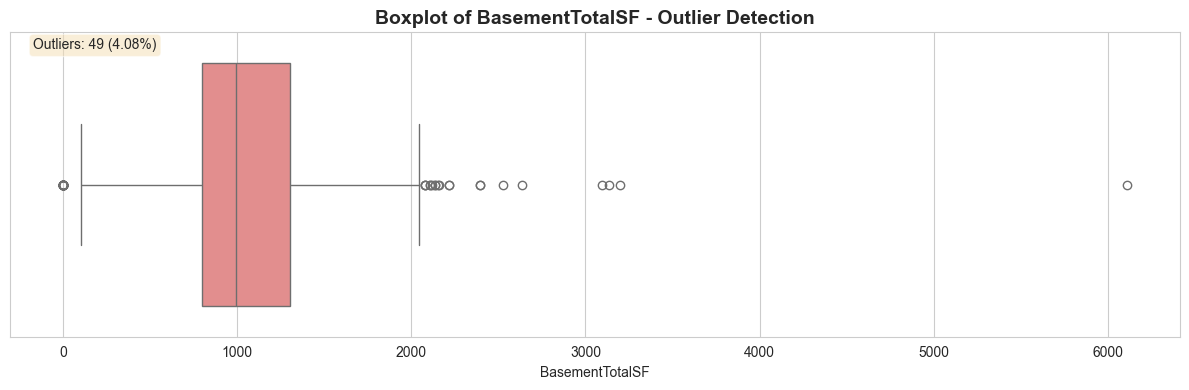

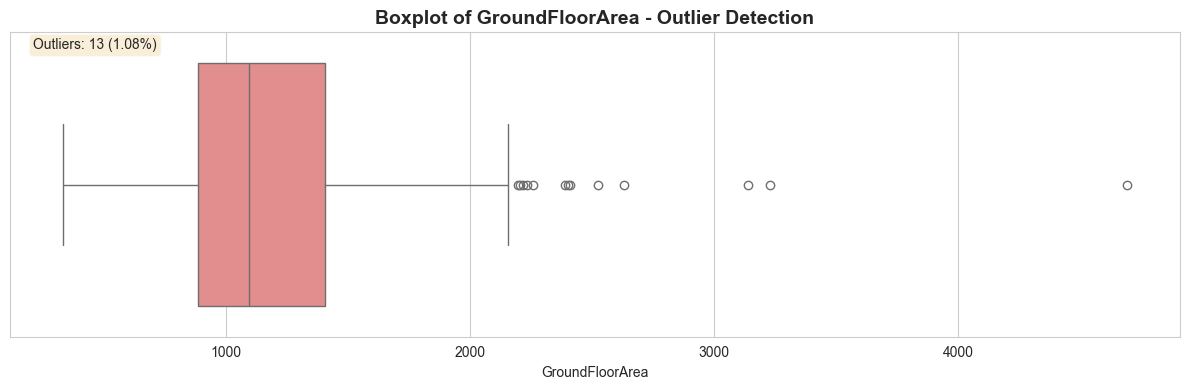

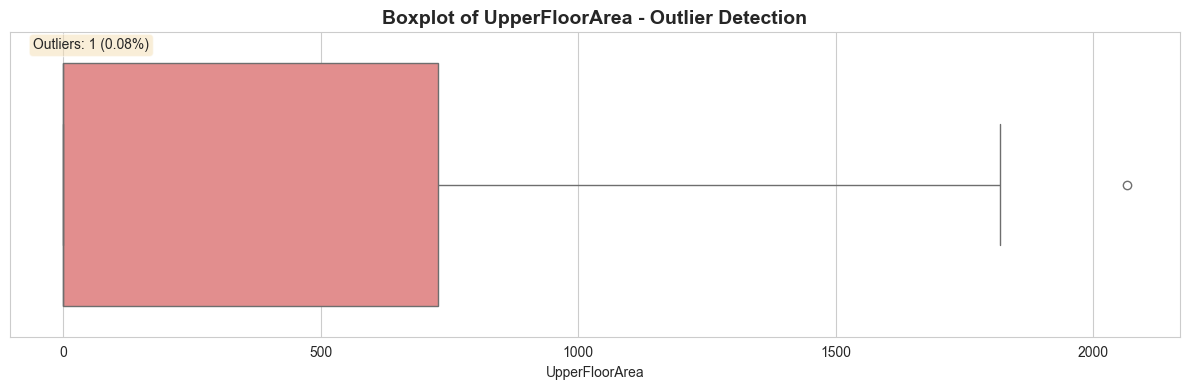

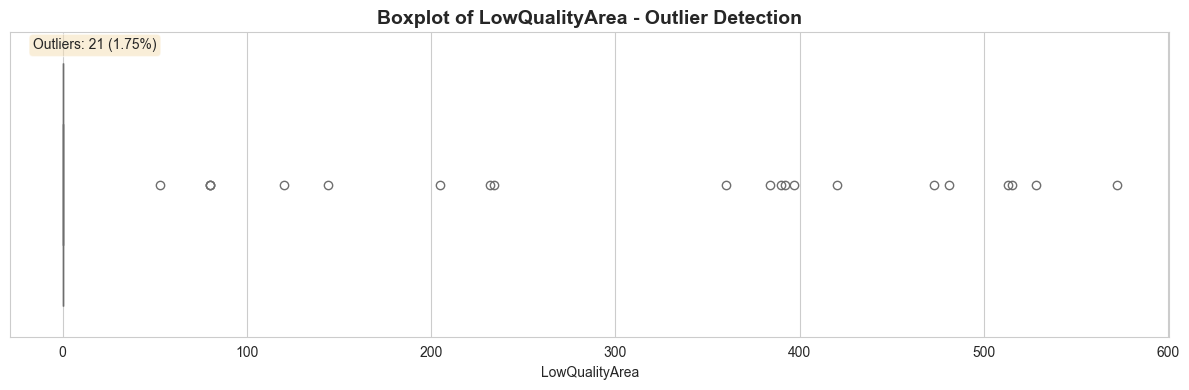

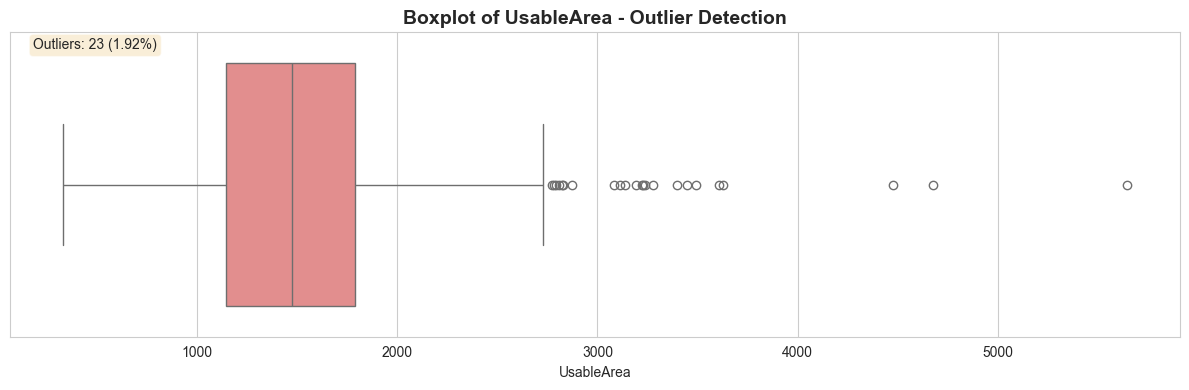

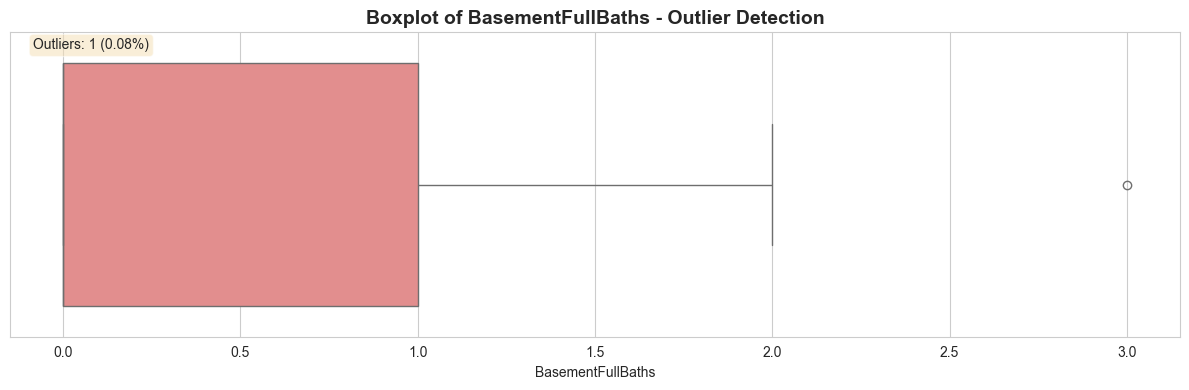

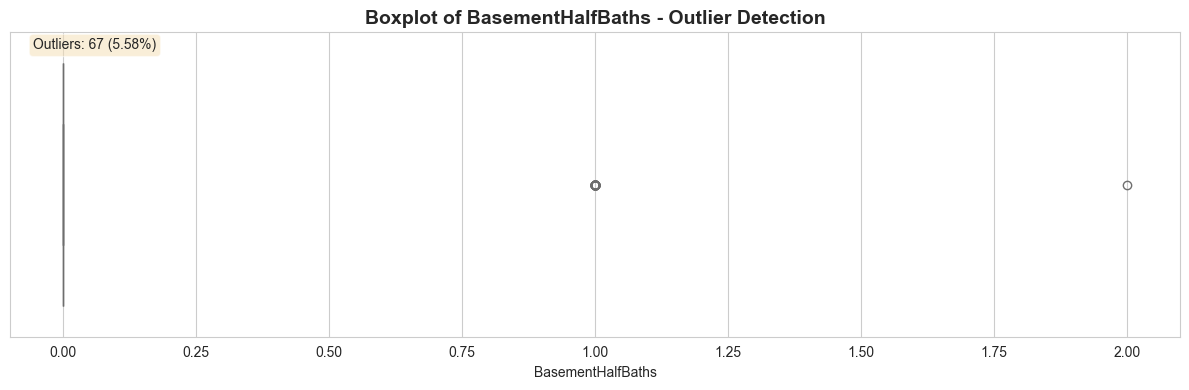

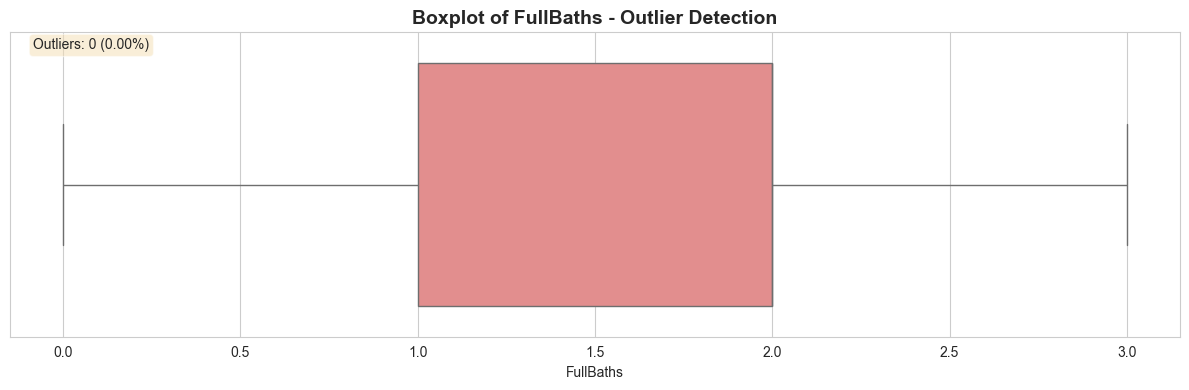

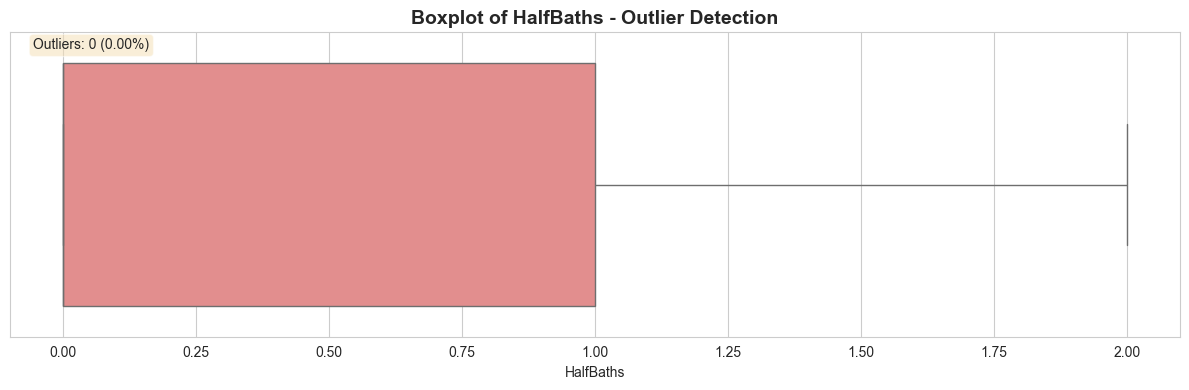

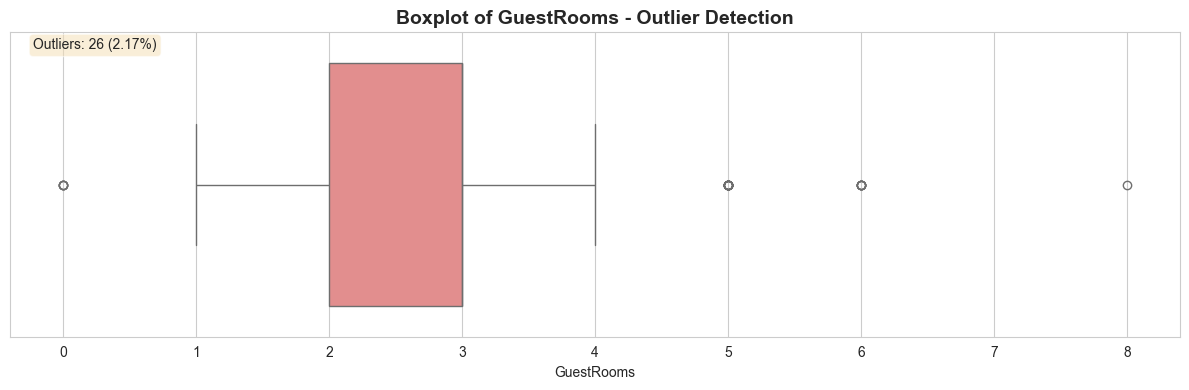

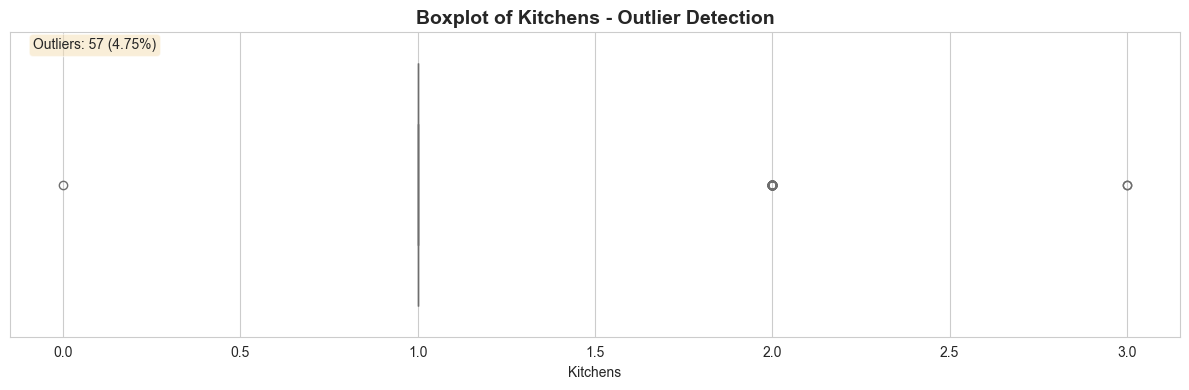

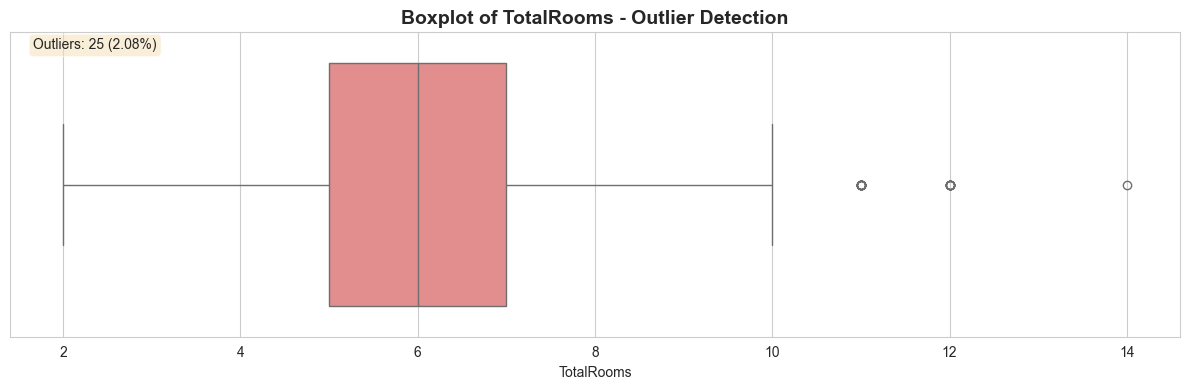

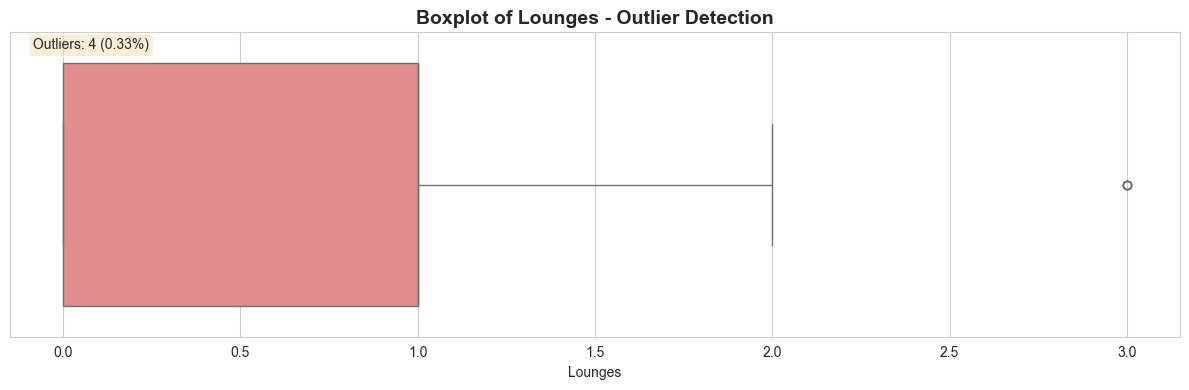

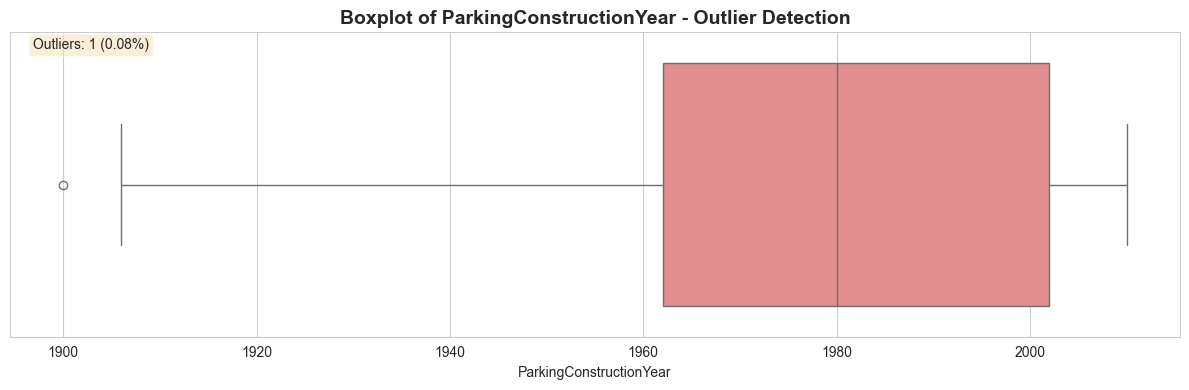

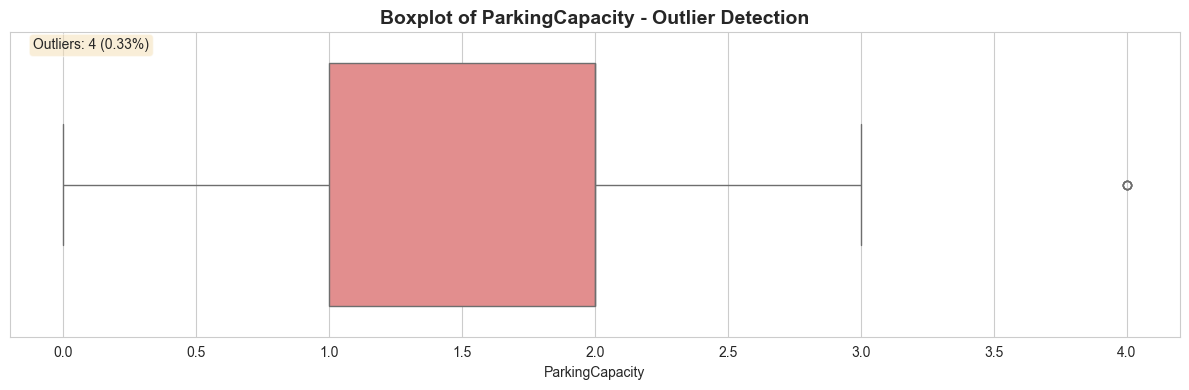

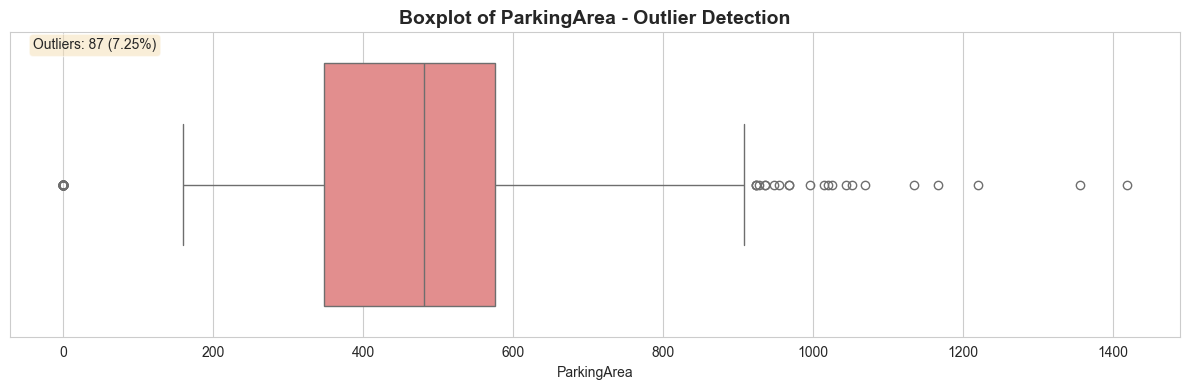

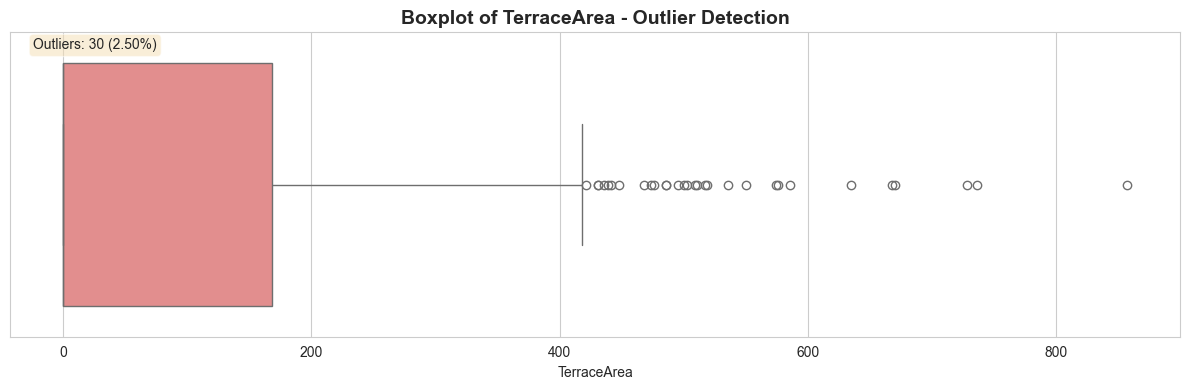

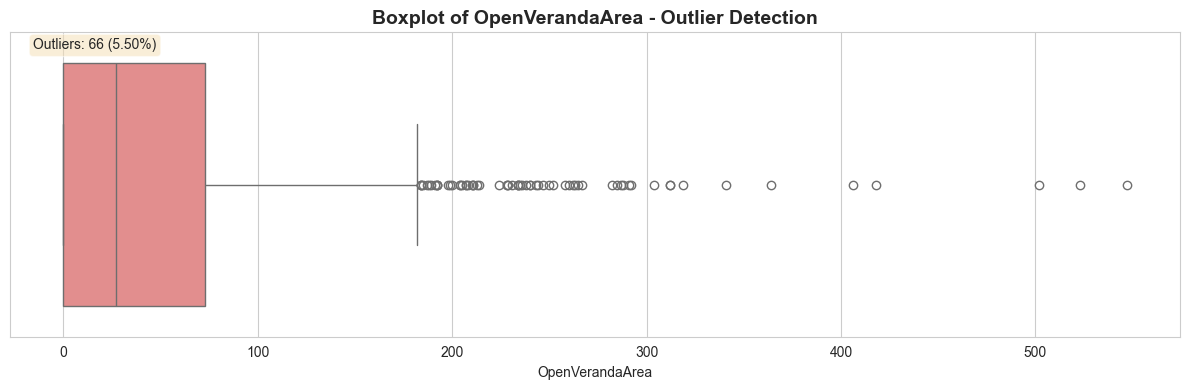

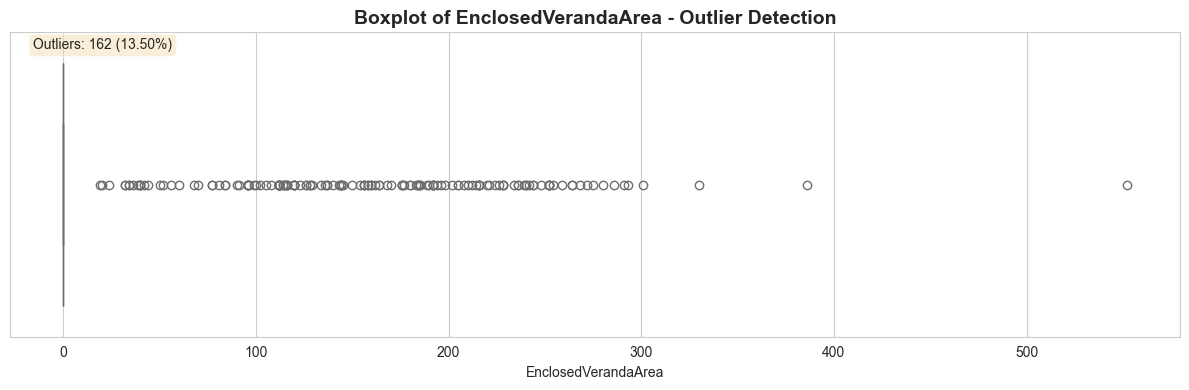

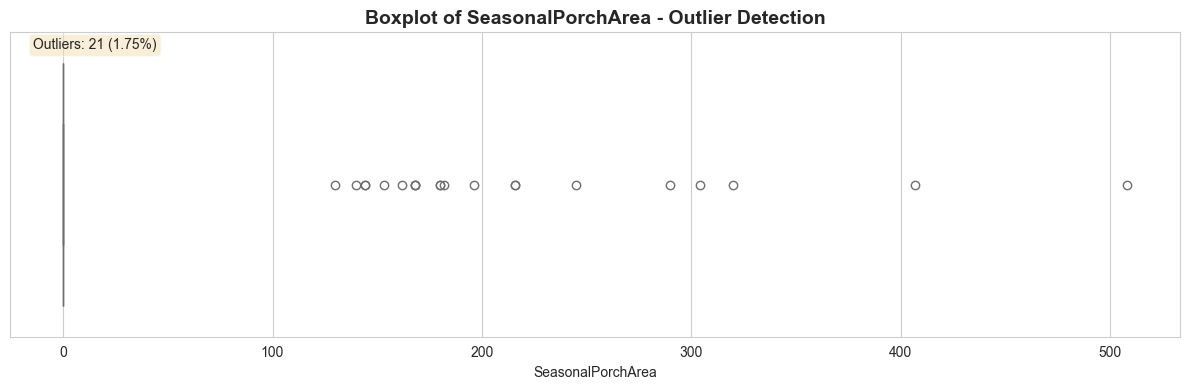

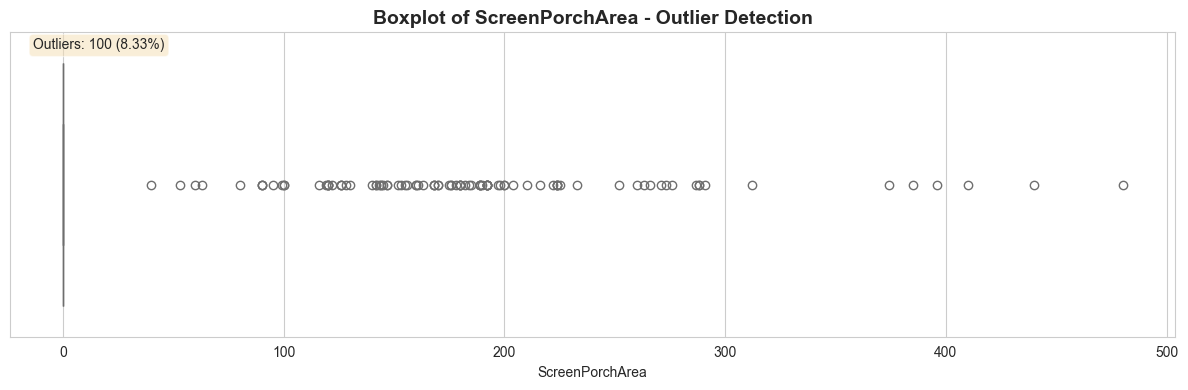

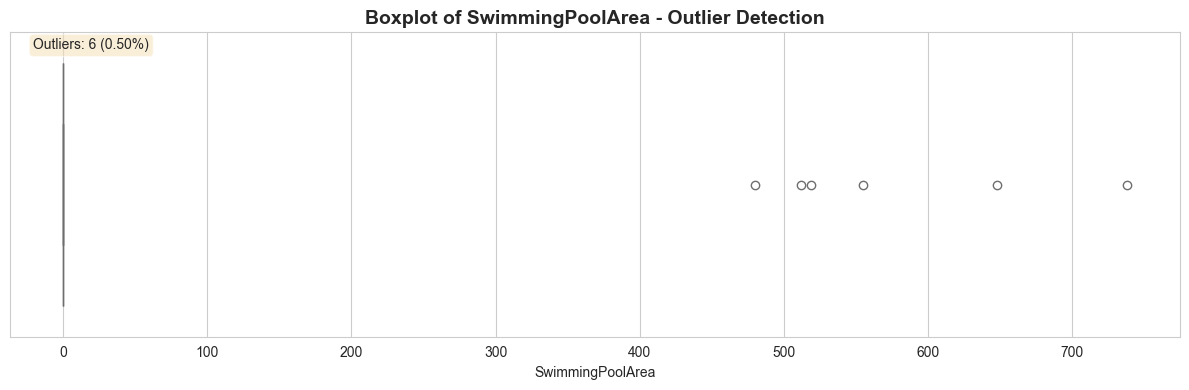

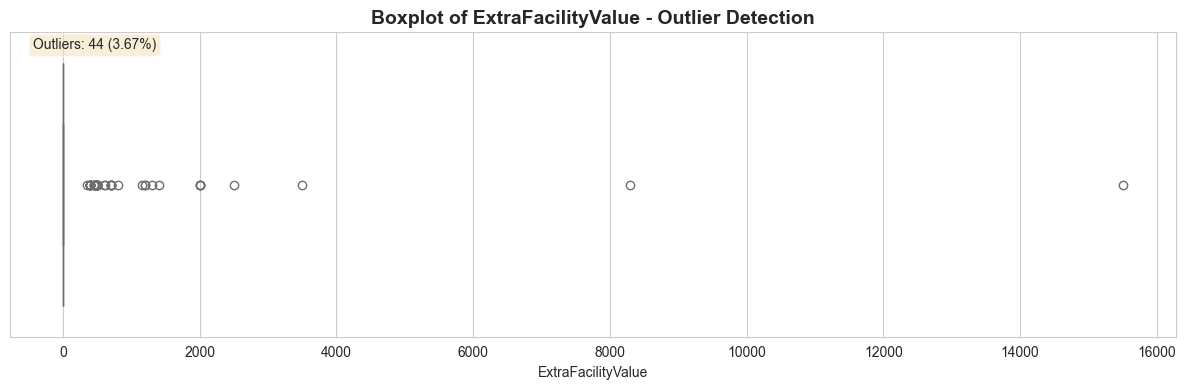

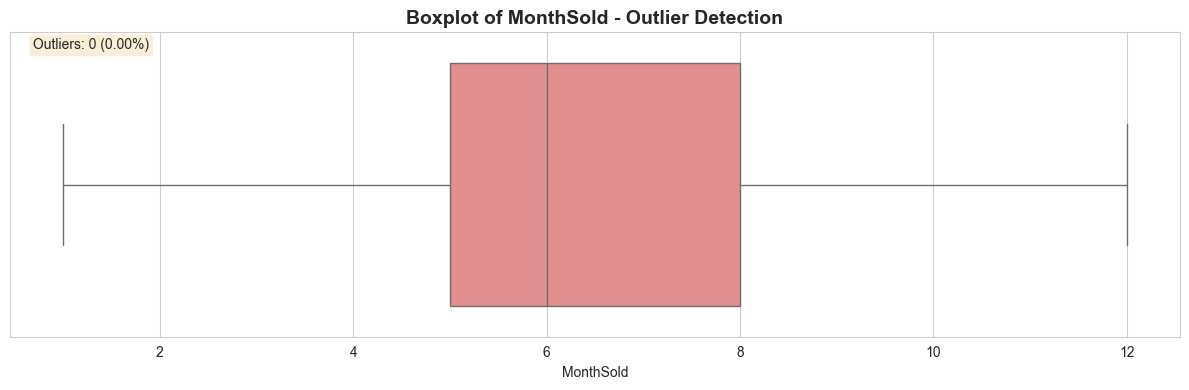

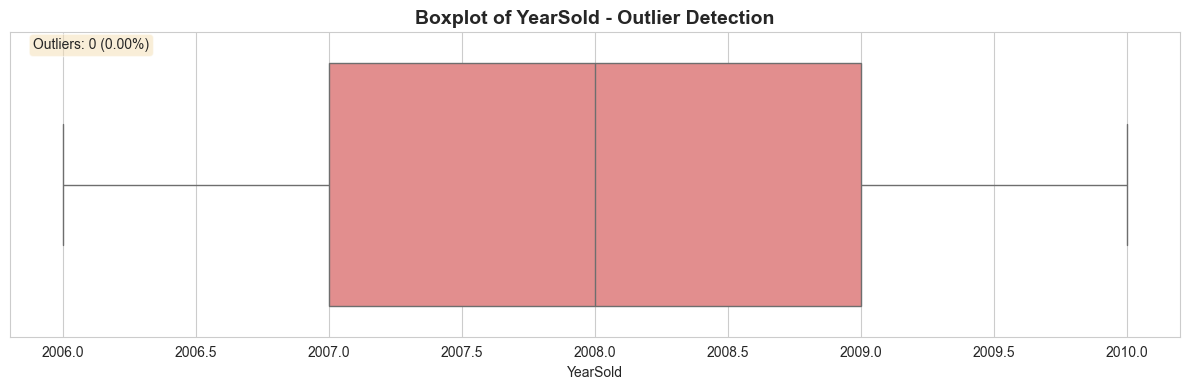

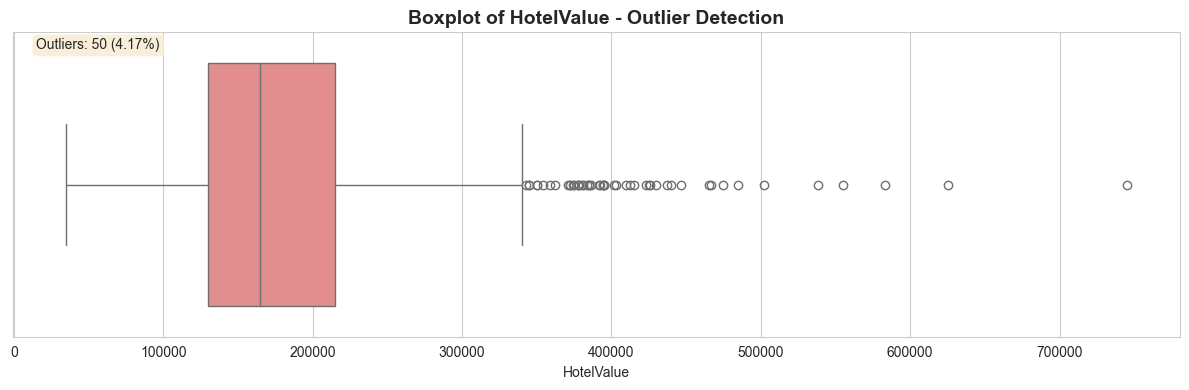

In [14]:
for col in num_cols:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=train_df[col], color='lightcoral')
    plt.title(f'Boxplot of {col} - Outlier Detection', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    
    # Calculate outlier statistics
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)][col]
    
    plt.text(0.02, 0.98, f'Outliers: {len(outliers)} ({len(outliers)/len(train_df)*100:.2f}%)', 
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()

%% [markdown]<br>
## Correlation Analysis

%%<br>
Correlation matrix

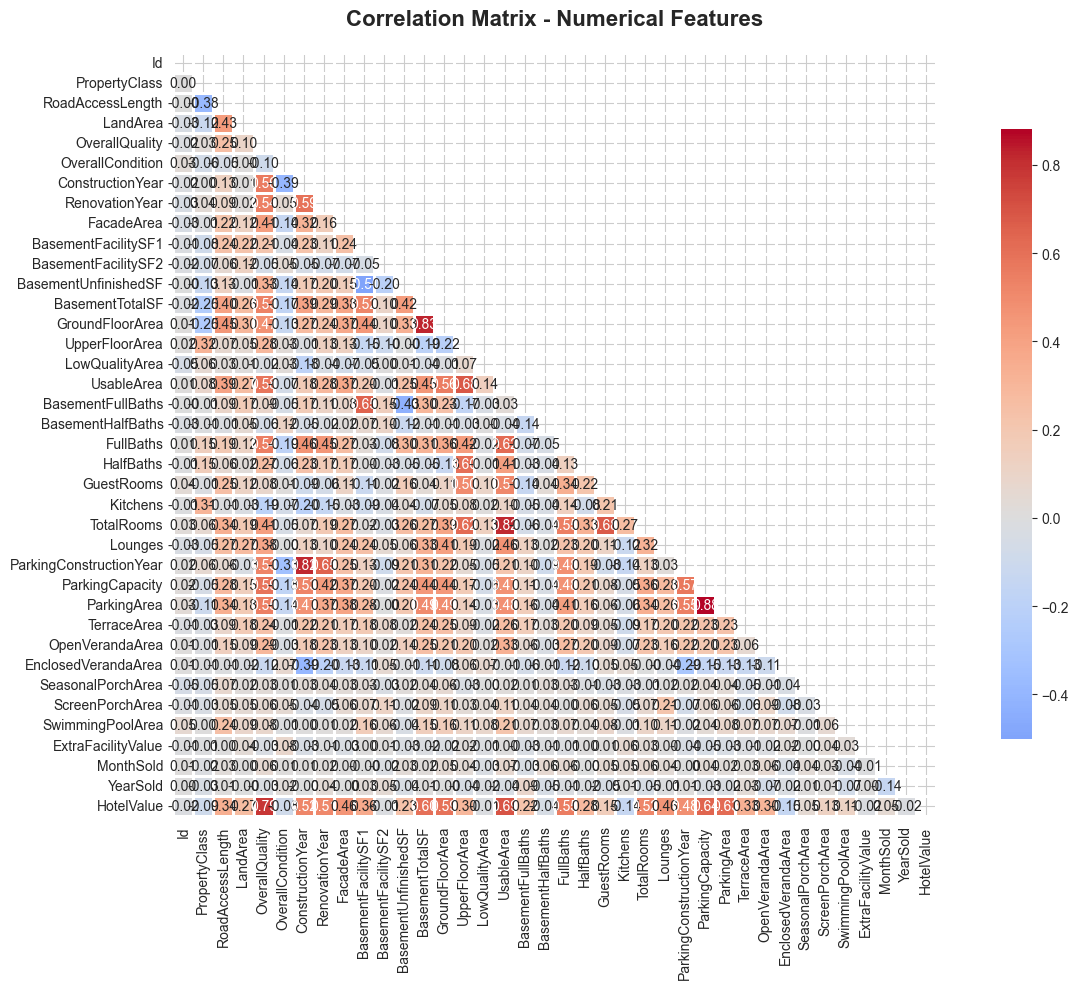

In [15]:
plt.figure(figsize=(14, 10))
correlation_matrix = train_df[num_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, mask=mask, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

%%<br>
Find highly correlated features

In [16]:
threshold = 0.7
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

In [17]:
if high_corr:
    print("\nHighly Correlated Features (|correlation| > 0.7):")
    print("="*60)
    high_corr_df = pd.DataFrame(high_corr)
    print(high_corr_df.to_string(index=False))
else:
    print("\nNo highly correlated feature pairs found (threshold = 0.7)")


Highly Correlated Features (|correlation| > 0.7):
       Feature 1               Feature 2  Correlation
  OverallQuality              HotelValue     0.787901
ConstructionYear ParkingConstructionYear     0.821432
 BasementTotalSF         GroundFloorArea     0.828736
      UsableArea              TotalRooms     0.819797
 ParkingCapacity             ParkingArea     0.881422


%% [markdown]<br>
## Categorical Features Analysis

%%<br>
Analysis of categorical features

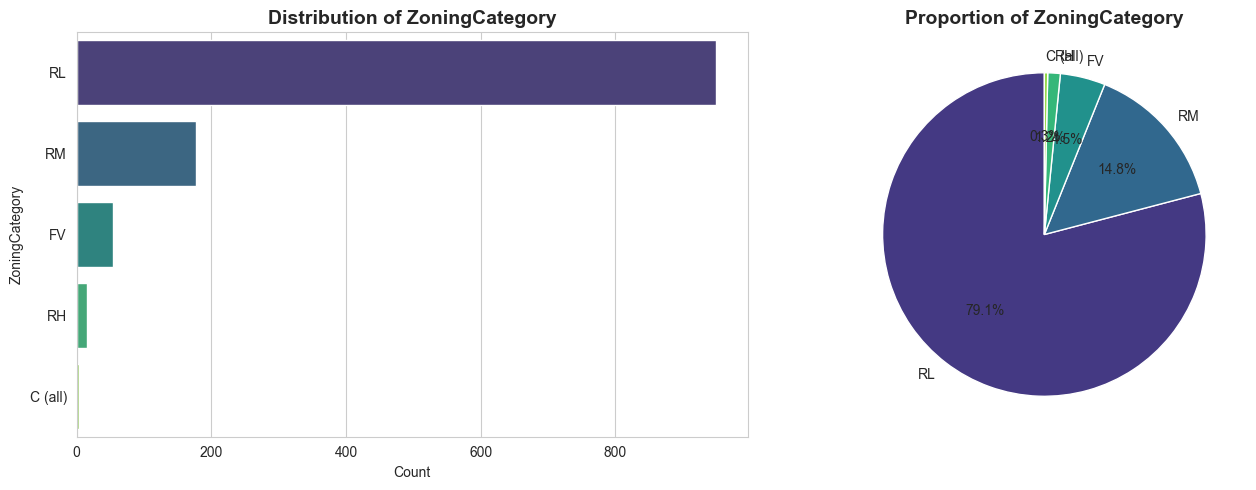


ZoningCategory - Unique values: 5
ZoningCategory
RL         949
RM         178
FV          54
RH          15
C (all)      4
Name: count, dtype: int64
------------------------------------------------------------


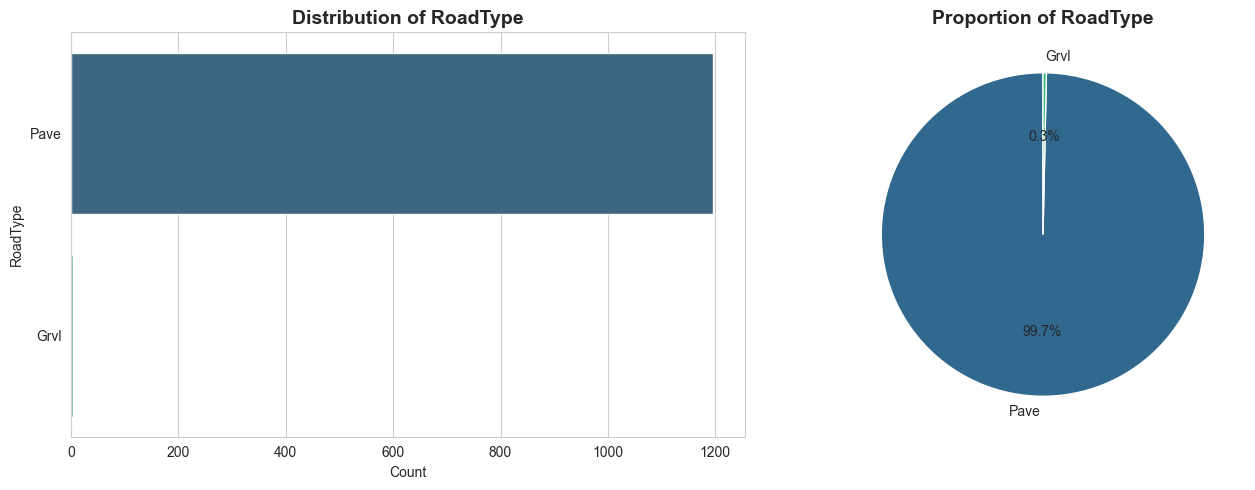


RoadType - Unique values: 2
RoadType
Pave    1196
Grvl       4
Name: count, dtype: int64
------------------------------------------------------------


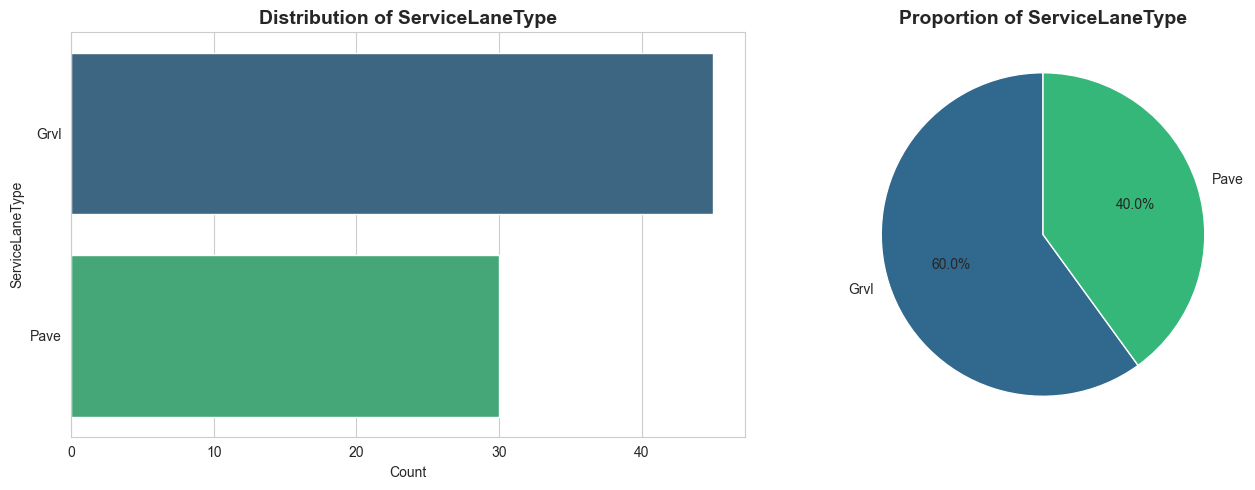


ServiceLaneType - Unique values: 2
ServiceLaneType
Grvl    45
Pave    30
Name: count, dtype: int64
------------------------------------------------------------


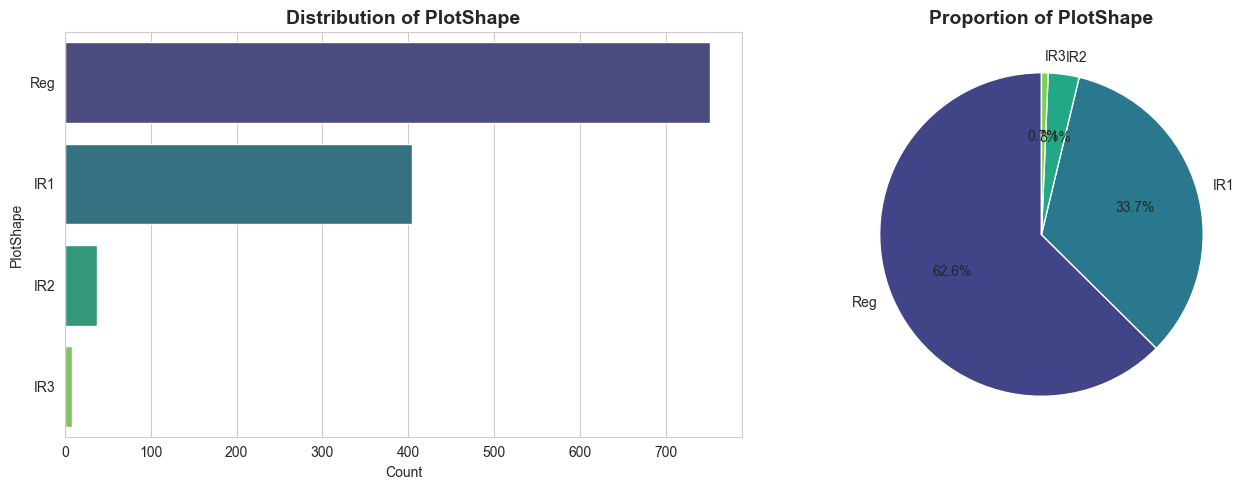


PlotShape - Unique values: 4
PlotShape
Reg    751
IR1    404
IR2     37
IR3      8
Name: count, dtype: int64
------------------------------------------------------------


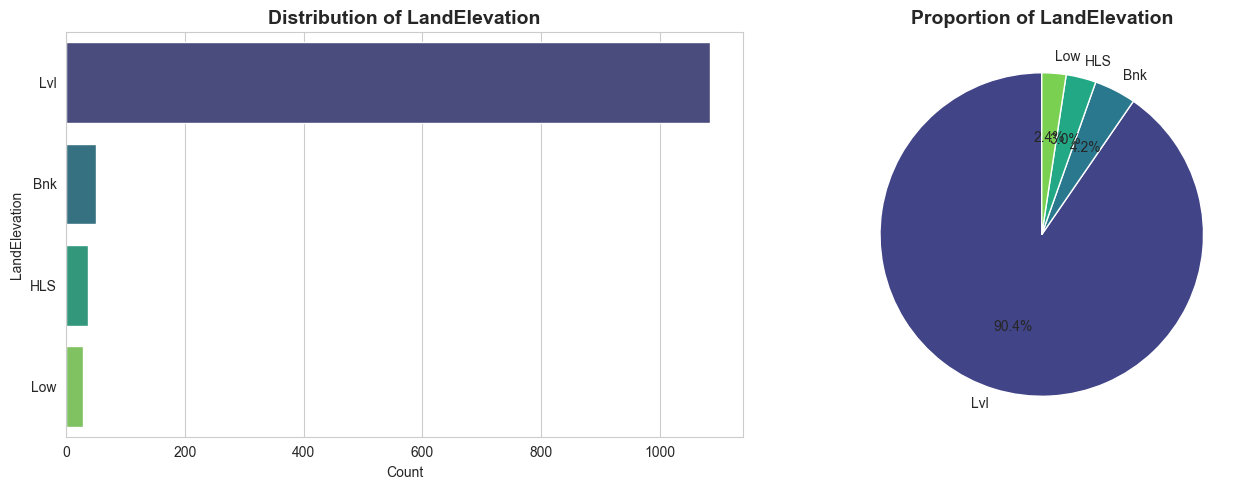


LandElevation - Unique values: 4
LandElevation
Lvl    1085
Bnk      50
HLS      36
Low      29
Name: count, dtype: int64
------------------------------------------------------------


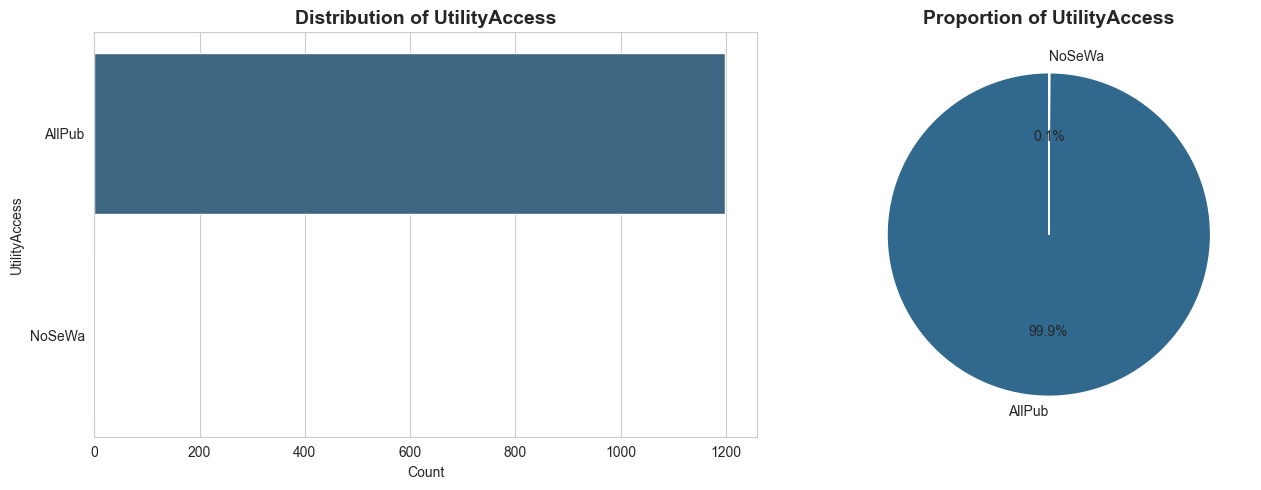


UtilityAccess - Unique values: 2
UtilityAccess
AllPub    1199
NoSeWa       1
Name: count, dtype: int64
------------------------------------------------------------


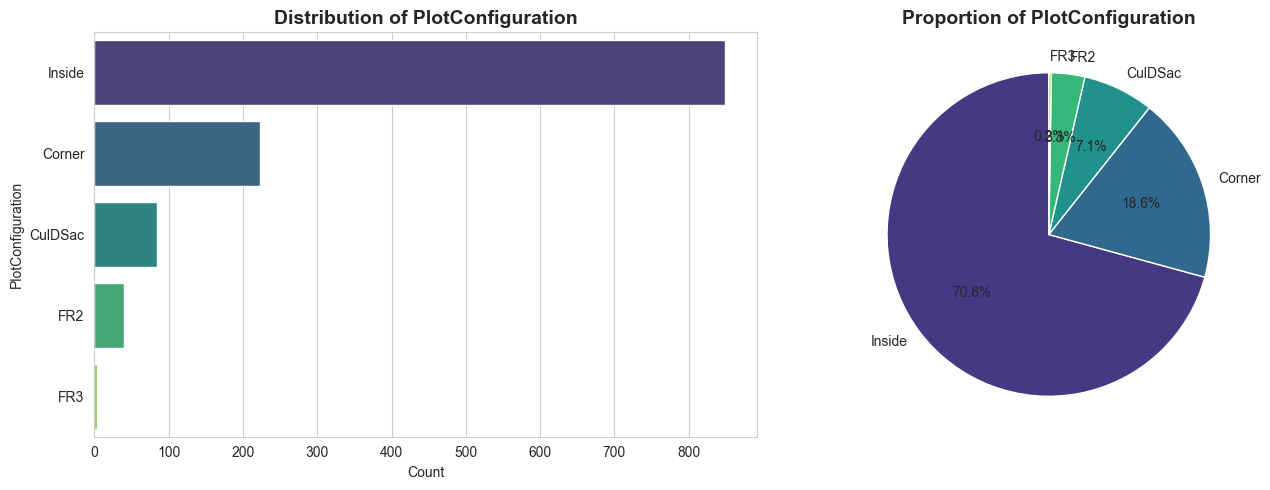


PlotConfiguration - Unique values: 5
PlotConfiguration
Inside     849
Corner     223
CulDSac     85
FR2         40
FR3          3
Name: count, dtype: int64
------------------------------------------------------------


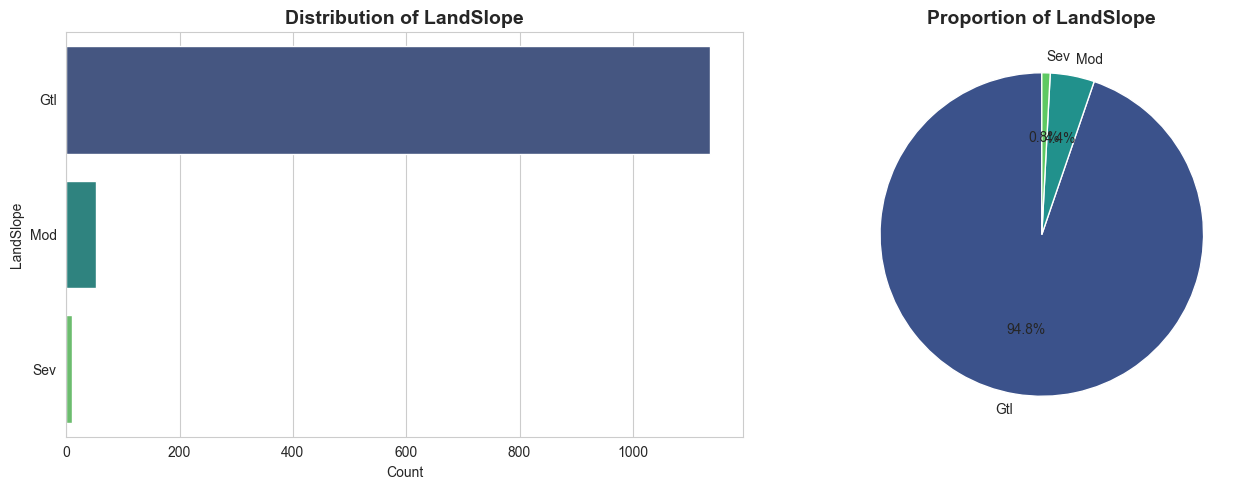


LandSlope - Unique values: 3
LandSlope
Gtl    1137
Mod      53
Sev      10
Name: count, dtype: int64
------------------------------------------------------------


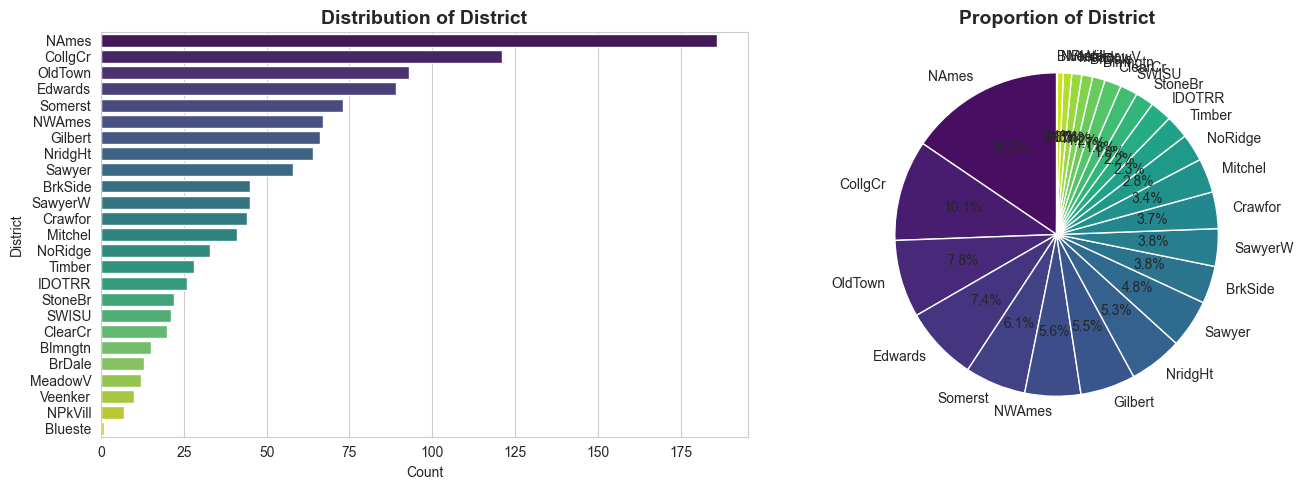


District - Unique values: 25
District
NAmes      186
CollgCr    121
OldTown     93
Edwards     89
Somerst     73
NWAmes      67
Gilbert     66
NridgHt     64
Sawyer      58
BrkSide     45
SawyerW     45
Crawfor     44
Mitchel     41
NoRidge     33
Timber      28
IDOTRR      26
StoneBr     22
SWISU       21
ClearCr     20
Blmngtn     15
BrDale      13
MeadowV     12
Veenker     10
NPkVill      7
Blueste      1
Name: count, dtype: int64
------------------------------------------------------------


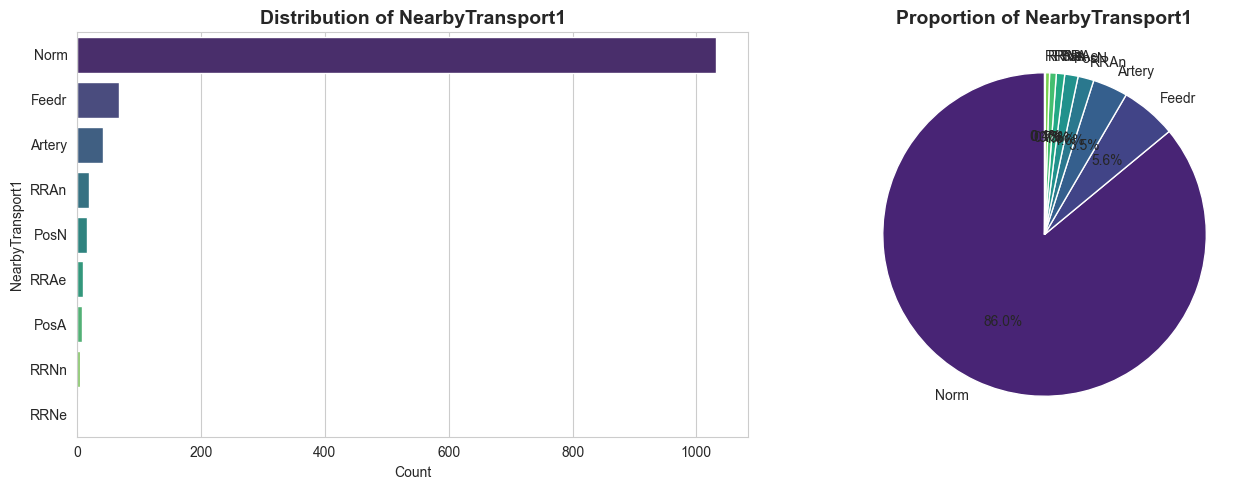


NearbyTransport1 - Unique values: 9
NearbyTransport1
Norm      1032
Feedr       67
Artery      42
RRAn        19
PosN        16
RRAe        10
PosA         8
RRNn         5
RRNe         1
Name: count, dtype: int64
------------------------------------------------------------


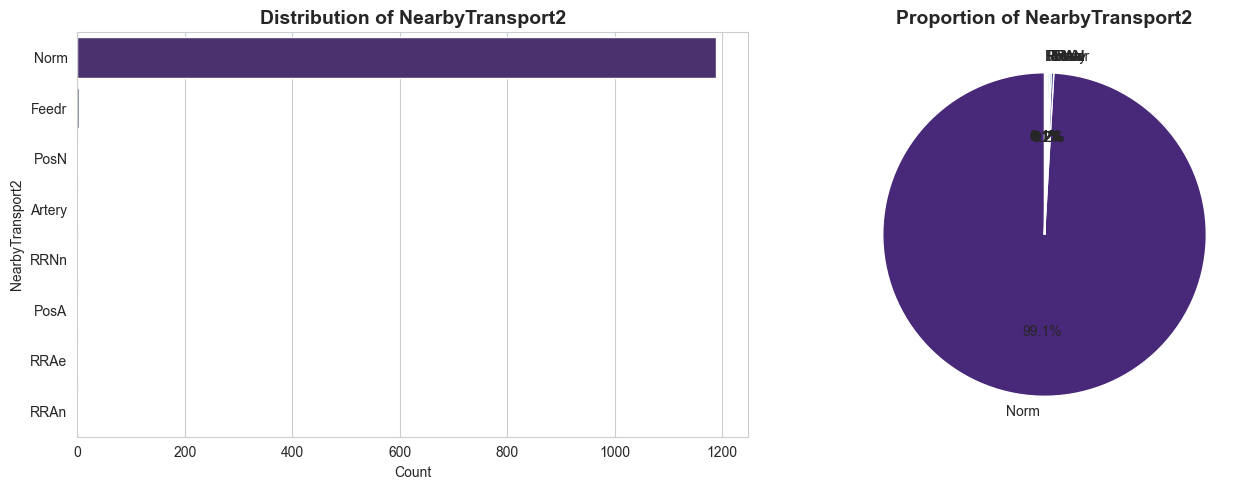


NearbyTransport2 - Unique values: 8
NearbyTransport2
Norm      1189
Feedr        3
PosN         2
Artery       2
RRNn         1
PosA         1
RRAe         1
RRAn         1
Name: count, dtype: int64
------------------------------------------------------------


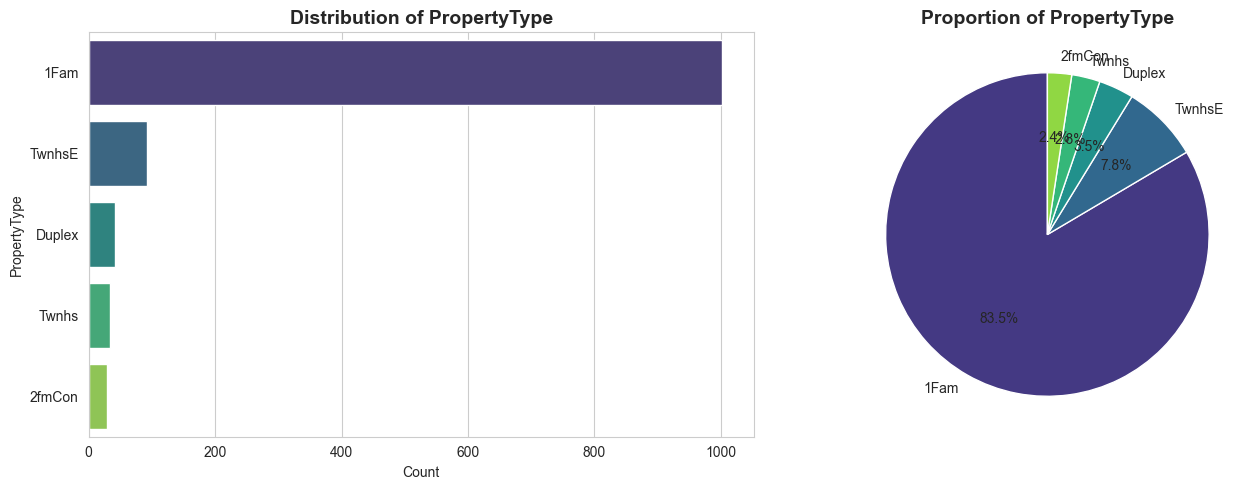


PropertyType - Unique values: 5
PropertyType
1Fam      1002
TwnhsE      93
Duplex      42
Twnhs       34
2fmCon      29
Name: count, dtype: int64
------------------------------------------------------------


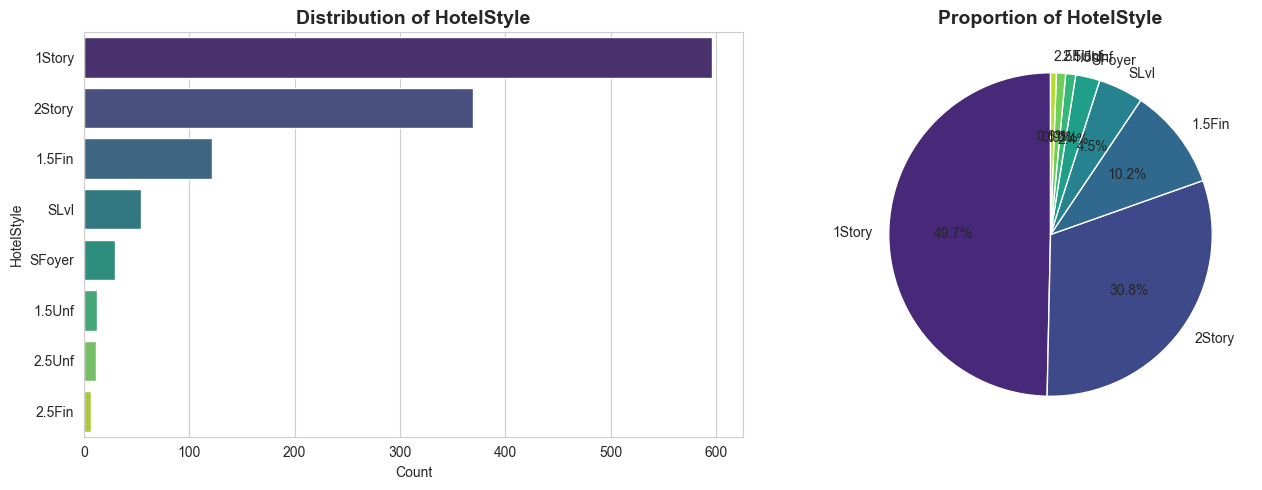


HotelStyle - Unique values: 8
HotelStyle
1Story    596
2Story    369
1.5Fin    122
SLvl       54
SFoyer     29
1.5Unf     12
2.5Unf     11
2.5Fin      7
Name: count, dtype: int64
------------------------------------------------------------


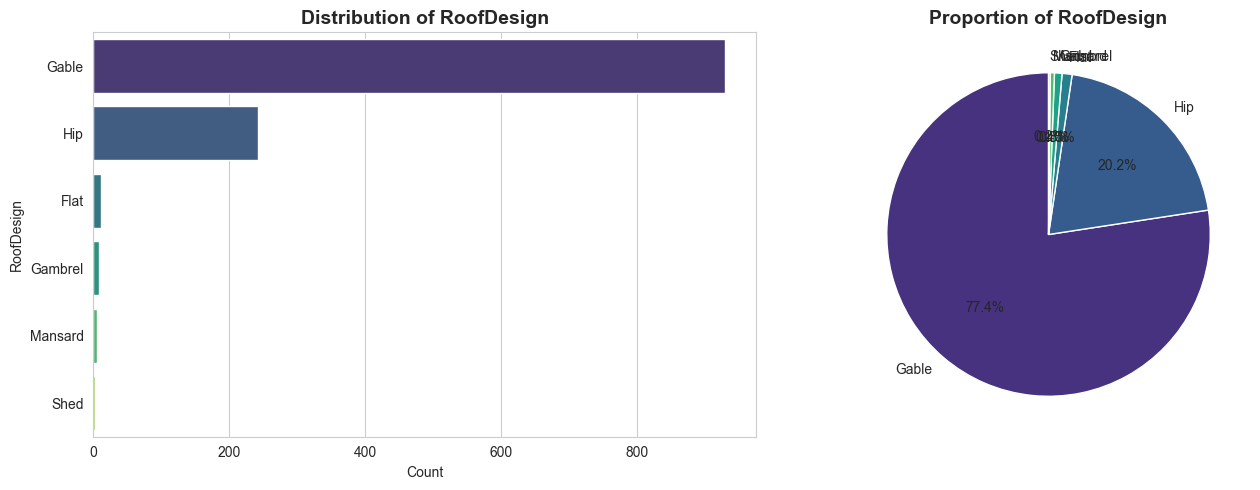


RoofDesign - Unique values: 6
RoofDesign
Gable      929
Hip        243
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: count, dtype: int64
------------------------------------------------------------


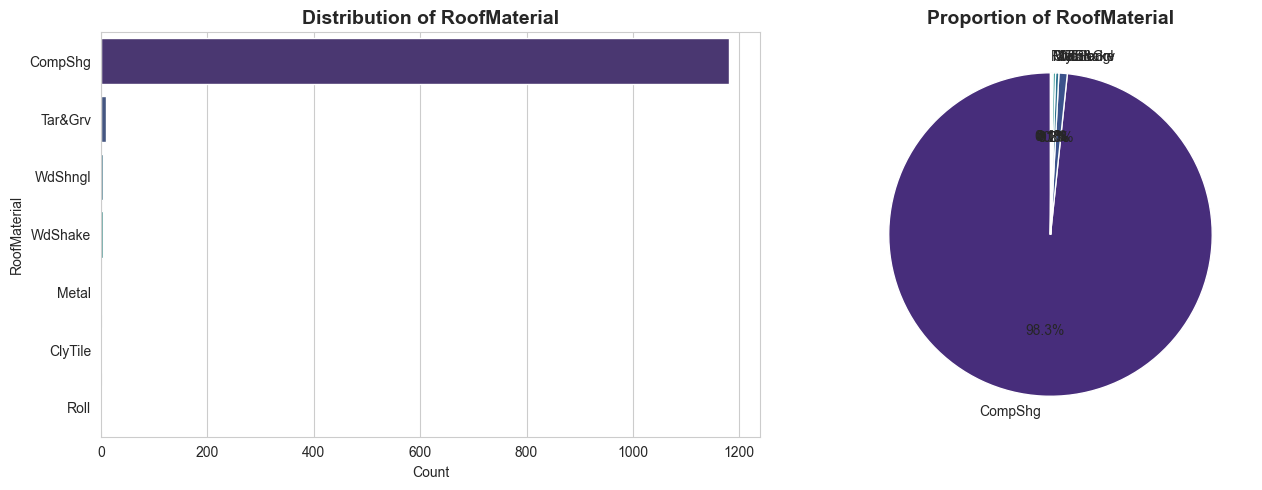


RoofMaterial - Unique values: 7
RoofMaterial
CompShg    1180
Tar&Grv      10
WdShngl       4
WdShake       3
Metal         1
ClyTile       1
Roll          1
Name: count, dtype: int64
------------------------------------------------------------


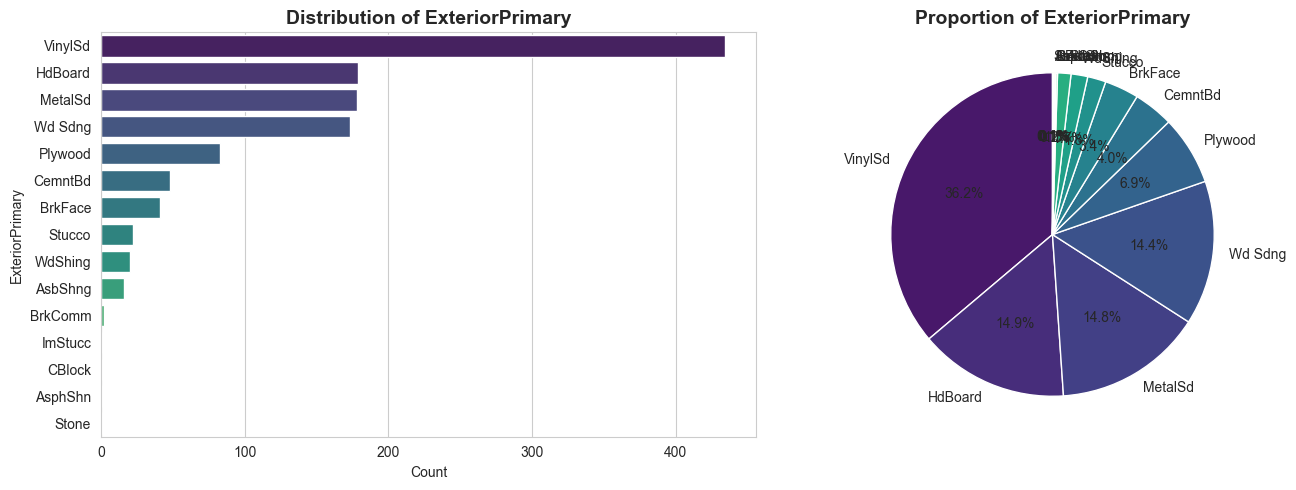


ExteriorPrimary - Unique values: 15
ExteriorPrimary
VinylSd    434
HdBoard    179
MetalSd    178
Wd Sdng    173
Plywood     83
CemntBd     48
BrkFace     41
Stucco      22
WdShing     20
AsbShng     16
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Stone        1
Name: count, dtype: int64
------------------------------------------------------------


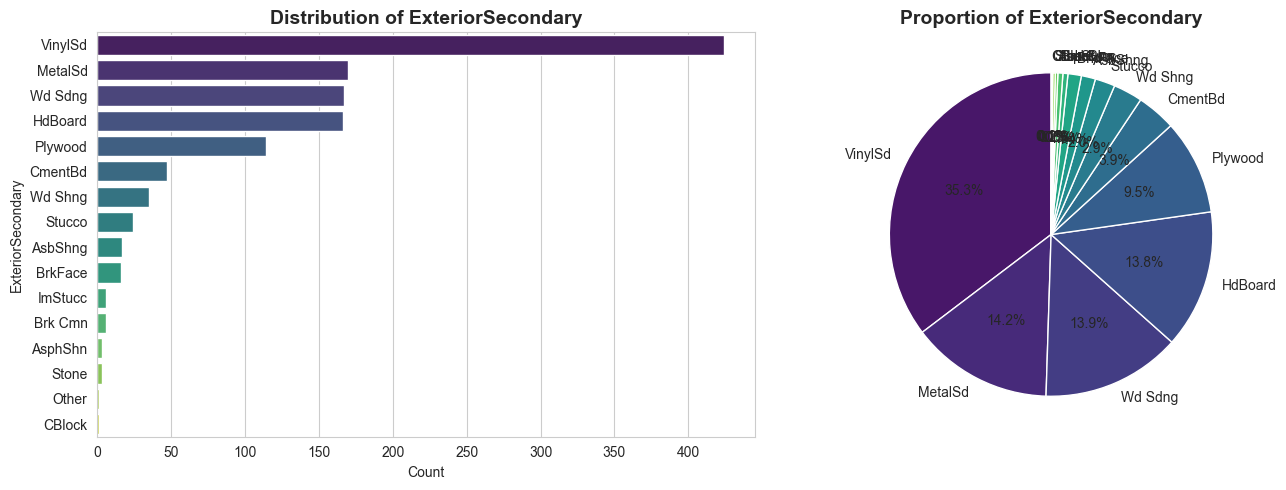


ExteriorSecondary - Unique values: 16
ExteriorSecondary
VinylSd    424
MetalSd    170
Wd Sdng    167
HdBoard    166
Plywood    114
CmentBd     47
Wd Shng     35
Stucco      24
AsbShng     17
BrkFace     16
ImStucc      6
Brk Cmn      6
AsphShn      3
Stone        3
Other        1
CBlock       1
Name: count, dtype: int64
------------------------------------------------------------


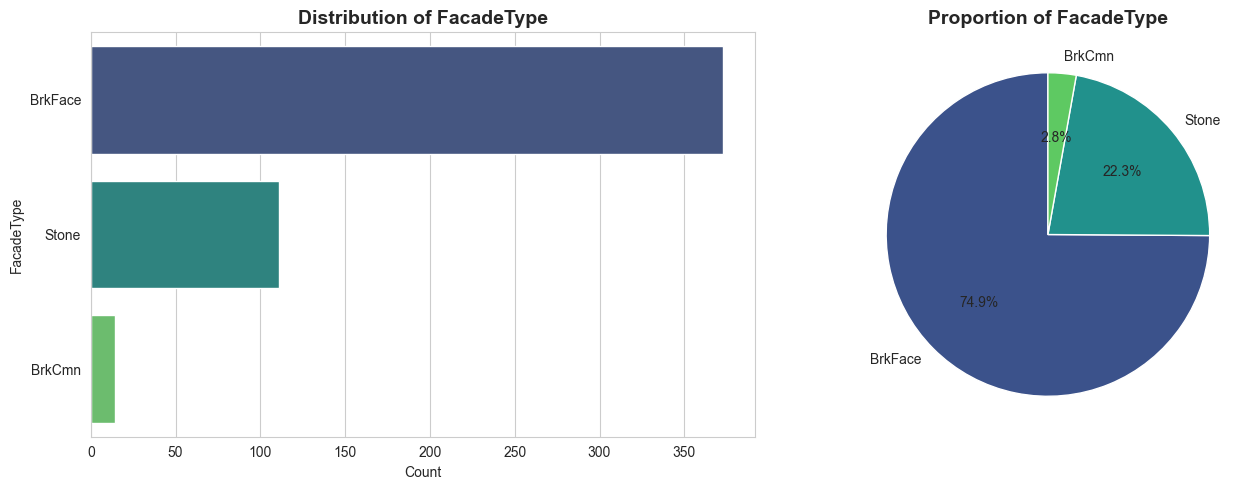


FacadeType - Unique values: 3
FacadeType
BrkFace    373
Stone      111
BrkCmn      14
Name: count, dtype: int64
------------------------------------------------------------


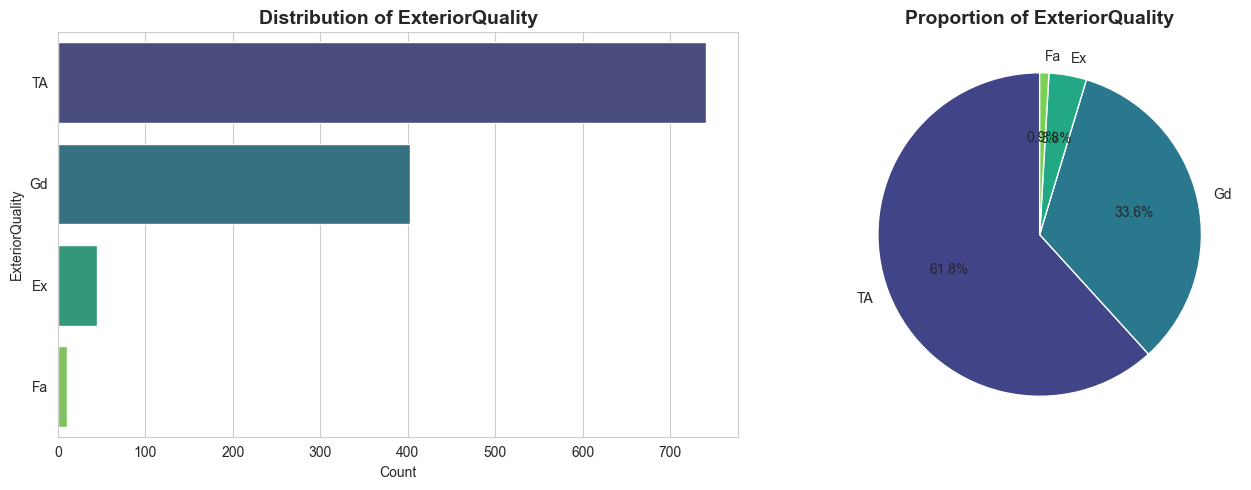


ExteriorQuality - Unique values: 4
ExteriorQuality
TA    741
Gd    403
Ex     45
Fa     11
Name: count, dtype: int64
------------------------------------------------------------


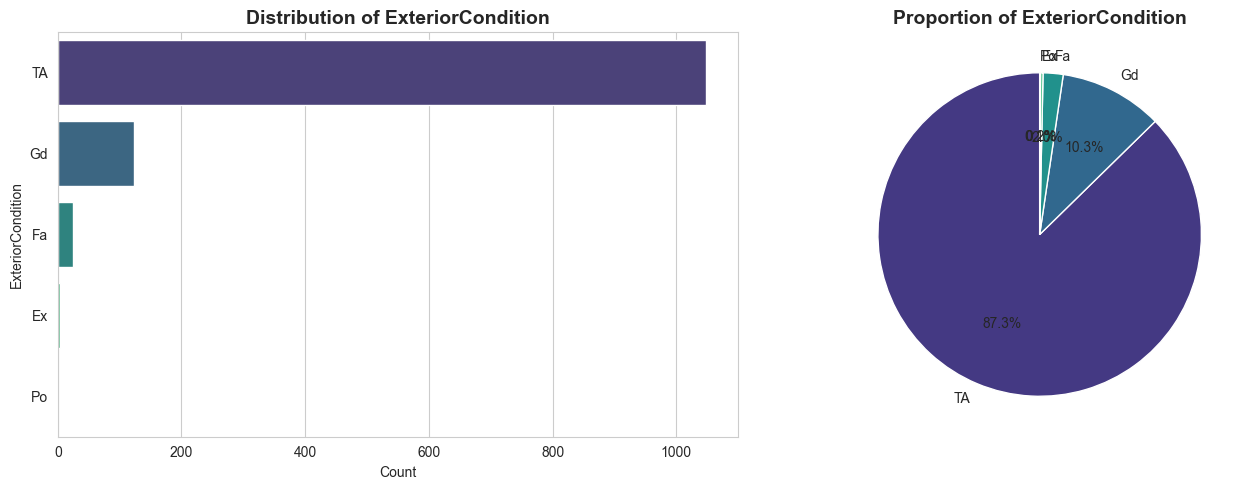


ExteriorCondition - Unique values: 5
ExteriorCondition
TA    1048
Gd     124
Fa      24
Ex       3
Po       1
Name: count, dtype: int64
------------------------------------------------------------


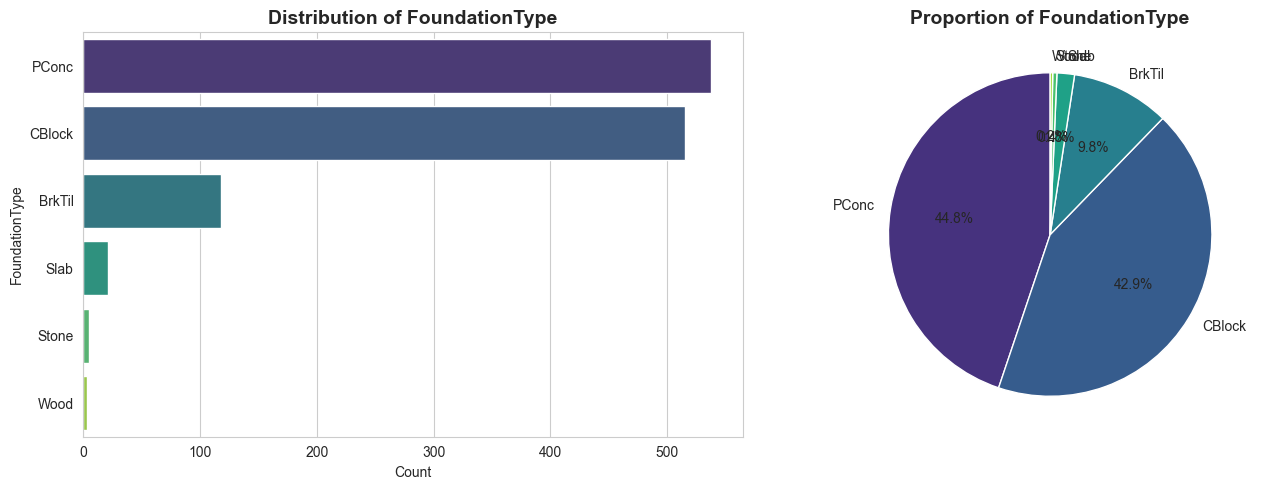


FoundationType - Unique values: 6
FoundationType
PConc     538
CBlock    515
BrkTil    118
Slab       21
Stone       5
Wood        3
Name: count, dtype: int64
------------------------------------------------------------


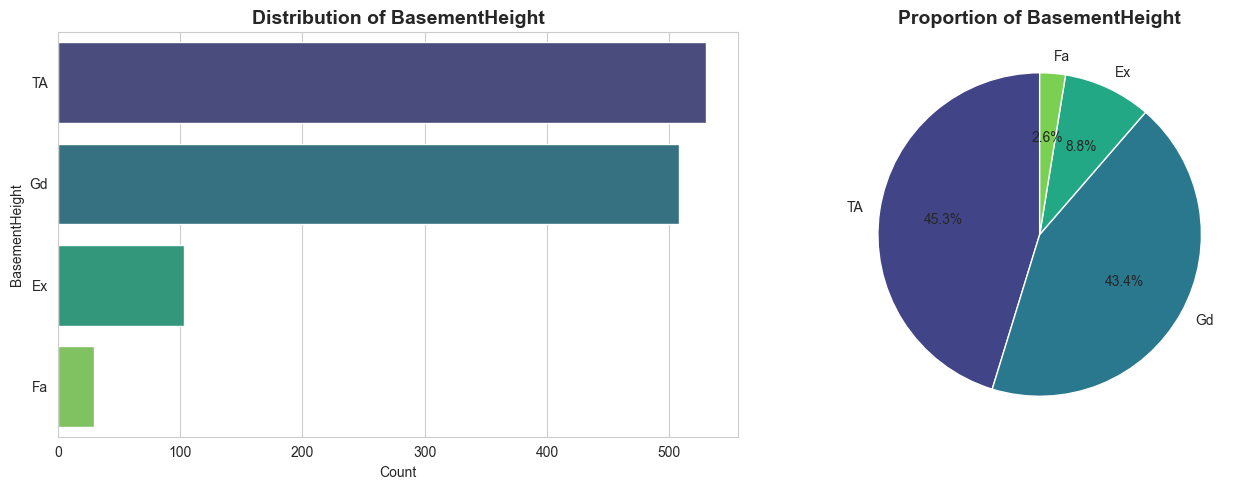


BasementHeight - Unique values: 4
BasementHeight
TA    530
Gd    508
Ex    103
Fa     30
Name: count, dtype: int64
------------------------------------------------------------


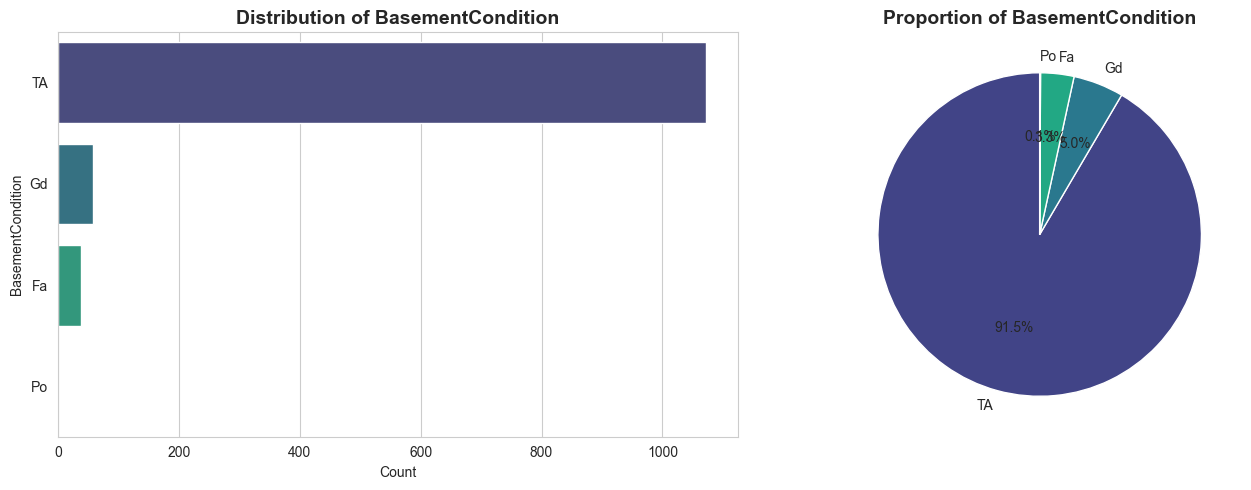


BasementCondition - Unique values: 4
BasementCondition
TA    1072
Gd      59
Fa      39
Po       1
Name: count, dtype: int64
------------------------------------------------------------


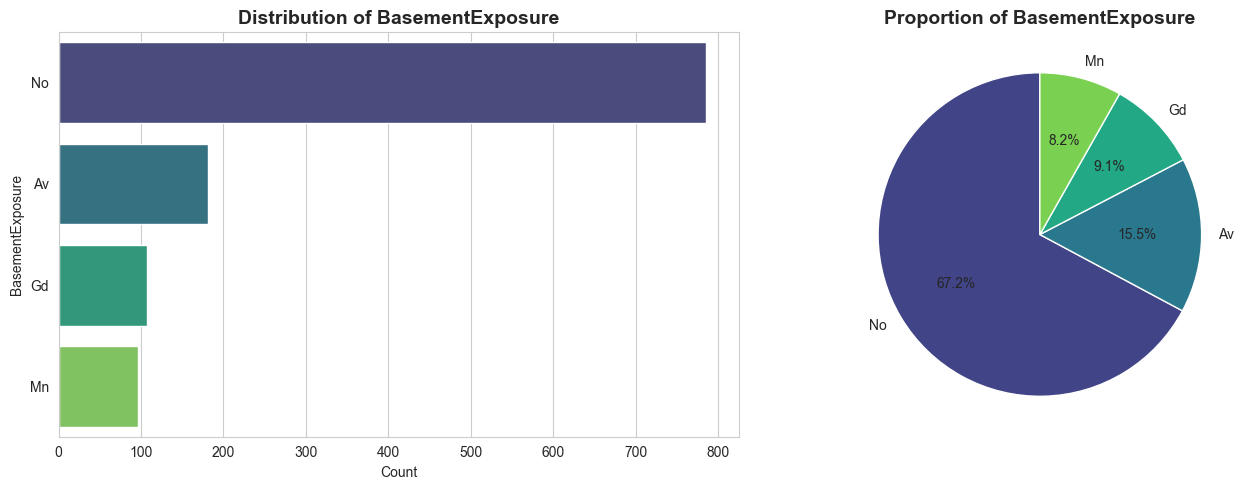


BasementExposure - Unique values: 4
BasementExposure
No    786
Av    181
Gd    107
Mn     96
Name: count, dtype: int64
------------------------------------------------------------


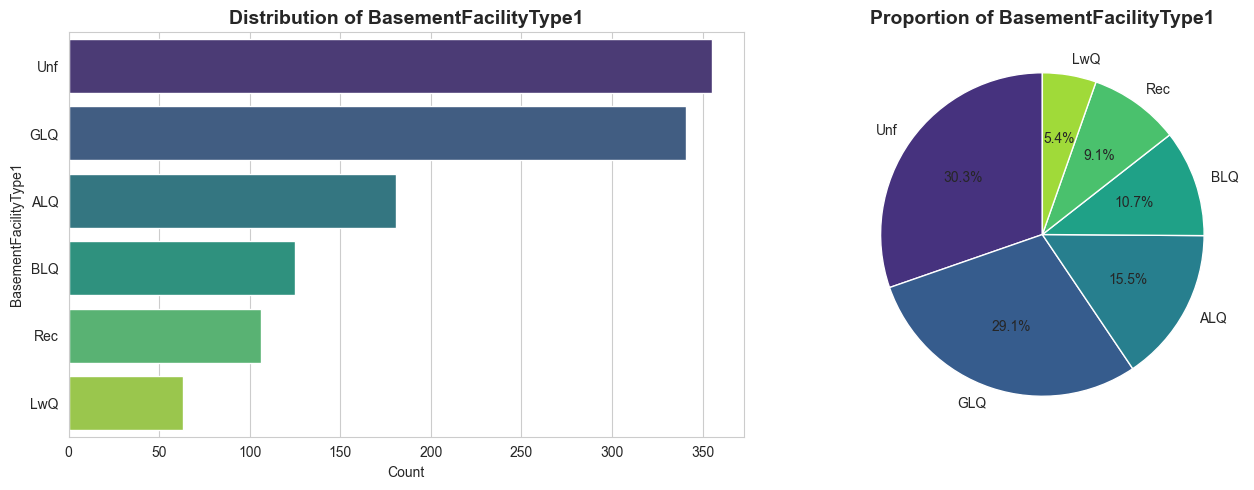


BasementFacilityType1 - Unique values: 6
BasementFacilityType1
Unf    355
GLQ    341
ALQ    181
BLQ    125
Rec    106
LwQ     63
Name: count, dtype: int64
------------------------------------------------------------


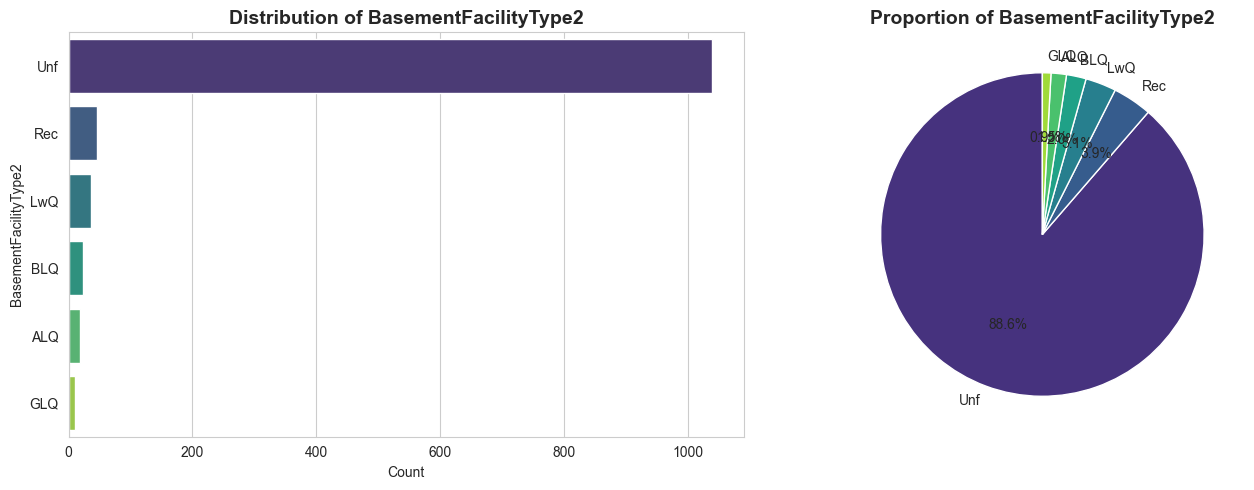


BasementFacilityType2 - Unique values: 6
BasementFacilityType2
Unf    1038
Rec      46
LwQ      36
BLQ      23
ALQ      18
GLQ      10
Name: count, dtype: int64
------------------------------------------------------------


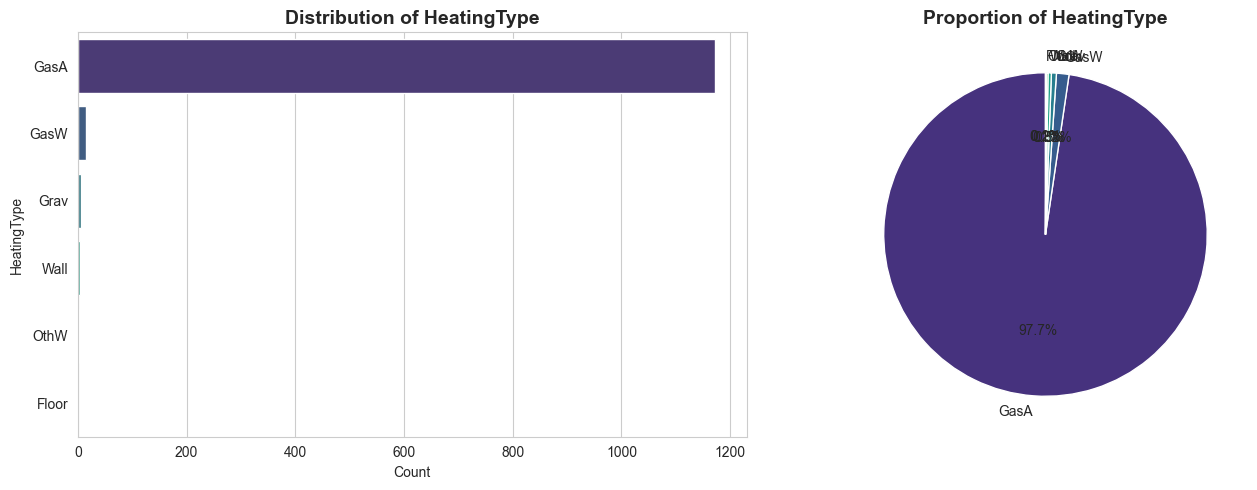


HeatingType - Unique values: 6
HeatingType
GasA     1172
GasW       15
Grav        6
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64
------------------------------------------------------------


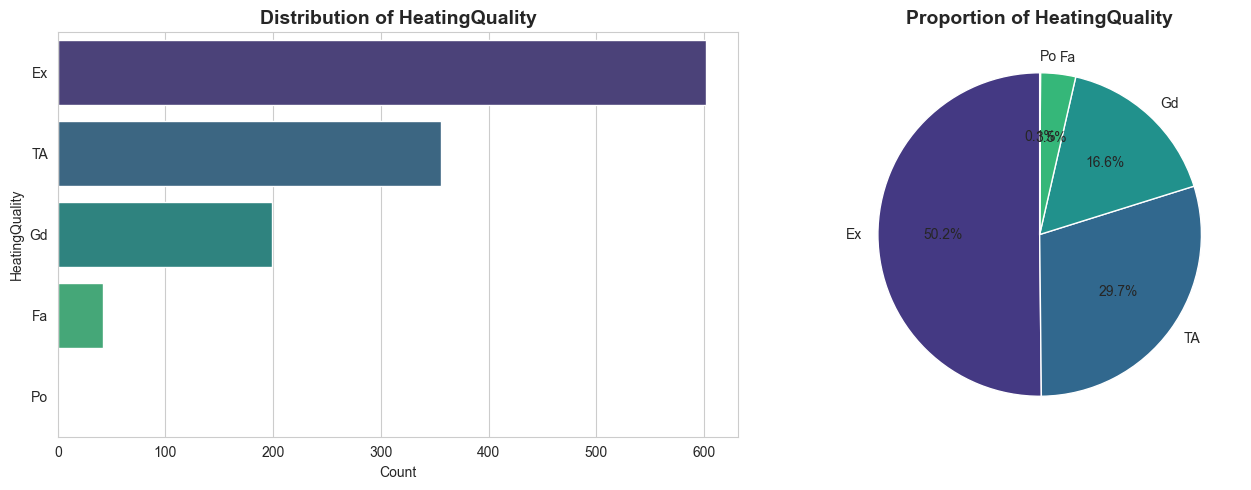


HeatingQuality - Unique values: 5
HeatingQuality
Ex    602
TA    356
Gd    199
Fa     42
Po      1
Name: count, dtype: int64
------------------------------------------------------------


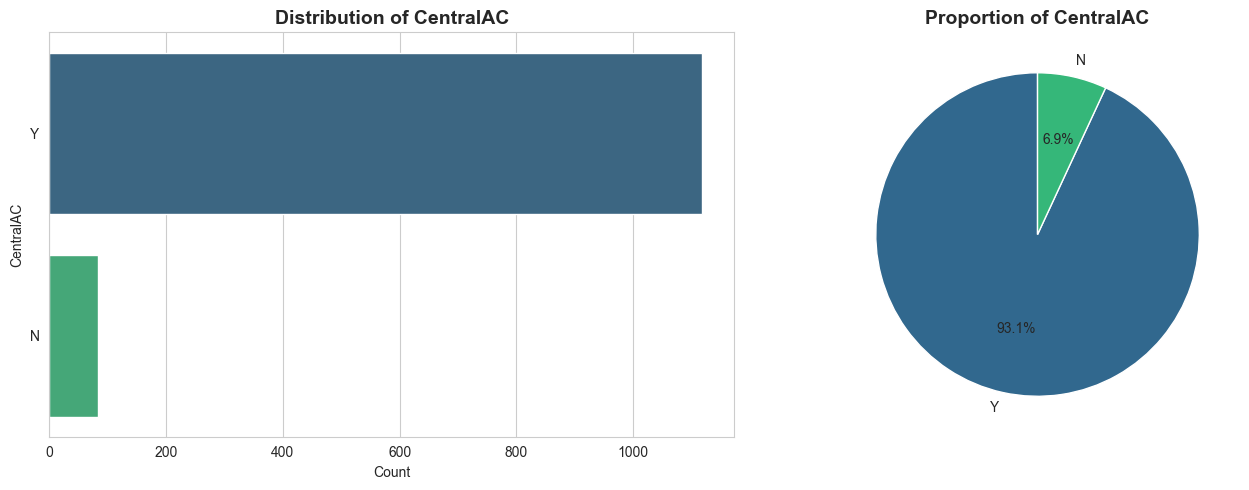


CentralAC - Unique values: 2
CentralAC
Y    1117
N      83
Name: count, dtype: int64
------------------------------------------------------------


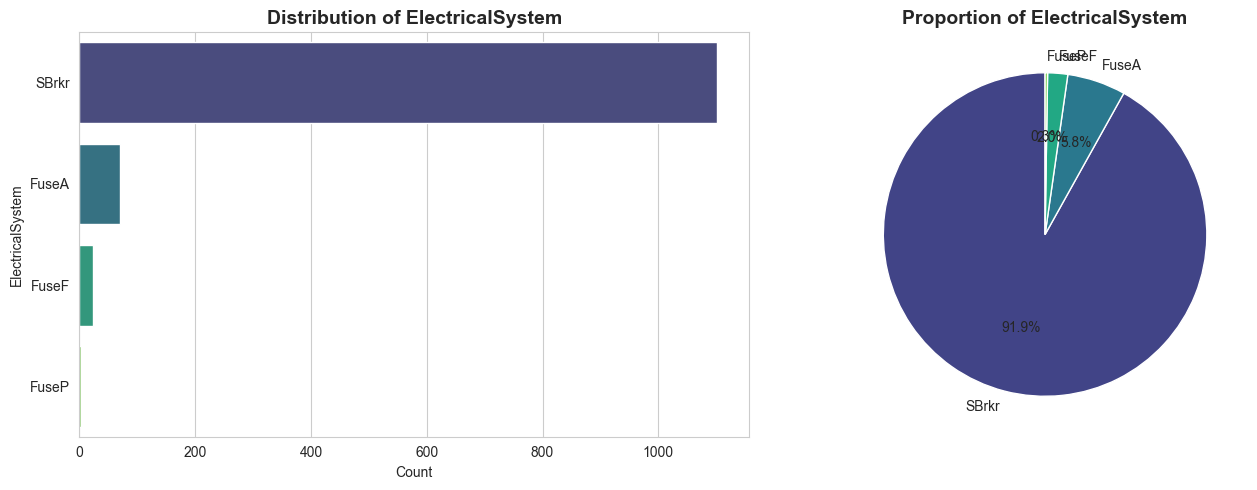


ElectricalSystem - Unique values: 4
ElectricalSystem
SBrkr    1102
FuseA      70
FuseF      24
FuseP       3
Name: count, dtype: int64
------------------------------------------------------------


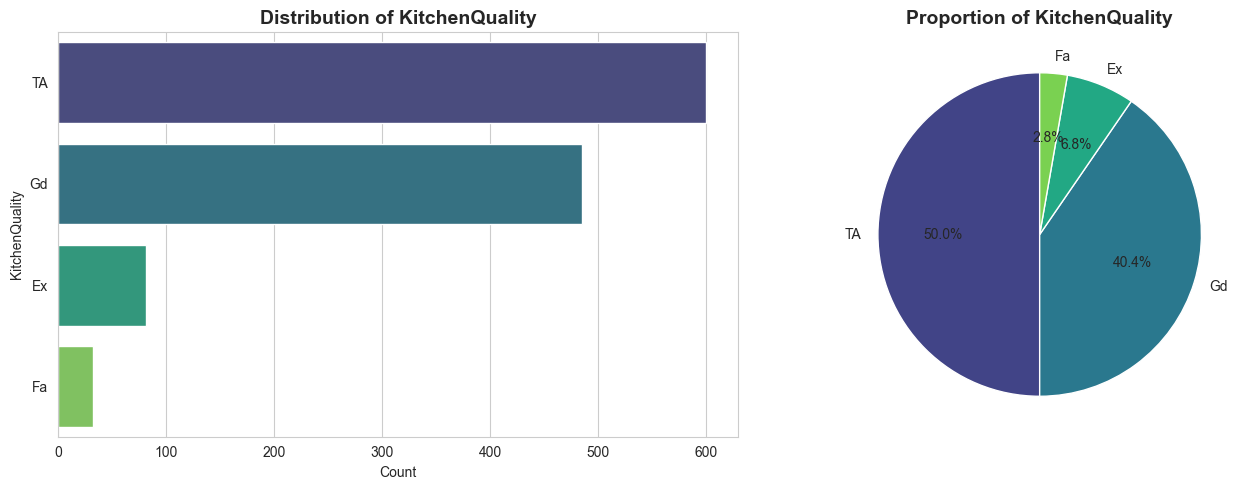


KitchenQuality - Unique values: 4
KitchenQuality
TA    600
Gd    485
Ex     82
Fa     33
Name: count, dtype: int64
------------------------------------------------------------


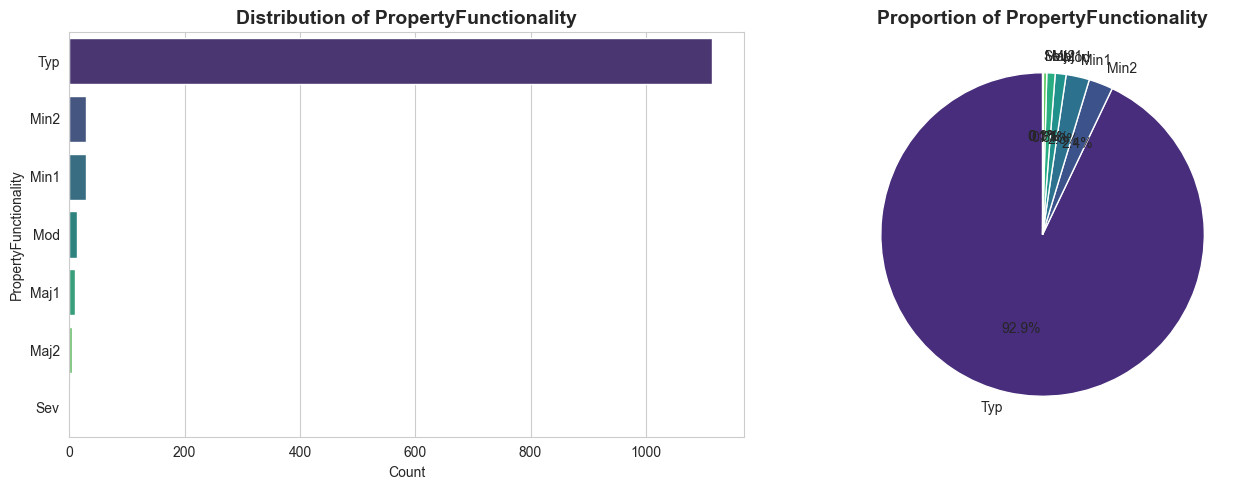


PropertyFunctionality - Unique values: 7
PropertyFunctionality
Typ     1115
Min2      29
Min1      28
Mod       13
Maj1      10
Maj2       4
Sev        1
Name: count, dtype: int64
------------------------------------------------------------


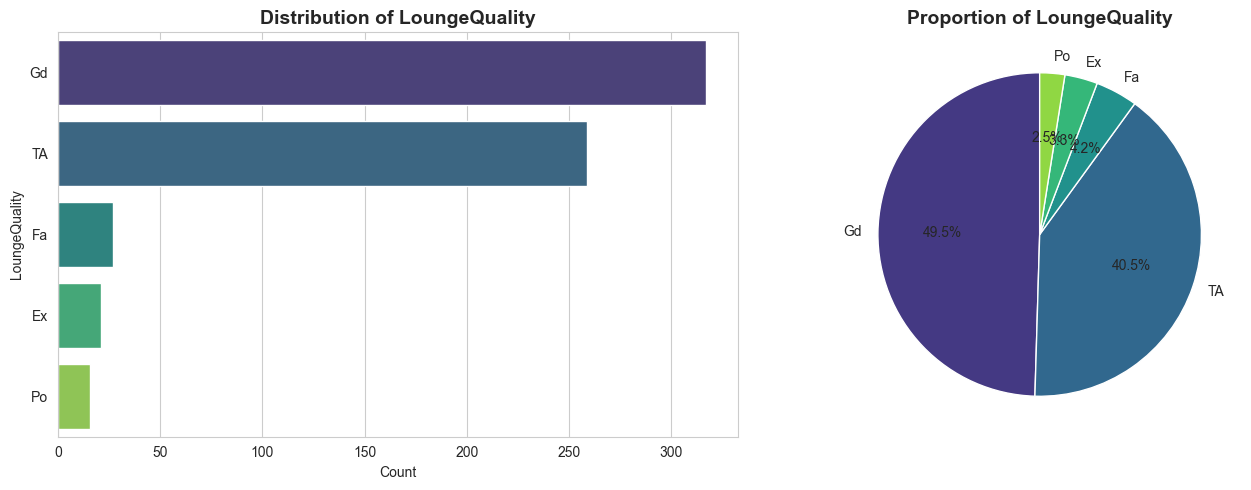


LoungeQuality - Unique values: 5
LoungeQuality
Gd    317
TA    259
Fa     27
Ex     21
Po     16
Name: count, dtype: int64
------------------------------------------------------------


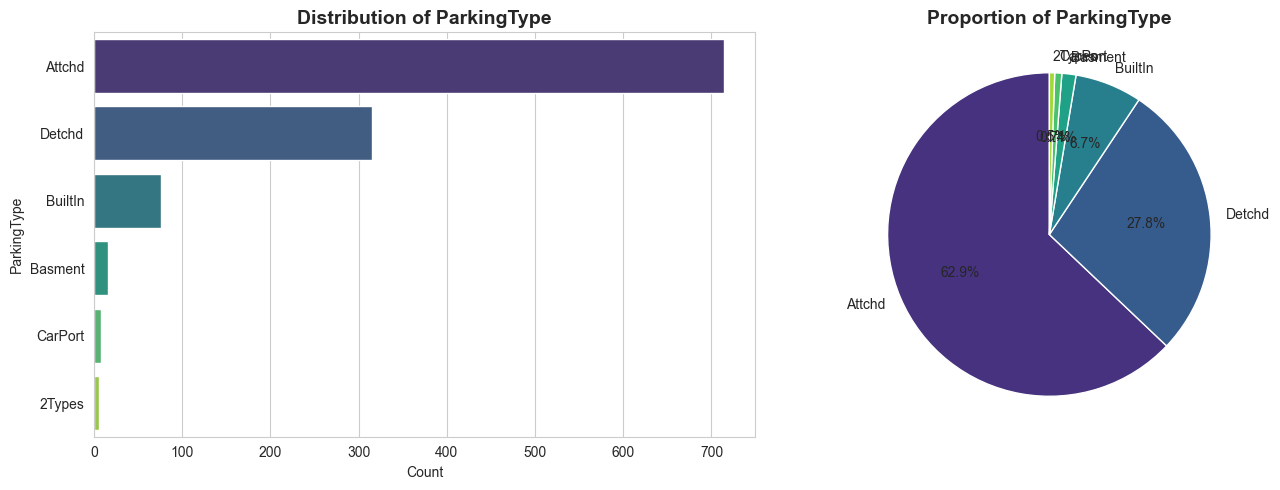


ParkingType - Unique values: 6
ParkingType
Attchd     714
Detchd     315
BuiltIn     76
Basment     16
CarPort      8
2Types       6
Name: count, dtype: int64
------------------------------------------------------------


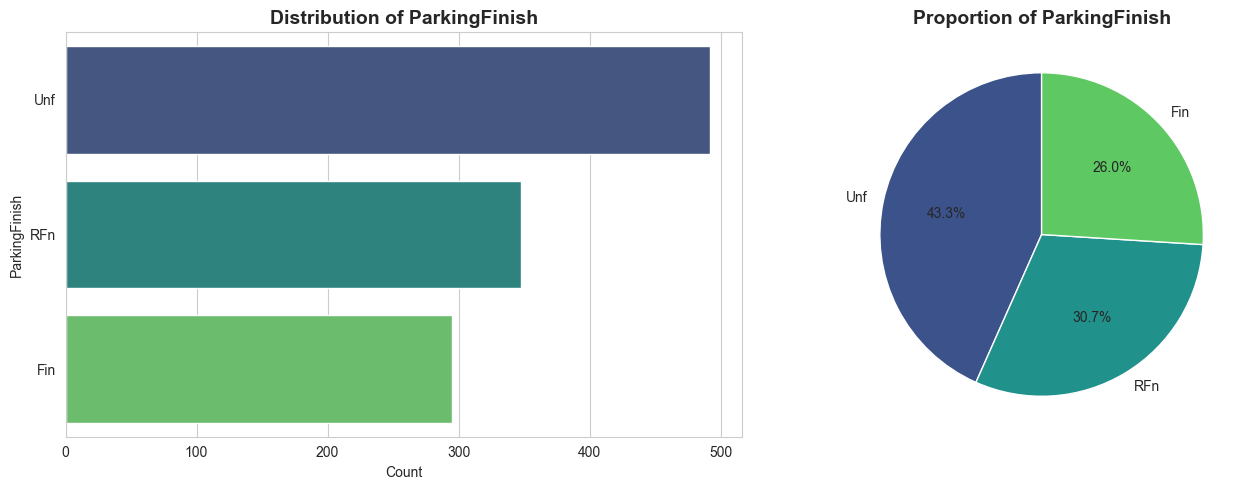


ParkingFinish - Unique values: 3
ParkingFinish
Unf    492
RFn    348
Fin    295
Name: count, dtype: int64
------------------------------------------------------------


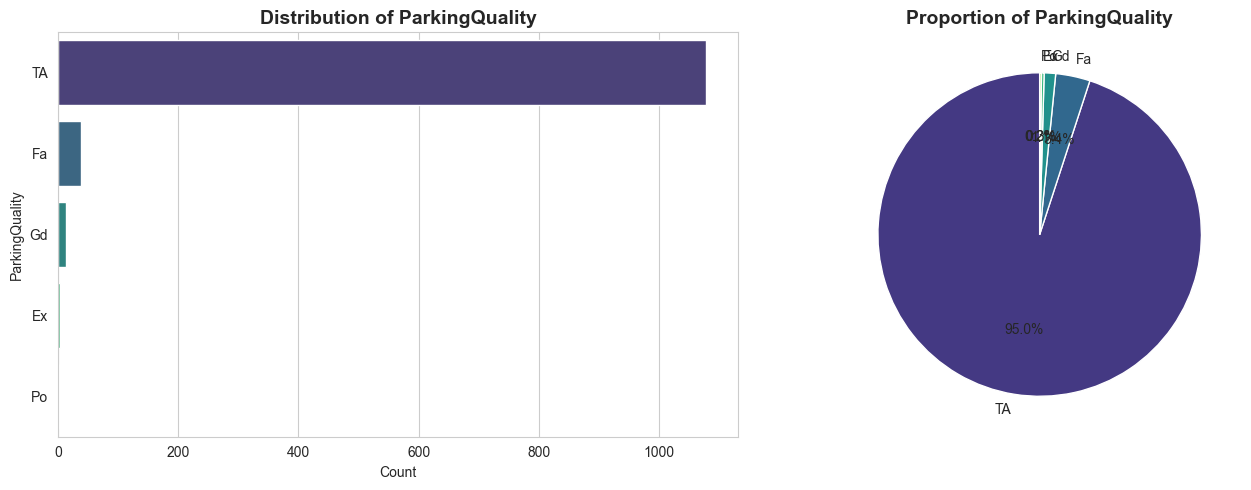


ParkingQuality - Unique values: 5
ParkingQuality
TA    1078
Fa      39
Gd      13
Ex       3
Po       2
Name: count, dtype: int64
------------------------------------------------------------


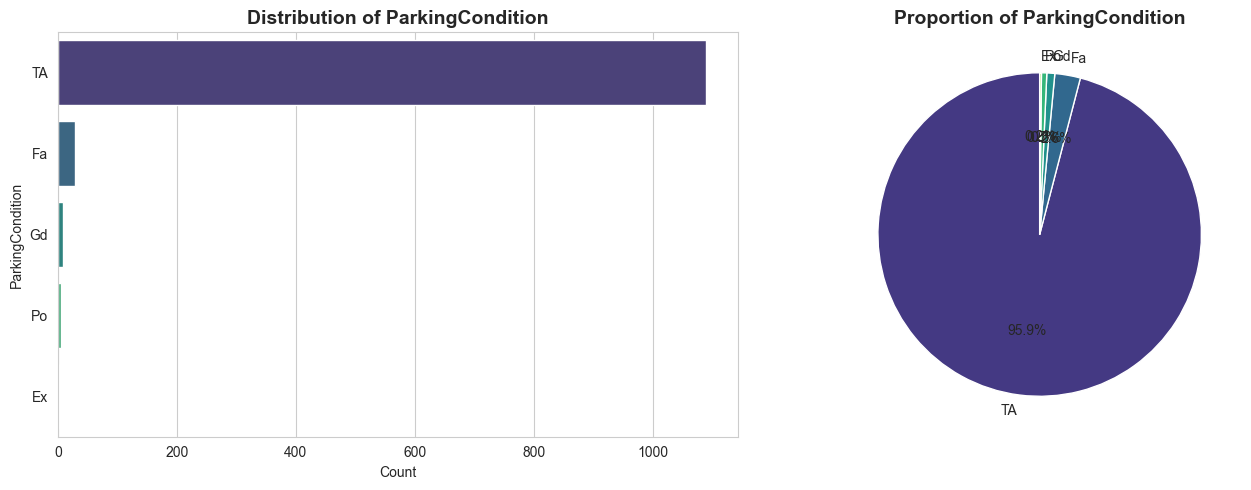


ParkingCondition - Unique values: 5
ParkingCondition
TA    1089
Fa      29
Gd       9
Po       6
Ex       2
Name: count, dtype: int64
------------------------------------------------------------


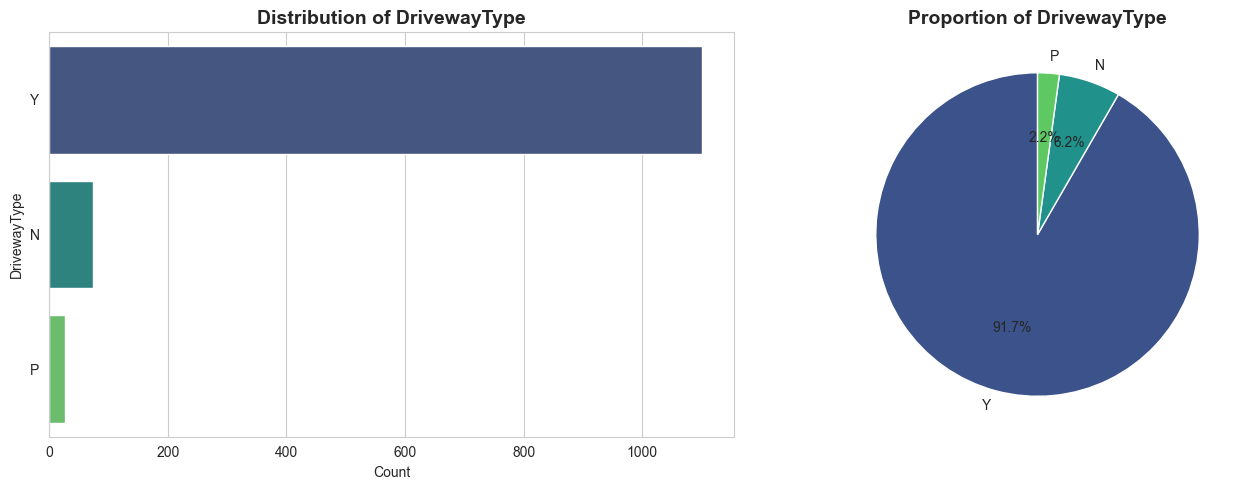


DrivewayType - Unique values: 3
DrivewayType
Y    1100
N      74
P      26
Name: count, dtype: int64
------------------------------------------------------------


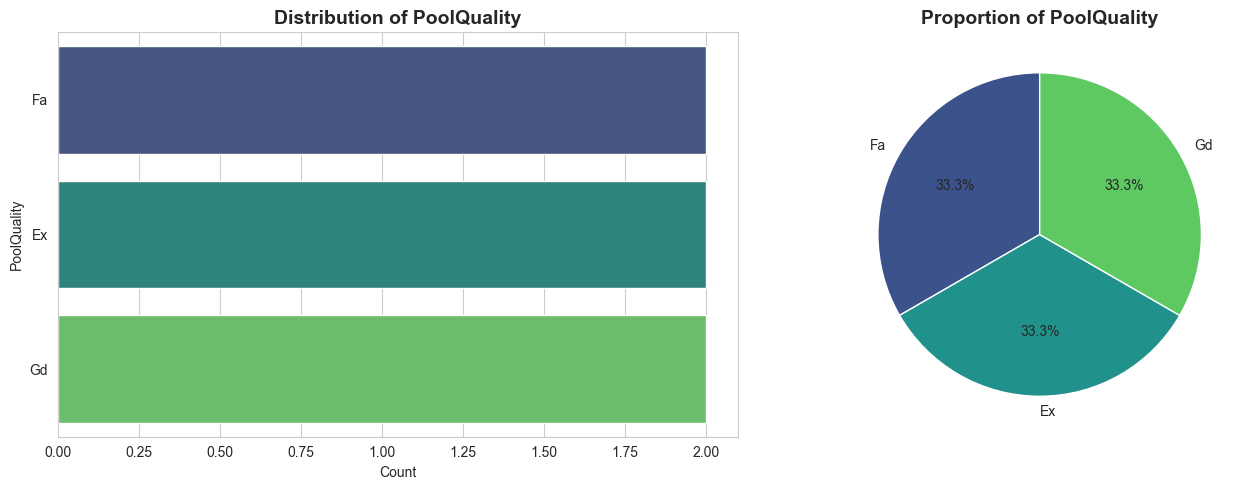


PoolQuality - Unique values: 3
PoolQuality
Fa    2
Ex    2
Gd    2
Name: count, dtype: int64
------------------------------------------------------------


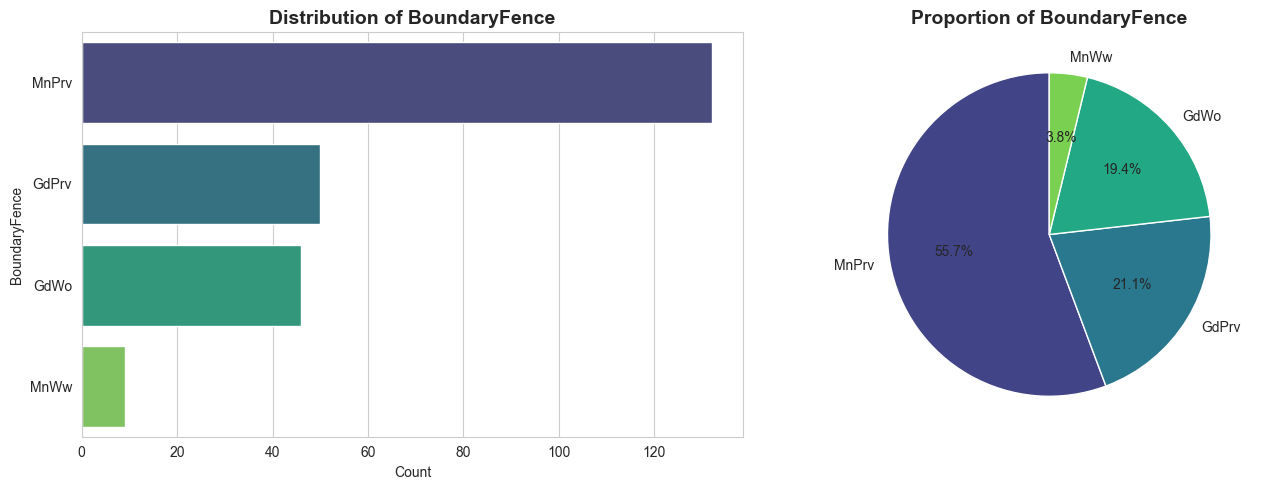


BoundaryFence - Unique values: 4
BoundaryFence
MnPrv    132
GdPrv     50
GdWo      46
MnWw       9
Name: count, dtype: int64
------------------------------------------------------------


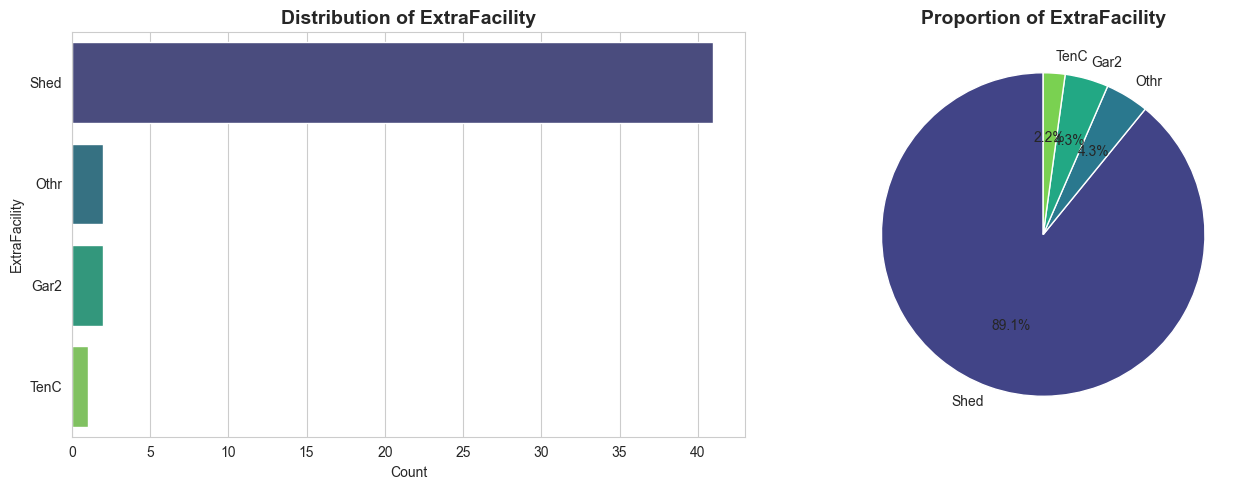


ExtraFacility - Unique values: 4
ExtraFacility
Shed    41
Othr     2
Gar2     2
TenC     1
Name: count, dtype: int64
------------------------------------------------------------


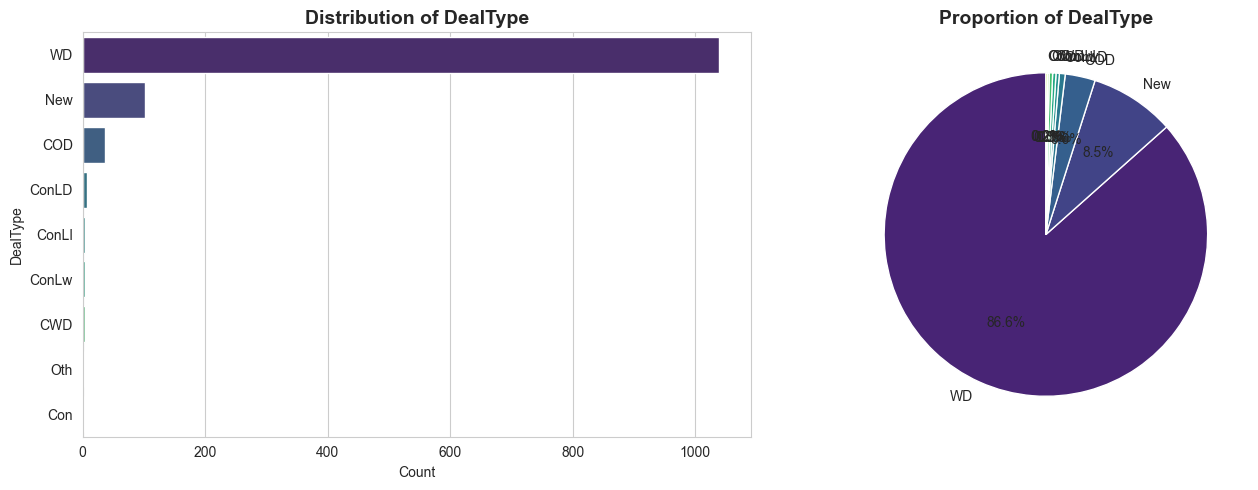


DealType - Unique values: 9
DealType
WD       1039
New       102
COD        36
ConLD       7
ConLI       4
ConLw       4
CWD         4
Oth         2
Con         2
Name: count, dtype: int64
------------------------------------------------------------


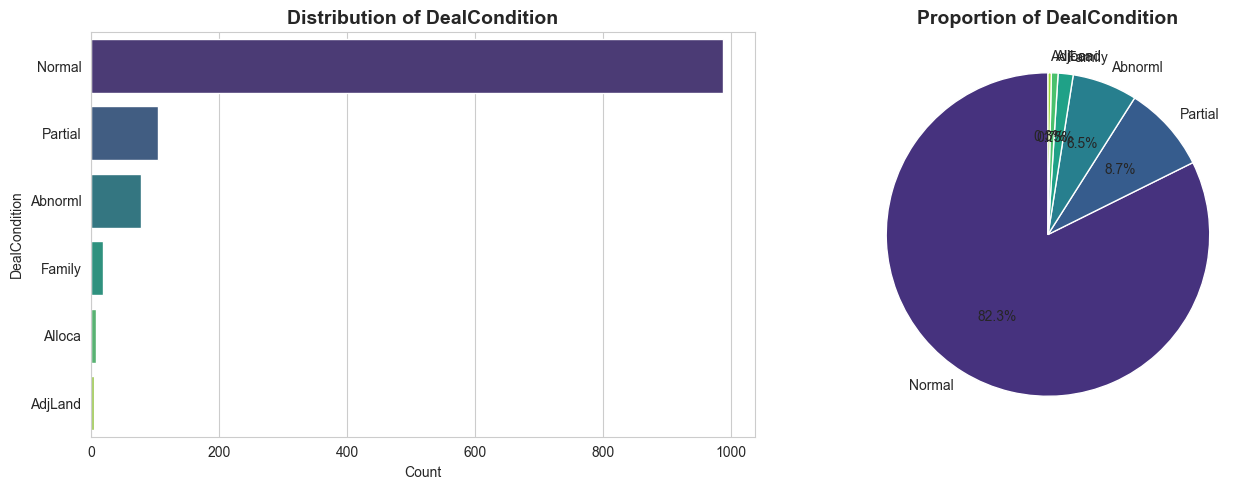


DealCondition - Unique values: 6
DealCondition
Normal     988
Partial    104
Abnorml     78
Family      18
Alloca       8
AdjLand      4
Name: count, dtype: int64
------------------------------------------------------------


In [18]:
for col in cat_cols:
    if col == 'hotel_id':  # Skip ID column
        continue
    
    plt.figure(figsize=(14, 5))
    
    # Value counts
    value_counts = train_df[col].value_counts()
    
    # Bar plot
    plt.subplot(1, 2, 1)
    sns.countplot(data=train_df, y=col, order=value_counts.index, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel('Count')
    
    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=sns.color_palette('viridis', len(value_counts)))
    plt.title(f'Proportion of {col}', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{col} - Unique values: {train_df[col].nunique()}")
    print(value_counts)
    print("-" * 60)

%% [markdown]<br>
## Target Variable Analysis (if present)

%%<br>
Assuming target variable might be named 'hotel_value', 'price', 'value', etc.

In [19]:
target_candidates = ['hotel_value', 'price', 'value', 'target']
target_col = None

In [20]:
for candidate in target_candidates:
    if candidate in train_df.columns:
        target_col = candidate
        break

In [21]:
if target_col:
    print(f"Target variable found: {target_col}")
    
    plt.figure(figsize=(14, 10))
    
    # Original distribution
    plt.subplot(2, 2, 1)
    sns.histplot(train_df[target_col].dropna(), kde=True, bins=50, color='steelblue')
    plt.title(f'Original Distribution of {target_col}', fontsize=12, fontweight='bold')
    plt.xlabel(target_col)
    
    # Log-transformed distribution
    plt.subplot(2, 2, 2)
    log_target = np.log1p(train_df[target_col].dropna())
    sns.histplot(log_target, kde=True, bins=50, color='coral')
    plt.title(f'Log-Transformed Distribution of {target_col}', fontsize=12, fontweight='bold')
    plt.xlabel(f'log({target_col})')
    
    # Boxplot
    plt.subplot(2, 2, 3)
    sns.boxplot(x=train_df[target_col], color='lightgreen')
    plt.title(f'Boxplot of {target_col}', fontsize=12, fontweight='bold')
    
    # Q-Q plot
    plt.subplot(2, 2, 4)
    stats.probplot(train_df[target_col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {target_col}', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nTarget Variable Statistics:")
    print(f"Mean: {train_df[target_col].mean():.2f}")
    print(f"Median: {train_df[target_col].median():.2f}")
    print(f"Std: {train_df[target_col].std():.2f}")
    print(f"Skewness: {train_df[target_col].skew():.3f}")
    print(f"Kurtosis: {train_df[target_col].kurtosis():.3f}")

%% [markdown]<br>
## Bivariate Analysis - Numerical Features vs Target

%%

In [22]:
if target_col and target_col in num_cols:
    other_num_cols = [col for col in num_cols if col != target_col]
    
    for col in other_num_cols[:5]:  # Plot first 5 to avoid too many plots
        plt.figure(figsize=(10, 5))
        sns.scatterplot(data=train_df, x=col, y=target_col, alpha=0.5, color='steelblue')
        plt.title(f'{col} vs {target_col}', fontsize=14, fontweight='bold')
        plt.xlabel(col)
        plt.ylabel(target_col)
        
        # Add correlation coefficient
        corr = train_df[[col, target_col]].corr().iloc[0, 1]
        plt.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                transform=plt.gca().transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.tight_layout()
        plt.show()

%% [markdown]<br>
## Data Cleaning Summary

%%<br>
Drop ID column if present

In [23]:
if 'hotel_id' in train_df.columns:
    train_df.drop('hotel_id', axis=1, inplace=True)
    print("Dropped 'hotel_id' column")

In [24]:
print("\nFinal Dataset Shape:", train_df.shape)
print("\nFinal Dataset Info:")
train_df.info()


Final Dataset Shape: (1200, 81)

Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1200 non-null   int64  
 1   PropertyClass            1200 non-null   int64  
 2   ZoningCategory           1200 non-null   object 
 3   RoadAccessLength         977 non-null    float64
 4   LandArea                 1200 non-null   int64  
 5   RoadType                 1200 non-null   object 
 6   ServiceLaneType          75 non-null     object 
 7   PlotShape                1200 non-null   object 
 8   LandElevation            1200 non-null   object 
 9   UtilityAccess            1200 non-null   object 
 10  PlotConfiguration        1200 non-null   object 
 11  LandSlope                1200 non-null   object 
 12  District                 1200 non-null   object 
 13  NearbyTransport1        

%% [markdown]<br>
## Save Cleaned Data (Optional)

%%<br>
Uncomment to save cleaned data<br>
train_df.to_csv('train_cleaned.csv', index=False)<br>
print("Cleaned data saved to 'train_cleaned.csv'")

In [25]:
print("\n" + "="*80)
print("EDA Complete!")
print("="*80)


EDA Complete!
